In [11]:
%%time
dataset_name = "W20_only"
df_list = "BES_Panel"

%matplotlib inline
%run BES_header.py {dataset_name} {df_list}

Toggle code

Wall time: 2 s


In [33]:
import requests
from bs4 import BeautifulSoup
from lxml import html
from lxml import etree

from textdistance import levenshtein

In [2308]:
replace_dict_15_to_15={'Allen, Graham William': 'Allen, Graham',
 'Allen, Heidi Suzanne': 'Allen, Heidi',
 'Ashworth, Jonathan Michael': 'Ashworth, Jonathan',
 'Bacon, Richard Michael': 'Bacon, Richard',
 'Baron, John Charles': 'Baron, John',
 'Barwell, Gavin Laurence': 'Barwell, Gavin',
 'Bingham, Andrew Russell': 'Bingham, Andrew',
 'Blackwood, Nicola Claire': 'Blackwood, Nicola',
 'Blomfield, Paul Christopher': 'Blomfield, Paul',
 'Bone, Peter William': 'Bone, Peter',
 'Boswell, Phil John': 'Boswell, Phil',
 'Buck, Karen Patricia': 'Buck, Karen',
 'Burt, Alistair James Hendrie': 'Burt, Alistair',
 'Champion, Sarah Deborah': 'Champion, Sarah',
 'Cherry, Joanna Catherine': 'Cherry, Joanna',
 'Cooper, Julie Elizabeth': 'Cooper, Julie',
 'Corbyn, Jeremy Bernard': 'Corbyn, Jeremy',
 'Crausby, David Anthony': 'Crausby, David',
 'Crouch, Tracey Elizabeth Anne': 'Crouch, Tracey',
 'Danczuk, Simon Christopher': 'Danczuk, Simon',
 'Davies, David Thomas Charles': 'Davies, David',
 'Donaldson, Stuart Blair': 'Donaldson, Stuart',
 'Dorries, Nadine Vanessa': 'Dorries, Nadine',
 'Dugher, Michael Vincent': 'Dugher, Michael',
 'Duncan, Alan James Carter': 'Duncan, Alan',
 'Efford, Clive Stanley': 'Efford, Clive',
 'Evennett, David Anthony': 'Evennett, David',
 'Fabricant, Michael Lewis David': 'Fabricant, Michael',
 'Field, Mark Christopher': 'Field, Mark',
 'Flello, Robert': 'Flello, Rob',
 'Fletcher, Colleen Margaret': 'Fletcher, Colleen',
 'Fuller, Richard Quintin': 'Fuller, Richard',
 'Fysh, Marcus John Hudson': 'Fysh, Marcus',
 'Garnier, Edward Henry': 'Garnier, Edward',
 'Gauke, David Michael': 'Gauke, David',
 'Gethins, Stephen Patrick': 'Gethins, Stephen',
 'Glindon, Mary Theresa': 'Glindon, Mary',
 'Goodman, Helen Catherine': 'Goodman, Helen',
 'Gray, James Whiteside': 'Gray, James',
 'Gray, Neil Charles': 'Gray, Neil',
 'Grayling, Christopher Stephen': 'Grayling, Chris',
 'Griffith, Nia Rhianon': 'Griffith, Nia',
 'Hall, Luke Anthony': 'Hall, Luke',
 'Hammond, Stephen William': 'Hammond, Stephen',
 'Haselhurst, Alan Gordon Barraclough': 'Haselhurst, Alan',
 'Hayes, Helen Elizabeth': 'Hayes, Helen',
 'Heappey, James Stephen': 'Heappey, James',
 'Hendrick, Mark Phillip': 'Hendrick, Mark',
 'Hillier, Margaret Olivia': 'Hillier, Meg',
 'Hollingbery, George Michael Edward': 'Hollingbery, George',
 'Howell, John Michael': 'Howell, John',
 'Hunt, Jeremy Richard Streynsham': 'Hunt, Jeremy',
 'Jackson, Stewart James': 'Jackson, Stewart',
 'James, Margot Cathleen': 'James, Margot',
 'Johnson, Alan Arthur': 'Johnson, Alan',
 'Jones, Gerald Bernard': 'Jones, Gerald',
 'Jones, Marcus Charles': 'Jones, Marcus',
 'Kaufman, Gerald Bernard': 'Kaufman, Gerald',
 'Kerr, Calum Robert': 'Kerr, Calum',
 'Khan, Sadiq Aman': 'Khan, Sadiq',
 'Latham, Pauline Elizabeth': 'Latham, Pauline',
 'Leadsom, Andrea Jacqueline': 'Leadsom, Andrea',
 'Lefroy, Jeremy John Elton': 'Lefroy, Jeremy',
 'Leslie, Christopher Michael': 'Leslie, Chris',
 'Lewis, Brandon Kenneth': 'Lewis, Brandon',
 'Lilley, Peter Bruce': 'Lilley, Peter',
 'Lord, Jonathan George Caladine': 'Lord, Jonathan',
 'Loughton, Timothy Paul': 'Loughton, Tim',
 'Lumley, Karen Elizabeth': 'Lumley, Karen',
 'Mackintosh, David James': 'Mackintosh, David',
 'Mactaggart, Fiona Margaret': 'Mactaggart, Fiona',
 'Main, Anne Margaret': 'Main, Anne',
 'Maynard, Paul Christopher': 'Maynard, Paul',
 'McCarthy, Kerry Gillian': 'McCarthy, Kerry',
 'McCartney, Jason Alexander': 'McCartney, Jason',
 'McCartney, Karl Ian': 'McCartney, Karl',
 'McDonald, Stuart Campbell': 'McDonald, Stuart',
 'McGinn, Conor Patrick': 'McGinn, Conor',
 'McPartland, Stephen Anthony': 'McPartland, Stephen',
 'Merriman, Huw William': 'Merriman, Huw',
 'Miller, Maria Fraces Lewis': 'Miller, Maria',
 'Milton, Anne Frances': 'Milton, Anne',
 'Mitchell, Andrew John Bower': 'Mitchell, Andrew',
 'Monaghan, Paul William': 'Monaghan, Paul',
 'Mowat, John David': 'Mowat, David',
 'Mullen, Roger': 'Mullin, Roger',
 'Murrison, Andrew William': 'Murrison, Andrew',
 'Nokes, Caroline Fiona Ellen': 'Nokes, Caroline',
 'Nuttall, David John': 'Nuttall, David',
 'Oswald, Kirsten Frances': 'Oswald, Kirsten',
 'Parish, Neil Quinton Gordon': 'Parish, Neil',
 'Paterson, Owen William': 'Paterson, Owen',
 'Paterson, Steven Alexander': 'Paterson, Steven',
 'Percy, Andrew Theakstone': 'Percy, Andrew',
 'Phillips, Stephen James': 'Phillips, Stephen',
 'Pickles, Eric Jack': 'Pickles, Eric',
 'Prentis, Victoria Mary Boswell': 'Prentis, Victoria',
 'Pugh, John David': 'Pugh, John',
 'Rees-Mogg, Jacob William': 'Rees-Mogg, Jacob',
 'Reynolds, Emma Elizabeth': 'Reynolds, Emma',
 'Rimmer, Marie Elizabeth': 'Rimmer, Marie',
 'Robertson, Laurence Anthony': 'Robertson, Laurence',
 'Robinson, Mary Josephine': 'Robinson, Mary',
 'Rosindell, Andrew Richard': 'Rosindell, Andrew',
 'Rotheram, Steven Philip': 'Rotheram, Steve',
 'Sherriff, Paula Michelle': 'Sherriff, Paula',
 'Smeeth, Ruth Laurence': 'Smeeth, Ruth',
 'Smith, Andrew David': 'Smith, Andrew',
 'Smith, Catherine Jane': 'Smith, Cat',
 'Smith, Chloe Rebecca': 'Smith, Chloe',
 'Smith, Henry Edward Millar': 'Smith, Henry',
 'Smith, Julian Richard': 'Smith, Julian',
 'Solloway, Amanda Jane': 'Solloway, Amanda',
 'Spellar, John Francis': 'Spellar, John',
 'Streeter, Gary Nicholas': 'Streeter, Gary',
 'Sturdy, Julian Charles': 'Sturdy, Julian',
 'Syms, Robert Andrew Raymond': 'Syms, Robert',
 'Thomas, Gareth Richard': 'Thomas, Gareth',
 'Thompson, Owen George': 'Thompson, Owen',
 'Thomson, Michelle Rhonda': 'Thomson, Michelle',
 'Timms, Stephen Creswell': 'Timms, Stephen',
 'Timpson, Anthony Edward': 'Timpson, Edward',
 'Tredinnick, David Arthur Stephen': 'Tredinnick, David',
 'Trevelyan, Anne-Marie Belinda': 'Trevelyan, Anne-Marie',
 'Turley, Anna Catherine': 'Turley, Anna',
 'Turner, Andrew John': 'Turner, Andrew',
 'Tyrie, Andrew Guy': 'Tyrie, Andrew',
 'Umunna, Chuka Harrison': 'Umunna, Chuka',
 'Vara, Shailesh Lakhman': 'Vara, Shailesh',
 'Vaz, Keith Anthony': 'Vaz, Keith',
 'Walker, Charles Ashley Rupert': 'Walker, Charles',
                       #####???
#  'Watkinson, Angela Eileen': 'Watkinson, Dame Angela',
 'Watkinson, Angela Eileen':'Watkinson, Angela',
 'Watkinson, Dame Angela':'Watkinson, Angela',
                       
 'West, Catherine Elizabeth': 'West, Catherine',
 'Wharton, James Stephen': 'Wharton, James',
 'Williams, Mark Fraser': 'Williams, Mark',
 'Williamson, Gavin Alexander': 'Williamson, Gavin',
 'Winnick, David Julian': 'Winnick, David',
 'Wright, Iain David': 'Wright, Iain'}

replace_dict_15_to_17={'Brady, Graham Stuart': 'Brady, Graham',
 'Mills, Nigel John': 'Mills, Nigel',
 'Green, Damian Howard': 'Green, Damian',
 'Lidington, David Roy': 'Lidington, David',
 'Hodge, Margaret Eve': 'Hodge, Margaret',
 'Woodcock, John Zak': 'Woodcock, John',
 'Philips, Jess': 'Phillips, Jess',
 'Stringer, Graham Eric': 'Stringer, Graham',
 'Skinner, Dennis Edward': 'Skinner, Dennis',
 'Green, Christopher': 'Green, Chris',
 'Ellwood, Tobias Martin': 'Ellwood, Tobias',
 'Lee, Phillip James': 'Lee, Phillip',
 'Cummings, Judith Mary': 'Cummins, Judith',
 'Simpson, Keith Robert': 'Simpson, Keith',
 'Soubry, Anna Mary': 'Soubry, Anna',
 'Griffiths, Andrew James': 'Griffiths, Andrew',
 'Churchill, Johanna': 'Churchill, Jo',
 'Edwards, David Jonathan': 'Edwards, Jonathan',
#  'Matheson, Chris': 'Matheson, Christian',
 'Hoyle, Lindsay Harvey': 'Hoyle, Lindsay',
 'Chope, Christopher Robert': 'Chope, Christopher',
 'Vickers, Martin John': 'Vickers, Martin',
 'Jones, David Ian': 'Jones, David',
 'Bruce, Fiona Claire': 'Bruce, Fiona',
 'Pursglove, Thomas': 'Pursglove, Tom',
 'Mann, Scott Leslie': 'Mann, Scott',
 'Clifton-Brown, Geoffrey Robert': 'Clifton-Brown, Geoffrey',
 'Cruddas, Jonathan': 'Cruddas, Jon',
 'Johnson, Gareth Alan': 'Johnson, Gareth',
 'Hanson, David George': 'Hanson, David',
 'Gwynne, Andrew John': 'Gwynne, Andrew',
 'Beckett, Margaret Mary': 'Beckett, Margaret',
 'Wheeler, Heather Kay': 'Wheeler, Heather',
 'Perry, Claire Louise': 'Perry, Claire',
 'Swire, Hugo G W': 'Swire, Hugo',
 'Flint, Caroline Louise': 'Flint, Caroline',
#  'Miliband, Ed': 'Miliband, Edward',
 'Tomlinson, Michael James': 'Tomlinson, Michael',
 'Hoare, Simon James': 'Hoare, Simon',
 'Elphicke, Charles': 'Elphicke, Charlie',
 'Mundell, David Gordon': 'Mundell, David',
#  'Docherty, Martin': 'Docherty-Hughes, Martin',
 'Blackman-Woods, Roberta Carol': 'Blackman-Woods, Roberta',
 'Jones, Kevan David': 'Jones, Kevan',
 'Huq, Rupa Asha': 'Huq, Rupa',
#  'Pound, Steve': 'Pound, Stephen',
 'Morris, Grahame Mark': 'Morris, Grahame',
 'Cameron, Lisa (Dr)': 'Cameron, Lisa',
 'Brock, Deidre Leanne': 'Brock, Deidre',
 'Ryan, Joan Marie': 'Ryan, Joan',
 'Laing, Eleanor Fulton': 'Laing, Eleanor',
 'Raab, Dominic Rennie': 'Raab, Dominic',
#  'McNally, John': 'Mc Nally, John',
 'Harper, Mark James': 'Harper, Mark',
 'Menzies, Mark Andrew': 'Menzies, Mark',
 'Mearns, James Ian': 'Mearns, Ian',
 'Coaker, Vernon Rodney': 'Coaker, Vernon',
 'Stephens, Christopher': 'Stephens, Chris',
 'Pennycook, Matthew Thomas': 'Pennycook, Matthew',
 'Abbott, Diane Julie': 'Abbott, Diane',
 'Morris, James George': 'Morris, James',
 'Halfon, Robert Henry': 'Halfon, Robert',
 'Jones, Andrew Hansen': 'Jones, Andrew',
 'Wragg, William Peter': 'Wragg, William',
 'Penning, Michael': 'Penning, Mike',
 'Trickett, Jon Hedley': 'Trickett, Jon',
 'Offord, Matthew James': 'Offord, Matthew',
 'Dowden, Oliver James': 'Dowden, Oliver',
 'Opperman, Guy Thomas': 'Opperman, Guy',
 'Quin, Jeremy Marc': 'Quin, Jeremy',
 'Phillipson, Bridget Maeve': 'Phillipson, Bridget',
 'Sheerman, Barry John': 'Sheerman, Barry',
 'Johnson, Diana Ruth': 'Johnson, Diana',
 'Djanogly, Jonathan Simon': 'Djanogly, Jonathan',
 'Jones, Graham Peter': 'Jones, Graham',
 'Evans, Christopher': 'Evans, Chris',
 'Hollobone, Philip Thomas': 'Hollobone, Philip',
 'Howarth, George Edward': 'Howarth, George',
 'Benn, Hilary James': 'Benn, Hilary',
 'Reeves, Rachel Jane': 'Reeves, Rachel',
 'Kendall, Elizabeth': 'Kendall, Liz',
 'Bridgen, Andrew James': 'Bridgen, Andrew',
 'Cryer, John Robert': 'Cryer, John',
 'Ellman, Louise Joyce': 'Ellman, Louise',
 'Berger, Luciana Clare': 'Berger, Luciana',
 'Bardell, Hannah Mary': 'Bardell, Hannah',
 'Atkins, Victoria Mary': 'Atkins, Victoria',
 'Dunne, Philip Martin': 'Dunne, Philip',
 'Hopkins, Kelvin Peter': 'Hopkins, Kelvin',
 'Rutley, David Henry': 'Rutley, David',
 'May, Theresa Mary': 'May, Theresa',
 'Fovargue, Yvonne Helen': 'Fovargue, Yvonne',
 'Whittingdale, John Flasby': 'Whittingdale, John',
 'Powell, Lucy Maria': 'Powell, Lucy',
 'McDonald, Andrew': 'McDonald, Andy',
 'Stewart, Iain Atkins': 'Stewart, Iain',
 'McDonagh, Siobhain Ann': 'McDonagh, Siobhain',
 'Morris, David Thomas': 'Morris, David',
 'Jenkyns, Andrea Marie': 'Jenkyns, Andrea',
 'Lewis, Julian Murray': 'Lewis, Julian',
 'Jenrick, Robert Edward': 'Jenrick, Robert',
 'Brown, Nicholas Hugh': 'Brown, Nicholas',
 'Lamb, Norman Peter': 'Lamb, Norman',
#  'Truss, Elizabeth Mary': 'Truss, Elizabeth',
 'Greenwood, Lilian Rachel': 'Greenwood, Lilian',
 'Brokenshire, James Peter': 'Brokenshire, James',
#  'Johnson, Jo': 'Johnson, Joseph',
 'Mercer, John': 'Mercer, Johnny',
 'Mordaunt, Penny Mary': 'Mordaunt, Penny',
 'Andrew, Stuart James': 'Andrew, Stuart',
 'Francois, Mark Gino': 'Francois, Mark',
 'Evans, Nigel Martin': 'Evans, Nigel',
 'Tolhurst, Kelly Jane': 'Tolhurst, Kelly',
 'Barron, Kevin John': 'Barron, Kevin',
 'Clarke, Kenneth Harry': 'Clarke, Kenneth',
 'Double, Stephen': 'Double, Steve',
 'Spencer, Mark Steven': 'Spencer, Mark',
 'Davies, Philip Andrew': 'Davies, Philip',
 'Kawczynski, Daniel Robert': 'Kawczynski, Daniel',
 'Warburton, David John': 'Warburton, David',
 'Hayes, John Henry': 'Hayes, John',
 'Lewell-Buck, Emma Louise': 'Lewell-Buck, Emma',
 'Bradley, Karen Anne': 'Bradley, Karen',
 'Reynolds, Jonathan Neil': 'Reynolds, Jonathan',
#  'Cash, William': 'Cash, Bill',
#  'Poulter, Daniel': 'Poulter, Dan',
 'Coffey, Therese Ann': 'Coffey, Therese',
 'Cartlidge, James Roger': 'Cartlidge, James',
#  'Hancock, Matthew': 'Hancock, Matt',
 'Gove, Michael Andrew': 'Gove, Michael',
 'Scully, Paul Stuart': 'Scully, Paul',
 'Tomlinson, Justin Paul': 'Tomlinson, Justin',
 'Buckland, Robert James': 'Buckland, Robert',
 'Pincher, Christopher John': 'Pincher, Christopher',
 'Pow, Rebecca Faye': 'Pow, Rebecca',
 'Hollinrake, Kevin Paul': 'Hollinrake, Kevin',
#  'Tugendhat, Thomas': 'Tugendhat, Tom',
 'Foster, Kevin John': 'Foster, Kevin',
 'Lammy, David Lindon': 'Lammy, David',
 'Creagh, Mary Helen': 'Creagh, Mary',
 'Creasy, Stella Judith': 'Creasy, Stella',
#  'Vaizey, Ed': 'Vaizey, Edward',
 'Jones, Helen Mary': 'Jones, Helen',
 'Tracey, Craig Paul': 'Tracey, Craig',
 'Brown, Lyn Carol': 'Brown, Lyn',
 'Penrose, John David': 'Penrose, John',
 'Nandy, Lisa Eva': 'Nandy, Lisa',
 'Patel, Priti Sushil': 'Patel, Priti',
 'Redwood, John Alan': 'Redwood, John',
 'McFadden, Patrick': 'McFadden, Pat',
 'Walker, Robin Casper': 'Walker, Robin',
 'Huddleston, Nigel Paul': 'Huddleston, Nigel',
 'Keeley, Barbara Mary': 'Keeley, Barbara',
 'Bottomley, Peter James': 'Bottomley, Peter',
 'Pritchard, Mark Andrew': 'Pritchard, Mark',
#  'Baker, Steven': 'Baker, Steve',
 'Maskell, Rachael Helen': 'Maskell, Rachael',
 'Bebb, Guto ap Owain': 'Bebb, Guto',
 'Cleverly, James Spencer': 'Cleverly, James',
 'Jayawardena, Ranil Malcolm': 'Jayawardena, Ranil',
 'Kennedy, Seema Louise Ghiassi': 'Kennedy, Seema',
 'Lewis, Clive Anthony': 'Lewis, Clive',
 'Shah, Naseem Akhter': 'Shah, Naz'}

replace_dict_19_to_17={'Jarvis, Daniel': 'Jarvis, Dan',
#  'Gill, Preet Kaur': 'Gill, Preet',
 'McCabe, Stephen': 'McCabe, Steve',
 'Duffield, Rosemary': 'Duffield, Rosie',
 'McDonald, Stuart C.': 'McDonald, Stuart',
#  'McNally, John': 'Mc Nally, John',
#  'Lopez, Julia': 'Dockerill, Julia',
 'Davies, David T. C.': 'Davies, David',
 'Rodda, Mathew': 'Rodda, Matt',
#  'Long-Bailey, Rebecca': 'Long Bailey, Rebecca',
 'Cash, William': 'Cash, Bill',
 'Coffey, Th??r??se': 'Coffey, Therese',
#  'Hancock, Matthew': 'Hancock, Matt',
 'Doyle-Price, Jacqueline': 'Doyle-Price, Jackie',
#  'Tugendhat, Thomas': 'Tugendhat, Tom',
 'Clark, Gregory': 'Clark, Greg',
 'Farron, Timothy': 'Farron, Tim',
 'Brine, Stephen': 'Brine, Steve',
 'Kane, Michael': 'Kane, Mike',
 'McDonald, Stewart Malcolm': 'McDonald, Stewart'}

misc_replace_dict = {'Ashworth, Jon': 'Ashworth, Jonathan',
 'Baker, Steven': 'Baker, Steve',
 'Barclay, Steve': 'Barclay, Stephen',
 'Boles, Nicholas': 'Boles, Nick',
 'Brown, Nick': 'Brown, Nicholas',
 'Cable, Vincent': 'Cable, Vince',
 'Dakin, Nicholas': 'Dakin, Nic',
 'Gill, Preet Kaur': 'Gill, Preet',
 'Hancock, Matthew': 'Hancock, Matt',
 'Johnson, Diana R.': 'Johnson, Diana',
 'Johnson, Jo': 'Johnson, Joseph',
 'Killen, Ged': 'Killen, Gerard',
 'Matheson, Chris': 'Matheson, Christian',
 'McDonnell, John Martin': 'McDonnell, John',
 'Miliband, Ed': 'Miliband, Edward',
 'Neill, Bob': 'Neill, Robert',
 'Platt, Jo': 'Platt, Joanne',
 'Poulter, Daniel': 'Poulter, Dan',
 'Pound, Steve': 'Pound, Stephen',
 'Shah, Naseem': 'Shah, Naz',
 'Slaughter, Andrew': 'Slaughter, Andy',
 'Tugendhat, Thomas': 'Tugendhat, Tom',
 'Vaizey, Ed': 'Vaizey, Edward',
 '[Missing last name for 41744], John': 'Mann, John',
 'Docherty, Martin': 'Docherty-Hughes, Martin',
 'Lopez, Julia': 'Dockerill, Julia',
 'Khan, Imran Ahmad': 'Ahmad Khan, Imran',
 'Mishra, Nav': 'Mishra, Navendu',
 'Dhesi, Tanmanjeet Singh': 'Dhesi, Tan',
 'Cordova, Marsha de': 'De Cordova, Marsha',
 'Ghani, Nus': 'Ghani, Nusrat',
 'Braverman, Suella': 'Fernandes, Suella',
 'Smith, Iain Duncan': 'Duncan Smith, Iain',
 'Fletcher, Nicholas': 'Fletcher, Nick',
#  'Saville-Roberts, Liz': 'Saville Roberts, Liz',
#  'Long-Bailey, Rebecca': 'Long Bailey, Rebecca',
#  'McNally, John': 'Mc Nally, John',
 'MacNeil, Angus Brendan': 'MacNeil, Angus',
 'Dhesi, Tanmanjeet': 'Dhesi, Tan',
 'Truss, Elizabeth Mary': 'Truss, Elizabeth',
 'Truss, Liz': 'Truss, Elizabeth',
 'Jr, Ian Paisley': 'Paisley, Ian',
 'Piero, Gloria De': 'De Piero, Gloria',
 'Coad, Emma Dent': 'Dent Coad, Emma',
 'Onwurah, Chinyelu': 'Onwurah, Chi',
 'Smith, Angela Christine': 'Smith, Angela',
 'Davey, Ed': 'Davey, Edward',
 'Davies, Christopher': 'Davies, Chris',
 'Hodge, Margaret,': 'Hodge, Margaret',
 'Borwick, Victoria Lorne Peta (Lady Borwick)': 'Borwick, Victoria',
 'Borwick, Victoria,': 'Borwick, Victoria',
 'Garnier,  Mark Robert Timothy': 'Garnier, Mark',
 'Philp, Chris Ian Brian Mynott': 'Philp, Chris',
 'Weir, Mike': 'Weir, Michael',
 'Beckett, Dame Margaret': 'Beckett, Margaret',
 'Aldous, Peter James Guy': 'Aldous, Peter',
 'Amess, David Anthony Andrew': 'Amess, David',
 'Argar, Edward John Comport': 'Argar, Edward',
 'Baldwin, Harriett Mary Morison': 'Baldwin, Harriett',
 'Berry, Michael James Ellwood': 'Berry, James',
 'Betts, Clive James Charles': 'Betts, Clive',
 'Cameron, David William Donald': 'Cameron, David',
 'Carswell, John Douglas Wilson': 'Carswell, Douglas',
 'Holloway, Adam James Harold': 'Holloway, Adam',
 'Robertson, Angus Struan Carolus': 'Robertson, Angus',
 'Newlands, Gavin Andrew Stuart': 'Newlands, Gavin',
 'Neill, Robert James MacGillivray': 'Neill, Robert',
 'Hermon, Sylvia, ': 'Hermon, Sylvia',
 'Brazier, Julian William Hendy': 'Brazier, Julian',
 'Walker-Lynch, Holly Jamie': 'Lynch, Holly',
 'Roberts, Liz Saville': 'Saville Roberts, Liz'}

# decordova_dict = {"de, Marsha":"De Cordova, Marsha"}

replace_dict = {"Brown, Nick":"Brown, Nicholas",
#                 "Docherty, Martin":"Docherty-Hughes, Martin",
#                 "Khan, Imran Ahmad":"Ahmad Khan, Imran",
                "Khan, Imran Ahmad":"Ahmad Khan, Imran",
                "Mishra, Nav":"Mishra, Navendu",
                "Dhesi, Tanmanjeet Singh":"Dhesi, Tan",
               "Cordova, Marsha de":"De Cordova, Marsha",
                "Ghani, Nus":"Ghani, Nusrat",
#                 "Braverman, Suella":"Fernandes, Suella"

                 "Braverman, Suella":"Fernandes, Suella","de Cordova, Marsha":"De Cordova, Marsha",
                 "Saville-Roberts, Liz":"Saville Roberts, Liz","Long-Bailey, Rebecca":"Long Bailey, Rebecca",
                 "O&#39;Brien, Neil":"O'Brien, Neil","O&#39;Hara, Brendan":"O'Hara, Brendan","O&#39;Mara, Jared":"O'Mara, Jared",
                 'McNally, John':'Mc Nally, John',             

                "Paisley Jnr, Ian":"Paisley, Ian",
                "Donaldson, Jeffrey M.":"Donaldson, Jeffrey",                
                "Seeley, Robert":"Seely, Bob",
                
                "Roulanish, Alistair Darling, Baron Darling of":"Darling, Alistair",
                "Willetts, David Willetts, Baron":"Willetts, David",
                "Moor, Matthew Taylor, Baron Taylor of Goss":"Taylor, Matthew",
                "Horsham, Francis Maude, Baron Maude of":"Maude, Francis",
                "Lerwick, Norman Lamont, Baron Lamont of":"Lamont, Norman",
                "Kramer, Susan Kramer, Baroness":"Kramer, Susan",
                "Furness, John Hutton, Baron Hutton of":"Hutton, John",
                "Strathclyde, Thomas Galbraith, 2nd Baron":"Galbraith, Thomas",                
                
                
                "May), May (Theresa":"May, Theresa", 
                "Dinenage), The Lancaster of Kimbolton (Caroline":"Dinenage, Caroline",
                "Elmore, Christopher":"Elmore, Chris",
                "Tomlinson-Mynors, Michael":"Tomlinson, Michael", #marriage I assume
                "Coffey, Thérèse":"Coffey, Therese",
                "Hermon, Sylvia,":"Hermon, Sylvia",
                "Hermon), Hermon (Sylvia":"Hermon, Sylvia",
                "Jr., Ian Paisley":"Paisley, Ian",
                "Borwick), The Borwick (Victoria":"Borwick, Victoria",
                "Anderson, Dave":"Anderson, David",
                
                "Pengelly, Emma Little":"Little-Pengelly, Emma",
                "Buck, Ms Karen":"Buck, Karen",
                "Cordova, Marsha De":"De Cordova, Marsha",
                "Hermon, Lady":"Hermon, Sylvia",
                "Rimmer, Ms Marie":"Rimmer, Marie",
                "Lucas, Ian C.":"Lucas, Ian",
                "Eagle, Ms Angela":"Eagle, Angela",
                "Wallace, Ben ":"Wallace, Ben",
                "Winterton, Dame Rosie":"Winterton, Rosie",
                "Hodge, Dame Margaret":"Hodge, Margaret",
                "Spelman, Dame Caroline":"Spelman, Caroline",
                "Bailey, Rebecca Long":"Long Bailey, Rebecca",
                
               }

aka_dict = {**replace_dict_15_to_15, **replace_dict_15_to_17, **replace_dict_19_to_17, **misc_replace_dict, **replace_dict}

with open('aka_dict.pkl', 'wb') as handle:
    pickle.dump(aka_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2309]:
df_matches_19["fullname"] = df_matches_19["fullname"].replace(aka_dict)
df_matches_17["fullname"] = df_matches_17["fullname"].replace(aka_dict)
df_matches_15["fullname"] = df_matches_15["fullname"].replace(aka_dict)

In [2310]:
df_filled_in["Winner15_name"] = df_filled_in["Winner15_name"].replace(aka_dict)
df_filled_in["Winner17_name"] = df_filled_in["Winner17_name"].replace(aka_dict)
df_filled_in["Winner19_name"] = df_filled_in["Winner19_name"].replace(aka_dict)

In [1230]:
df_matches_15["fullname"][~df_matches_15["fullname"].isin(df_filled_in["Winner15_name"].replace(aka_dict))]

Series([], Name: fullname, dtype: object)

In [35]:
df["Winner15"].value_counts()

Conservative               330
Labour                     232
Scottish National Party     56
Liberal Democrat             8
Plaid Cymru                  3
Speaker                      1
UKIP                         1
Green                        1
Name: Winner15, dtype: int64

In [322]:
faith_match_str = "faith(?!ful)|religion|religious|(?<!(horn|rist|ist\s|tte\s))church(?!ill)|christian(?!(\swakeford|\swolmar))|muslim|sikh|hindu(?!stan times)|jew(\s\.,)|"+\
        "jewish(?!(\schronicle|\snews|\stelegraph|news))|judaism|catholic(?!\sherald)|anglican|protestant|presbyterian|evangelical|buddhism|buddist|alevi|atheist|agnostic|humanist"+\
        "islam"


In [323]:
%%time

response = requests.get(
	url="https://en.wikipedia.org/wiki/List_of_MPs_elected_in_the_2019_United_Kingdom_general_election",
)
soup = BeautifulSoup(response.content, 'html.parser')
# soup = BeautifulSoup(open('https://en.wikipedia.org/wiki/List_of_MPs_elected_in_the_2019_United_Kingdom_general_election'),'html.parser')
dom = etree.HTML(str(soup))


mp_dict = {}
ind = 2
sel = soup.select( '#elected-mps > tbody > tr:nth-child('+str(ind)+') > td:nth-child(4) > b > a ')
sel2 = soup.select( '#elected-mps > tbody > tr:nth-child('+str(ind)+') > td:nth-child(4) > p > b > a ')
while sel !=[] or sel2 !=[]:
    if sel!=[]:
        mp_dict[sel[0].get('href')] = sel[0].contents
    else:
        mp_dict[sel2[0].get('href')] = sel2[0].contents
    ind=ind+1
    sel = soup.select( '#elected-mps > tbody > tr:nth-child('+str(ind)+') > td:nth-child(4) > b > a ')
    sel2 = soup.select( '#elected-mps > tbody > tr:nth-child('+str(ind)+') > td:nth-child(4) > p > b > a ')
    


df_matches_19 = pd.DataFrame(columns = ["mp_name","wiki_url","matches","personal details df"])
ind=0
for mp_page in list(mp_dict.keys()):
    
    response = requests.get(
        url="https://en.wikipedia.org"+mp_page,
    )
    soup = BeautifulSoup(response.content, 'html.parser')
    
    matches = soup.body.findAll(text=re.compile(faith_match_str, re.I))
    
    
    # add to list: catholic, protestant, evangelica, alevi, buddhism, buddhist, anglican
 # atheist, humanist, agnostic, nonreligious/non-religious


#     wikiurl="https://en.wikipedia.org/wiki/Julian_Sturdy"
#     response=requests.get(wikiurl)
#     soup_text = BeautifulSoup(response.text, 'html.parser')
    infobox=soup.findAll('table',{'class':"infobox vcard"})
    for junk in soup.find_all('style'): junk.extract()

    df_matches_19.loc[ind] = [
                              mp_dict[mp_page][0],
                              mp_page,
                              matches,
                              pd.read_html( str(infobox[0]), displayed_only=False, parse_dates=True)[0],
        # assumes always one and only one infobox vcard!
                             ]
    ind=ind+1
    
df_matches_19["matches"] = df_matches_19["matches"].apply(lambda x: np.nan if x==[] else x)
df_matches_19["wiki_url"] = df_matches_19["wiki_url"].apply(lambda x: "https://en.wikipedia.org/"+x)
df_matches_19["fullname"] = df_matches_19["mp_name"].apply(lambda x: x.replace("The Hon. ","").replace("Lady ","").replace("Sir ","").replace("Ian Paisley, Jr.","Ian Paisley"))
# df_matches_19["fullname"] = df_matches_19["fullname"].apply(lambda x: x.split(" ")[1]+", "+x.split(" ")[0])
df_matches_19["fullname"] = df_matches_19["fullname"].apply(lambda x: x.split(" ")[-1]+", "+" ".join(x.split(" ")[:-1]))
df_matches_19["fullname"] = df_matches_19["fullname"].replace(aka_dict)

# df.to_csv( "C:\\Users\\Gamer\\Downloads\\wiki_matches_final.csv" )



response = requests.get(
	url="https://en.wikipedia.org/wiki/List_of_MPs_elected_in_the_2017_United_Kingdom_general_election",
)
soup = BeautifulSoup(response.content, 'html.parser')
dom = etree.HTML(str(soup))


mp_dict = {}
ind = 2
sel = soup.select( '#elected-mps > tbody > tr:nth-child('+str(ind)+') > td:nth-child(4) > b > a ')
sel2 = soup.select( '#elected-mps > tbody > tr:nth-child('+str(ind)+') > td:nth-child(4) > p > b > a ')
while sel !=[] or sel2 !=[]:
    if sel!=[]:
        mp_dict[sel[0].get('href')] = sel[0].contents
    else:
        mp_dict[sel2[0].get('href')] = sel2[0].contents
    ind=ind+1
    sel = soup.select( '#elected-mps > tbody > tr:nth-child('+str(ind)+') > td:nth-child(4) > b > a ')
    sel2 = soup.select( '#elected-mps > tbody > tr:nth-child('+str(ind)+') > td:nth-child(4) > p > b > a ')
    


df_matches_17 = pd.DataFrame(columns = ["mp_name","wiki_url","matches","personal details df"])
ind=0
for mp_page in list(mp_dict.keys()):
    
    response = requests.get(
        url="https://en.wikipedia.org"+mp_page,
    )
    soup = BeautifulSoup(response.content, 'html.parser')
    
    matches = soup.body.findAll(text=re.compile(faith_match_str, re.I))
    infobox=soup.findAll('table',{'class':"infobox vcard"})
    for junk in soup.find_all('style'): junk.extract()
     
    df_matches_17.loc[ind] = [
                              mp_dict[mp_page][0],
                              mp_page,
                              matches,
                              pd.read_html( str(infobox[0]), displayed_only=False, parse_dates=True)[0],
                             ]
    ind=ind+1
    
df_matches_17["matches"] = df_matches_17["matches"].apply(lambda x: np.nan if x==[] else x)
df_matches_17["wiki_url"] = df_matches_17["wiki_url"].apply(lambda x: "https://en.wikipedia.org/"+x)
df_matches_17["fullname"] = df_matches_17["mp_name"].apply(lambda x: x.replace("The Hon. ","").replace("Lady ","").replace("Sir ","").replace("Ian Paisley, Jr.","Ian Paisley"))
df_matches_17["fullname"] = df_matches_17["fullname"].apply(lambda x: x.split(" ")[-1]+", "+" ".join(x.split(" ")[:-1]))
df_matches_17["fullname"] = df_matches_17["fullname"].replace(aka_dict)

df_matches_17.to_csv( "C:\\Users\\Gamer\\Downloads\\wiki_matches_final_17.csv" )
df_matches_17.notnull().sum(),pd.Series( flatten(df_matches_17["matches"].dropna().values) ).value_counts().head(50)


response = requests.get(
	url="https://en.wikipedia.org/wiki/List_of_MPs_elected_in_the_2015_United_Kingdom_general_election",
)
soup = BeautifulSoup(response.content, 'html.parser')
dom = etree.HTML(str(soup))

mp_dict = {}
ind = 2
sel = soup.select( '#elected-mps > tbody > tr:nth-child('+str(ind)+') > td:nth-child(5) > span > span > span > a')
sel2 = soup.select( '#elected-mps > tbody > tr:nth-child('+str(ind)+') > td:nth-child(5) > span > span > span > a')
while sel !=[] or sel2 !=[]:
    if sel!=[]:
        mp_dict[sel[0].get('href')] = sel[0].contents
    else:
        mp_dict[sel2[0].get('href')] = sel2[0].contents
    ind=ind+1
    sel = soup.select( '#elected-mps > tbody > tr:nth-child('+str(ind)+') > td:nth-child(5) > span > span > span > a')
    sel2 = soup.select( '#elected-mps > tbody > tr:nth-child('+str(ind)+') > td:nth-child(5) > span > span > span > a')
    


    
    
df_matches_15 = pd.DataFrame(columns = ["mp_name","wiki_url","matches","personal details df"])
ind=0
for mp_page in list(mp_dict.keys()):
    
    response = requests.get(
        url="https://en.wikipedia.org"+mp_page,
    )
    soup = BeautifulSoup(response.content, 'html.parser')

    matches = soup.body.findAll(text=re.compile(faith_match_str, re.I))
    infobox=soup.findAll('table',{'class':"infobox vcard"})
    for junk in soup.find_all('style'): junk.extract()    

    df_matches_15.loc[ind] = [
                                mp_dict[mp_page][0],
                                mp_page,
                                matches,
                                pd.read_html( str(infobox[0]), displayed_only=False, parse_dates=True)[0],
                             ]
    ind=ind+1
    
df_matches_15["matches"] = df_matches_15["matches"].apply(lambda x: np.nan if x==[] else x)
df_matches_15["wiki_url"] = df_matches_15["wiki_url"].apply(lambda x: "https://en.wikipedia.org/"+x)


df_matches_15["fullname"] = df_matches_15["mp_name"].apply(lambda x: x.replace("The Hon. ","").replace("Lady ","").replace("Sir ","").replace("Ian Paisley, Jr.","Ian Paisley"))
df_matches_15["fullname"] = df_matches_15["fullname"].apply(lambda x: x.split(" ")[-1]+", "+" ".join(x.split(" ")[:-1]))
df_matches_15["fullname"] = df_matches_15["fullname"].replace(aka_dict)

df_matches_15["fullname"].isin(df_filled_in["Winner15_name"]).sum()

df_matches_15.notnull().sum(),pd.Series( flatten(df_matches_15["matches"].dropna().values) ).value_counts().head(50)

In [2344]:
df_matches_15.to_csv( "C:\\Users\\Gamer\\Downloads\\wiki_matches_final_15.csv" )

In [2343]:
df_matches_15["matches"].notnull().sum()

314

In [354]:
replace_char_dict = {"\xa0":" "}

In [359]:
military_dict = {"Service number":np.nan,
                 "Military career":np.nan,
                 "Service/branch":np.nan,
                 "Commands":np.nan,
                 "Battles/wars":np.nan,
                 "Unit":np.nan,
                 "Rank":np.nan,
                 "Branch/service":np.nan,
                 "Military service":np.nan,
#                 "Signature":np.nan,
                 "Years of service":np.nan,# is this only military?
                 "Years active":np.nan,
                }
military_dict

{'Service number': nan,
 'Military career': nan,
 'Service/branch': nan,
 'Commands': nan,
 'Battles/wars': nan,
 'Unit': nan,
 'Rank': nan,
 'Branch/service': nan,
 'Military service': nan,
 'Years of service': nan,
 'Years active': nan}

In [372]:
translation = ['Standard Mandarin', 'Simplified Chinese',
       'Wade–Giles',
       'TranscriptionsStandard MandarinHanyu PinyinChén MěilìWade–GilesChen2 Mei3-li4',
       'Transcriptions', 'Traditional Chinese', 'Hanyu Pinyin', 
       'Chinese name']
translation = dict(zip(translation,[np.nan]*len(translation)))


criminality = ['Criminal penalty', 'Conviction(s)', 'Criminal status', 'Criminal information']
criminality = dict(zip(criminality,[np.nan]*len(criminality)))

# Academic work,Thesis,Scientific career,Medical career
# Musical artist, Writing career, Genre,Musical career ,Notable works, Instrument(s)

professional = ['Academic work', 'Thesis', 'Scientific career', 'Medical career','Academic background',
                'Musical artist', 'Writing career', 'Genre', 'Musical career' ,'Notable works', 'Instrument(s)',
               ]
professional = dict(zip(professional,[np.nan]*len(professional)))


# Signature, Nickname,
# Awards, Committees
# Cause of death
misc = ['Signature','Nickname','Awards','Committees','Cause of death','Institutions','Main interests','Cabinet']
misc = dict(zip(misc,[np.nan]*len(misc)))

In [373]:
def personal_det(pd_df):
    return list( pd_df[pd_df.columns[0]][pd_df[pd_df.columns[0]].eq("Personal details").idxmax()+1:].dropna().values )

pd.Series(flatten([ personal_det(df_matches_19["personal details df"][x]) for x in range(0,650) ]+\
                 [ personal_det(df_matches_17["personal details df"][x]) for x in range(0,650) ]+\
                 [ personal_det(df_matches_15["personal details df"][x]) for x in range(0,650) ]
                 
                 ))\
    .apply(lambda x: x.replace("\xa0"," "))\
    .replace(replace_dict)\
    .replace(military_dict)\
    .replace(translation)\
    .replace(hide_dict)\
    .replace(professional)\
    .replace(misc)\
    .replace(criminality)\
    .apply(lambda x: np.nan if "]" in str(x) or "^" in str(x) or "Other offices" in str(x) else x)\
    .value_counts()

Lammy's voice recorded 2012, as part of an audio description of White Hart Lane for VocalEyes                                                                   3
Constituency Office: Suite 204, The Place, Athenaeum Street, Sunderland, SR1 1QXTel: 0191 565 5327Twitter: @JulieElliottMPFacebook: Julie Elliott Sunderland    3
dtype: int64

In [343]:
## Notes - contain a []
## Notes - contain a ^
## Other offices

# Criminal penalty, Conviction(s), Criminal status, Criminal information

# Academic work,Thesis,Scientific career,Medical career
# Musical artist, Writing career, Genre,Musical career ,Notable works, Instrument(s)

# Signature, Nickname,
# Awards, Committees
# Cause of death

In [379]:
# Political party, Born, Alma mater/Education, Website, 650-509
# Died
# Spouse/Spouse(s)/Spouses/Domestic partner, Children, Parent/Parents/Parent(s), Relations, Relatives
# Occupation/Profession, Other politicalaffiliations
# Nationality/Citizenship/Origin/Allegiance, Residence(s)/Residences/Residence,
# Service number, Military career, Service/branch, Commands, Battles/wars, Unit, Rank, Branch/service, Military service
# Criminal penalty, Writing career, Academic background, Thesis
# Signature? Years of service?

replace_dict = {"Political party":"Political party","Born":"Born","Died":"Died","Website":"Website",
                "Alma mater":"Education","Education":"Education",
                "Spouse":"Partner(s)","Spouse(s)":"Partner(s)","Spouses":"Partner(s)","Domestic partner":"Partner(s)",
                    "Partner":"Partner(s)","Partner(s)":"Partner(s)",
                "Children":"Children","Relations":"Relations","Relatives":"Relations",
                "Parent":"Parent(s)","Parents":"Parent(s)","Parent(s)":"Parent(s)",
                "Occupation":"Occupation","Profession":"Occupation",
                "Other politicalaffiliations":"Oth pol aff.","Oth pol aff.":"Oth pol aff.",
                "Nationality":"Allegiance","Citizenship":"Allegiance","Origin":"Allegiance","Allegiance":"Allegiance",
                "Residence(s)":"Residence(s)","Residences":"Residence(s)","Residence":"Residence(s)",
          # Military
          # drop 'long' sequences -> done mostly through removing style tags
          # bunch of 'X career'
    
               }
hide_dict=  dict(zip(replace_dict.keys(),[np.nan]*len(replace_dict)))

In [517]:
def personal_det_df_out(pd_df,replace_dict):
    temp = pd_df[pd_df[pd_df.columns[0]].eq("Personal details").idxmax()+1:].dropna()
    temp[pd_df.columns[0]] = temp[pd_df.columns[0]]\
        .replace(replace_dict)\
        .apply( lambda x: x.replace("\xa0"," ").replace("\u200b"," ")  )
#     print(temp[pd_df.columns[1]].apply(lambda x: len(x)))
    return temp

core_cols = list(set(replace_dict.values()))
personal_det = pd.DataFrame(columns = core_cols)

for year in ["15","17","19"]:
    for ind in range(0,650):
        if year=="15":
            match_df = df_matches_15
        elif year=="17":
            match_df = df_matches_17
        elif year=="19":
            match_df = df_matches_19
        else: raise Exception
        

        temp = personal_det_df_out(match_df["personal details df"][ind],replace_dict)

        ## check for column repeats
#         temp = personal_det_df_out(match_df["personal details df"][ind],replace_dict)
        vc = temp[temp.columns[0]].value_counts()
        if any(vc>2):
            print("column repeats!")
            print(year, ind, temp)


        temp = temp.T
        temp.columns = temp.loc[temp.index[0]]
        temp = temp.drop(temp.index[0])
#         temp

        ##
#         year = "19"
        personal_det.loc[match_df["wiki_url"][ind]+"|"+year,temp.columns] = [x[0] if isinstance(x,list) else x for x in temp.values[0] ] 
#         personal_det

In [565]:
personal_det = personal_det\
    .replace(r'\[(\d+|[a-z]|citation needed|dead link|failed verification)\]', r'', regex=True)\
    .replace(r'\xa0|\u200b', r' ', regex=True)

In [495]:
## TODO

## in general remove \[\d\+] pattern

In [566]:
personal_det[core_cols[0]].value_counts()

Conservative                                                                                                                898
Labour                                                                                                                      532
Scottish National Party                                                                                                     117
Labour Co-op                                                                                                                 35
Labour and Co-operative                                                                                                      32
                                                                                                                           ... 
Liberal Democrat                                                                                                              1
LabourLabour and Co-operative (2021-)                                                                   

In [441]:
# 'Political party'

det_types = personal_det[core_cols[0]].apply(lambda x: type(x)).apply(str)

det_types.value_counts()

personal_det[core_cols[0]][det_types=="<class 'list'>"]
personal_det[core_cols[0]].apply(lambda x: len(x) if isinstance(x,list) else -1).value_counts()
# lists all length 1

personal_det[core_cols[0]].apply(lambda x: x[0] if isinstance(x,list) else x).value_counts()
# https://en.wikipedia.org//wiki/Michael_Dugher|15    NaN

Conservative                                                                                                                876
Labour                                                                                                                      532
Scottish National Party                                                                                                     117
Labour Co-op                                                                                                                 35
Labour and Co-operative                                                                                                      32
                                                                                                                           ... 
LabourLabour and Co-operative (2021-)                                                                                         1
Parliamentary affiliation:Independent (2018–2019)Liberal Democrats (until 2018, 2019–)Party membership:L

In [573]:
# 'Children'

personal_det[core_cols[1]].astype('str').value_counts()
personal_det[core_cols[1]].apply(lambda x: len(x) if isinstance(x,list) else -1).value_counts()
# lists only length 1
personal_det[core_cols[1]].apply(lambda x: x[0] if isinstance(x,list) else x).value_counts()

# ugh!
# Two -> 2
# remove stuff in []
# remove stuff in ()
# removes \ssons/\sson/\sdaughters/\sdaughter/\sstepdaughter ...
# don't bother diff between children/stepchildren sons/daughters
# 2 sons, 1 daughter - 2+1 -> 3
# list of names Jacqueline, Edward, Robert  -> 3
# IzzyMadeleineAva -> 3
# John Lord[2] Katherine Lord[2] -> 2
# ', including' split and take first half

# why waste time trying to think of clever generalisations/followed by a long series of 'fixes' - just hardcode *for now*!
child_replace_dict = {
    "Two":2,
    "2 sons":2,
    "3 sons":3,
    "5 sons":5,
    "2 daughters":2,
    "1 daughter":1,
    "Jacqueline, Edward, Robert":3,
    "3 (2 step)":3,
    "3 daughters":3,
    "5 daughters":5,    
    "1 stepdaughter":1,
    "3 stepchildren":3,
    "7, including Lara Johnson-Wheeler":7,    
    "5, including Katie":5,
    "4, including Nikki Henderson":4,
    "3, including Oliver":3,
    "3, including William":3,
    "3, including Ingrid Oliver":3,
    "3 (1 living)":3,
    "2 (with Lowe)":2,
    "Alex Ellwood, Oscar Ellwood":2,
    "John Lord Katherine Lord":2,
    "Thomas, Amy, Alys and Katy":4,

    "1 daughter, 1 son":2,
    "3 daughters, 1 son":4,
    "2 sons, 1 daughter":3,
    "Dr David Moon":1,
    "Isabel Jackson":1,
    "Charlie":1,
    "Dearbháil Durkan":1,
    "Rebecca Gapes (1993–2012) 2 other daughters":3,
    
    "IzzyMadeleineAva":3,
    "Two daughters":2,
}

personal_det["num_children"] = personal_det[core_cols[1]].replace(child_replace_dict).astype(float)

personal_det["num_children"].value_counts()

2.0    410
3.0    258
1.0    121
4.0     98
6.0     17
5.0     10
7.0      3
Name: Children, dtype: int64

In [454]:
# 'Residence(s)'
personal_det[core_cols[2]].dropna()
# mostly blank, 8 lists size 1
# personal_det[core_cols[2]].apply(lambda x: len(x) if isinstance(x,list) else -1).value_counts()
personal_det[core_cols[2]].apply(lambda x: x[0] if isinstance(x,list) else x).value_counts()

London                                                                9
Finsbury Park, London                                                 3
Charlton Park Charlton Kings, Cheltenham, Gloucestershire, England    3
Tatton[3]                                                             3
West Hampstead, Camden, London, England                               3
                                                                     ..
Stirling                                                              1
Ilkley, West Yorkshire, England[1]                                    1
South Tyneside                                                        1
Portmellon, Cornwall                                                  1
East Riding of Yorkshire, England                                     1
Name: Residence(s), Length: 103, dtype: int64

In [591]:
# 'Allegiance'
# 13 lists, all size 1
personal_det[core_cols[3]].apply(lambda x: x[0] if isinstance(x,list) else x).value_counts()
personal_det[core_cols[3]].value_counts()

# either single (UK/Irish/Scottish/Welsh/English) or pairs (UK + something else)

allegiance_replace_dict={
    "United Kingdom":"British",
    "BritishAustralian":"British-Australian",
    "British, Irish":"British-Irish",
    "United Kingdom United States (until 2016)":"British-American",
    "BritishBangladeshi":"British-Bangladeshi",
    "Scotland":"Scottish",
    "BritishNew Zealander":"British-New Zealander",
    "BritishAmerican":"British-American",
    "UgandanBritish":"British-Ugandan",
    "BritishGerman":"British-German",
    "United KingdomUnited States":"British-American",
}

personal_det[core_cols[3]] = personal_det[core_cols[3]].replace(allegiance_replace_dict)

personal_det[core_cols[3]].value_counts()

British                  225
Irish                     11
British-American           7
British-Australian         6
British-Irish              5
English                    5
Scottish                   4
British-Bangladeshi        3
Welsh                      3
British-New Zealander      3
British-Ugandan            3
British-Indian             3
Northern Irish             2
British-German             2
Name: Allegiance, dtype: int64

In [463]:
# 'Parent(s)'
# 7 lists size 1
personal_det[core_cols[4]].apply(lambda x: x[0] if isinstance(x,list) else x).value_counts()

David Liddell-GraingerAnne Abel Smith                               3
Sir James Bottomley (father)                                        3
The Lord Rees-MoggGillian Morris                                    3
Robert Atkins (father)                                              3
Stanley Johnson Charlotte Fawcett                                   3
Dipak Nandy (father)                                                3
Sir Michael Tugendhat (father)                                      3
Lord Boswell of Aynho (father)                                      3
Patrick Jenkin (father)                                             3
Tony Cooper (father)                                                3
Nicholas Hunt (father)Meriel Hunt (mother)                          3
Cedric ThornberrySallie Thornberry                                  3
John Truss (father)                                                 3
Doug Hoyle (father)                                                 3
Tony Benn Caroline D

In [590]:
# 'Died'
# 2 list size 1

personal_det[core_cols[5]].apply(lambda x: x[0] if isinstance(x,list) else x).value_counts()

date_of_death = personal_det[core_cols[5]].apply(lambda x: pd.to_datetime( x.split("(")[0] ) if pd.notnull(x) else x)
age_at_death = personal_det[core_cols[5]].apply(lambda x: int(x.split("(aged ")[1].split(")")[0] ) if pd.notnull(x) else x)
address_at_death = personal_det[core_cols[5]].apply(lambda x: x.split("(aged ")[1].split(")")[1] if pd.notnull(x) else x).dropna()

personal_det["date_of_death"] = date_of_death
personal_det["age_at_death"] = age_at_death
personal_det["address_at_death"] = address_at_death
# date, age at death, address?

https://en.wikipedia.org//wiki/Jo_Cox|15                     Birstall, West Yorkshire, England
https://en.wikipedia.org//wiki/Jack_Dromey|15                              Birmingham, England
https://en.wikipedia.org//wiki/Cheryl_Gillan|15                                 Epsom, England
https://en.wikipedia.org//wiki/Gerald_Kaufman|15                                              
https://en.wikipedia.org//wiki/Paul_Flynn_(politician)|15                       Newport, Wales
https://en.wikipedia.org//wiki/James_Brokenshire|15                    Dartford, Kent, England
https://en.wikipedia.org//wiki/Michael_Meacher|15                                             
https://en.wikipedia.org//wiki/Harry_Harpham|15                                               
https://en.wikipedia.org//wiki/David_Amess|15                     Leigh-on-Sea, Essex, England
https://en.wikipedia.org//wiki/Jack_Dromey|17                              Birmingham, England
https://en.wikipedia.org//wiki/Cheryl_Gillan|17   

In [470]:
# 'Occupation'
# 21 lists size 1
personal_det[core_cols[6]].apply(lambda x: x[0] if isinstance(x,list) else x).value_counts()

Politician                          94
Solicitor                           33
Businessman                         17
Barrister                           15
Member of Parliament                11
                                    ..
Investment banking operations        1
Teaching                             1
Former financial planner             1
Lecturer, Charity Manager            1
First Civil Service Commissioner     1
Name: Occupation, Length: 71, dtype: int64

In [657]:
#'Born'
# 95 lists size 1
personal_det[core_cols[7]].apply(lambda x: x[0] if isinstance(x,list) else x).value_counts()
# only missing 7

# Name? (date_numeric) data_alpha (age no)Birth Address(now X)?

# some exceptions, less birth date info
# 1970 (age 52–53)Fraserburgh, Aberdeenshire, Scotland
bracket_num = personal_det[core_cols[7]].apply(lambda x: len(x.split("(")) if pd.notnull(x) else 0)
bracket_num.value_counts()
# 3    1887
# 2      32
# 4      14
# 1      10
# 0       7
personal_det[core_cols[7]][bracket_num==4].values
# 0 splits- nan
# 1 split - address only/run together format year only
# 'Wimborne Minster, Dorset, England',
#        'Kate Elizabeth Kniveton1971Burton upon Trent, Staffordshire, England'
# 4 splits , all "<address>(now Germany)"
# '(1952-10-26) 26 October 1952 (age 70)Wuppertal, West Germany (now Germany)'

#.apply(lambda x: len(x)).value_counts()
personal_det["birth_date"] = np.nan
personal_det.loc[bracket_num>=3,"birth_date"] = pd.to_datetime( personal_det[core_cols[7]][bracket_num>=3].apply(lambda x: x.split("(")[1].split(")")[0]) )
grabbed_dates = personal_det[core_cols[7]][bracket_num==2].apply(lambda x: re.search("\d\d\d\d\-\d\d-\d\d",x).group() if re.search("\d\d\d\d\-\d\d-\d\d",x) else np.nan)
personal_det.loc[personal_det.index[(bracket_num==2)][grabbed_dates.notnull()],"birth_date"] = pd.to_datetime(grabbed_dates[grabbed_dates.notnull()])
personal_det["birth_date"].value_counts(dropna=False)

NaT           31
1955-04-12     6
1959-05-14     6
1966-10-27     6
1961-02-17     6
              ..
1957-02-14     1
1975-04-25     1
1969-02-04     1
1954-11-02     1
1980-08-14     1
Name: birth_date, Length: 848, dtype: int64

In [660]:
personal_det["birth_day"] = personal_det["birth_date"].apply(lambda x: x.day if pd.notnull(x) else np.nan)
personal_det["birth_month"] = personal_det["birth_date"].apply(lambda x: x.month if pd.notnull(x) else np.nan)
personal_det["birth_year"] = personal_det["birth_date"].apply(lambda x: x.year if pd.notnull(x) else np.nan)

https://en.wikipedia.org//wiki/Stephen_Kinnock|15      1.0
https://en.wikipedia.org//wiki/Guto_Bebb|15            9.0
https://en.wikipedia.org//wiki/Kirsty_Blackman|15     20.0
https://en.wikipedia.org//wiki/Callum_McCaig|15        6.0
https://en.wikipedia.org//wiki/Neil_Gray|15           16.0
                                                      ... 
https://en.wikipedia.org//wiki/Mike_Kane|19            9.0
https://en.wikipedia.org//wiki/Marcus_Fysh|19          8.0
https://en.wikipedia.org//wiki/Virginia_Crosbie|19     8.0
https://en.wikipedia.org//wiki/Rachael_Maskell|19      5.0
https://en.wikipedia.org//wiki/Julian_Sturdy|19        3.0
Name: birth_date, Length: 1950, dtype: float64

In [669]:
grabbed_dates

https://en.wikipedia.org//wiki/Hywel_Williams|15                                      NaN
https://en.wikipedia.org//wiki/Jo_Cox|15                                       1974-06-22
https://en.wikipedia.org//wiki/Jack_Dromey|15                                  1948-09-29
https://en.wikipedia.org//wiki/Cheryl_Gillan|15                                1952-04-21
https://en.wikipedia.org//wiki/Drew_Hendry|15                                         NaN
https://en.wikipedia.org//wiki/Gerald_Kaufman|15                               1930-06-21
https://en.wikipedia.org//wiki/Paul_Flynn_(politician)|15                      1935-02-09
https://en.wikipedia.org//wiki/Roger_Gale|15                                          NaN
https://en.wikipedia.org//wiki/James_Brokenshire|15                            1968-01-08
https://en.wikipedia.org//wiki/Michael_Meacher|15                              1939-11-04
https://en.wikipedia.org//wiki/Harry_Harpham|15                                1954-02-21
https://en

In [687]:
grabbed_year = personal_det[(bracket_num==2)][grabbed_dates.isnull()][core_cols[7]].apply(lambda x: re.search("\d\d\d\d",x).group() if re.search("\d\d\d\d",x) else np.nan).astype(int)
personal_det.loc[grabbed_year.index,"birth_year"] = grabbed_year
# https://en.wikipedia.org//wiki/Holly_Mumby-Croft|19                                        July 1985 (age 37)Scunthorpe, Englan
# Only entry to have just month and year
personal_det.loc["https://en.wikipedia.org//wiki/Holly_Mumby-Croft|19","birth_month"] = 7
personal_det[(bracket_num==1)][core_cols[7]]
grabbed_year = personal_det[(bracket_num==1)][core_cols[7]].apply(lambda x: int(re.search("\d\d\d\d",x).group()) if re.search("\d\d\d\d",x) else np.nan)#.astype(int)
personal_det.loc[grabbed_year.index,"birth_year"] = grabbed_year 

In [759]:
## get age
def get_age(x):
    if pd.isnull(x): # blank -> no age inf
        return np.nan
    if not "(age " in x: # age not mentioned
        return np.nan
    x = x.replace("–","-")
    age = x.split("(age ")[1].split(")")[0]

    if "-" in age:
        return (float(age.split("-")[0])+float(age.split("-")[1]) )/2
    else:
        return int(age)
                    
personal_det["age_on_22_03_2023"] = personal_det[core_cols[7]].apply(lambda x: get_age(x) )
age_from_dates = np.floor((pd.Timestamp.now()  - personal_det["birth_date"]-np.timedelta64(1, 'D'))/np.timedelta64(1, 'Y'))
personal_det.loc[personal_det["age_on_22_03_2023"].isnull(),"age_on_22_03_2023"] = age_from_dates[personal_det["age_on_22_03_2023"].isnull()]
personal_det["age_on_22_03_2023"].isnull().sum()
# personal_det[core_cols[7]][personal_det["age_on_22_03_2023"].isnull()]
# 3 remaining cases

personal_det.loc["https://en.wikipedia.org//wiki/Faisal_Rashid|17","age_on_22_03_2023"] = 50.5
personal_det.loc["https://en.wikipedia.org//wiki/Kate_Griffiths|19","age_on_22_03_2023"] = 49.5
personal_det.loc["https://en.wikipedia.org//wiki/Ian_Byrne|19","age_on_22_03_2023"] = 50.5

## when do we actually want ages 'for'? I guess during specific terms ... pff - can work out with subtraction!
personal_det["age_on_22_03_2023"].isnull().sum()

In [788]:
## get birth name
personal_det[core_cols[7]].apply(lambda x: x.split("\(19")[0] if pd.notnull(x) else x)[bracket_num==2]
# doesn't work for bracket_num==1, two exceptions, but they're weird

personal_det["birth_name"] = personal_det[core_cols[7]]\
    .apply(lambda x: re.search("([a-zA-Z\s]*)\(?\d\d\d\d",x) if pd.notnull(x) else np.nan)\
    .apply(lambda x: x.groups()[0] if pd.notnull(x) else np.nan)\
    .replace("",np.nan)

In [798]:
## get birth address
def get_birth_address(x):
    if pd.isnull(x):
        return np.nan
    elif ")" not in x:
        return np.nan
    else:
        return x.split(")")[-1]
        

personal_det["birth_address"]= personal_det[core_cols[7]].apply(get_birth_address).replace("",np.nan)
personal_det["birth_address"].value_counts()

London, England                          88
Glasgow, Scotland                        39
Edinburgh, Scotland                      37
Liverpool, England                       20
Hammersmith, London, England             20
                                         ..
Hammersmith, London                       1
Barnsley, South Yorkshire, England        1
Bearsden, Scotland, UK                    1
Aghagogan, Northern Ireland               1
21 June 1930Leeds, Yorkshire, England     1
Name: birth_address, Length: 566, dtype: int64

In [489]:
# 'Oth pol aff.'
# 22 list size 1
personal_det[core_cols[8]].apply(lambda x: x[0] if isinstance(x,list) else x).value_counts()

Socialist Campaign Group                                                 51
Socialist Campaign Group (2019–present)                                  12
SDP (before 1988)                                                         9
Conservative (until 2019)                                                 4
Labour (1976–1978; entryist)                                              3
                                                                         ..
Socialist Campaign Group (2019–present)Labour (until 3 November 2021)     1
UKIP (2014–2017)Independent (2017)                                        1
Independent (February 2019 – November 2019)                               1
Conservative (1986–2000)Labour (2000)SNP (2000–2021)                      1
Scottish National Party (1973–2018)[a] 79 Group (1981–1982)               1
Name: Oth pol aff., Length: 80, dtype: int64

In [491]:
# 'Education'
# 83 lists size 1
personal_det[core_cols[9]].apply(lambda x: x[0] if isinstance(x,list) else x).value_counts()

# fun with patterns!

London School of Economics                                              40
University of Glasgow                                                   27
University of Edinburgh                                                 26
University of Nottingham                                                24
University of Hull                                                      22
                                                                        ..
University of LondonUniversity of Birmingham (did not graduate)[1]       1
Trinity College, Oxford College of Europe Wolfson College, Cambridge     1
Northern CollegeUniversity of Sheffield                                  1
Royal College of ArtUniversity of Liverpool                              1
John Moores UniversityLiverpool Hope University                          1
Name: Education, Length: 499, dtype: int64

In [492]:
# 'Website'
# 73 list size 1
personal_det[core_cols[10]].apply(lambda x: x[0] if isinstance(x,list) else x).value_counts()

Official website                           615
Official websiteCommons website             15
Official Website                            10
Campaign website                             9
[1]                                          4
                                          ... 
selainesaxby.org.uk                          1
www.neilcarmichael.info                      1
www.bethwinter.wales                         1
www.grahamevans.org.uk                       1
Official websiteparliament..simon-burns      1
Name: Website, Length: 381, dtype: int64

In [493]:
# 'Partner(s)'
# 69 lists size 1
personal_det[core_cols[11]].apply(lambda x: x[0] if isinstance(x,list) else x).value_counts()

# Name(First Surname) (m. year(; died year)?)?
# Judith CoxLaura PatientCarolyn Burgess

Iain Miller ​(m. 1990)​                   3
Colin Huggett                             3
David Wheeldon ​(m. 2002)​                3
Michael Simmonds ​(m. 2015)​              3
Jack Dromey ​ ​(m. 1982; died 2022)​      3
                                         ..
Nick Corcoran                             1
Laura Davies                              1
Judith CoxLaura PatientCarolyn Burgess    1
Paula McElduff                            1
Olivia Nugent                             1
Name: Partner(s), Length: 500, dtype: int64

In [494]:
#'Relations'
# 9 list size 1
personal_det[core_cols[12]].apply(lambda x: x[0] if isinstance(x,list) else x).value_counts()

Sheikh-Wazed family                                                                                                                                                                                                                                                                                             3
Maria Eagle (sister)                                                                                                                                                                                                                                                                                            3
Keith Vaz (brother)                                                                                                                                                                                                                                                                                             3
Stephen Benn, 3rd Viscount Stansgate (brother) Melissa Benn (sister) Emily Benn (n

In [1250]:
personal_det["wiki_url"]= personal_det.reset_index()["index"].apply(lambda x: x.split("|")[0]).values
personal_det["ge_year"]= personal_det.reset_index()["index"].apply(lambda x: int(x.split("|")[1])).values

In [1283]:
personal_det

,Political party,Children,Residence(s),Allegiance,Parent(s),Died,Occupation,Born,Oth pol aff.,Education,...,Hanyu Pinyin,Wade–Giles,birth_date,birth_year,birth_month,age_on_22_03_2023,birth_name,birth_address,wiki_url,ge_year
https://en.wikipedia.org//wiki/Stephen_Kinnock|15,Labour,2.0,NaN,British,Glenys KinnockNeil Kinnock,NaN,NaN,Stephen Nathan Kinnock (1970-01-01) 1 January ...,NaN,"Queens' College, Cambridge (BA)College of Euro...",...,NaN,NaN,1970-01-01 00:00:00,NaN,NaN,53.0,Stephen Nathan Kinnock,"Tredegar, Wales",https://en.wikipedia.org//wiki/Stephen_Kinnock,15
https://en.wikipedia.org//wiki/Guto_Bebb|15,Independent (2019)Conservative (2002–2019)Plai...,5.0,NaN,NaN,NaN,NaN,NaN,Guto ap Owain Bebb (1968-10-09) 9 October 1968...,NaN,Aberystwyth University,...,NaN,NaN,1968-10-09 00:00:00,NaN,NaN,54.0,Guto ap Owain Bebb,"Wrexham, Wales",https://en.wikipedia.org//wiki/Guto_Bebb,15
https://en.wikipedia.org//wiki/Kirsty_Blackman|15,Scottish National Party,2.0,NaN,NaN,NaN,NaN,NaN,Kirsty Ann West (1986-03-20) 20 March 1986 (ag...,NaN,NaN,...,NaN,NaN,1986-03-20 00:00:00,NaN,NaN,37.0,Kirsty Ann West,"Aberdeen, Scotland",https://en.wikipedia.org//wiki/Kirsty_Blackman,15
https://en.wikipedia.org//wiki/Callum_McCaig|15,Scottish National Party,NaN,NaN,NaN,NaN,NaN,NaN,"(1985-01-06) 6 January 1985 (age 38)Aberdeen, ...",NaN,University of Edinburgh,...,NaN,NaN,1985-01-06 00:00:00,NaN,NaN,38.0,NaN,"Aberdeen, Scotland, UK",https://en.wikipedia.org//wiki/Callum_McCaig,15
https://en.wikipedia.org//wiki/Neil_Gray|15,Scottish National Party,4.0,NaN,NaN,NaN,NaN,NaN,Neil Charles Gray (1986-03-16) 16 March 1986 (...,NaN,University of Stirling,...,NaN,NaN,1986-03-16 00:00:00,NaN,NaN,37.0,Neil Charles Gray,"Kirkwall, Orkney, Scotland",https://en.wikipedia.org//wiki/Neil_Gray,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://en.wikipedia.org//wiki/Mike_Kane|19,Labour,NaN,NaN,NaN,NaN,NaN,NaN,Michael Joseph Patrick Kane (1969-01-09) 9 Jan...,NaN,Manchester Metropolitan University,...,NaN,NaN,1969-01-09 00:00:00,NaN,NaN,54.0,Michael Joseph Patrick Kane,NaN,https://en.wikipedia.org//wiki/Mike_Kane,19
https://en.wikipedia.org//wiki/Marcus_Fysh|19,Conservative,2.0,NaN,NaN,NaN,NaN,NaN,(1970-11-08) 8 November 1970 (age 52)Australia,NaN,"Corpus Christi College, Oxford",...,NaN,NaN,1970-11-08 00:00:00,NaN,NaN,52.0,NaN,Australia,https://en.wikipedia.org//wiki/Marcus_Fysh,19
https://en.wikipedia.org//wiki/Virginia_Crosbie|19,Conservative,3.0,NaN,NaN,NaN,NaN,NaN,"(1966-12-08) 8 December 1966 (age 56)Maldon, E...",NaN,Queen Mary University of LondonUniversity of W...,...,NaN,NaN,1966-12-08 00:00:00,NaN,NaN,56.0,NaN,"Maldon, Essex, England",https://en.wikipedia.org//wiki/Virginia_Crosbie,19
https://en.wikipedia.org//wiki/Rachael_Maskell|19,Labour Co-op,NaN,NaN,NaN,NaN,NaN,NaN,"(1972-07-05) 5 July 1972 (age 50)Winchester, H...",Socialist Campaign Group (since 2015),University of East Anglia,...,NaN,NaN,1972-07-05 00:00:00,NaN,NaN,50.0,NaN,"Winchester, Hampshire, England",https://en.wikipedia.org//wiki/Rachael_Maskell,19


In [1267]:
# personal_det.melt(id_vars = [x for x in personal_det.columns if x != "ge_year"])

,Political party,Children,Residence(s),Allegiance,Parent(s),Died,Occupation,Born,Oth pol aff.,Education,...,Wade–Giles,birth_date,birth_year,birth_month,age_on_22_03_2023,birth_name,birth_address,wiki_url,variable,value
0,Labour,2.0,NaN,British,Glenys KinnockNeil Kinnock,NaN,NaN,Stephen Nathan Kinnock (1970-01-01) 1 January ...,NaN,"Queens' College, Cambridge (BA)College of Euro...",...,NaN,1970-01-01,NaN,NaN,53.0,Stephen Nathan Kinnock,"Tredegar, Wales",https://en.wikipedia.org//wiki/Stephen_Kinnock,ge_year,15
1,Independent (2019)Conservative (2002–2019)Plai...,5.0,NaN,NaN,NaN,NaN,NaN,Guto ap Owain Bebb (1968-10-09) 9 October 1968...,NaN,Aberystwyth University,...,NaN,1968-10-09,NaN,NaN,54.0,Guto ap Owain Bebb,"Wrexham, Wales",https://en.wikipedia.org//wiki/Guto_Bebb,ge_year,15
2,Scottish National Party,2.0,NaN,NaN,NaN,NaN,NaN,Kirsty Ann West (1986-03-20) 20 March 1986 (ag...,NaN,NaN,...,NaN,1986-03-20,NaN,NaN,37.0,Kirsty Ann West,"Aberdeen, Scotland",https://en.wikipedia.org//wiki/Kirsty_Blackman,ge_year,15
3,Scottish National Party,NaN,NaN,NaN,NaN,NaN,NaN,"(1985-01-06) 6 January 1985 (age 38)Aberdeen, ...",NaN,University of Edinburgh,...,NaN,1985-01-06,NaN,NaN,38.0,NaN,"Aberdeen, Scotland, UK",https://en.wikipedia.org//wiki/Callum_McCaig,ge_year,15
4,Scottish National Party,4.0,NaN,NaN,NaN,NaN,NaN,Neil Charles Gray (1986-03-16) 16 March 1986 (...,NaN,University of Stirling,...,NaN,1986-03-16,NaN,NaN,37.0,Neil Charles Gray,"Kirkwall, Orkney, Scotland",https://en.wikipedia.org//wiki/Neil_Gray,ge_year,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,Labour,NaN,NaN,NaN,NaN,NaN,NaN,Michael Joseph Patrick Kane (1969-01-09) 9 Jan...,NaN,Manchester Metropolitan University,...,NaN,1969-01-09,NaN,NaN,54.0,Michael Joseph Patrick Kane,NaN,https://en.wikipedia.org//wiki/Mike_Kane,ge_year,19
1946,Conservative,2.0,NaN,NaN,NaN,NaN,NaN,(1970-11-08) 8 November 1970 (age 52)Australia,NaN,"Corpus Christi College, Oxford",...,NaN,1970-11-08,NaN,NaN,52.0,NaN,Australia,https://en.wikipedia.org//wiki/Marcus_Fysh,ge_year,19
1947,Conservative,3.0,NaN,NaN,NaN,NaN,NaN,"(1966-12-08) 8 December 1966 (age 56)Maldon, E...",NaN,Queen Mary University of LondonUniversity of W...,...,NaN,1966-12-08,NaN,NaN,56.0,NaN,"Maldon, Essex, England",https://en.wikipedia.org//wiki/Virginia_Crosbie,ge_year,19
1948,Labour Co-op,NaN,NaN,NaN,NaN,NaN,NaN,"(1972-07-05) 5 July 1972 (age 50)Winchester, H...",Socialist Campaign Group (since 2015),University of East Anglia,...,NaN,1972-07-05,NaN,NaN,50.0,NaN,"Winchester, Hampshire, England",https://en.wikipedia.org//wiki/Rachael_Maskell,ge_year,19


In [1311]:
# personal_det_temp


In [1314]:
personal_det_uniq = personal_det.reset_index().drop(["index","ge_year"],axis=1).drop_duplicates()
# https://en.wikipedia.org//wiki/David_Jones_(MP_for_Clwyd_West)
# repeated due to diff age values
personal_det_uniq.drop(793,inplace=True)
wiki_to_ge_year = personal_det.reset_index().drop("index",axis=1).groupby("wiki_url").apply(lambda x: x["ge_year"].values)
personal_det_uniq["ge_year"] = personal_det_uniq["wiki_url"].apply(lambda x: wiki_to_ge_year[x])
personal_det_uniq["wiki_url"].value_counts()

https://en.wikipedia.org//wiki/Andrew_Bingham                 1
https://en.wikipedia.org//wiki/Jeremy_Hunt_(politician)       1
https://en.wikipedia.org//wiki/Ben_Howlett_(politician)       1
https://en.wikipedia.org//wiki/Jonathan_Lord                  1
https://en.wikipedia.org//wiki/Julian_Brazier                 1
                                                             ..
https://en.wikipedia.org//wiki/Mark_Pritchard_(politician)    1
https://en.wikipedia.org//wiki/Sir_Desmond_Swayne             1
https://en.wikipedia.org//wiki/Bill_Esterson                  1
https://en.wikipedia.org//wiki/Oliver_Heald                   1
https://en.wikipedia.org//wiki/Sir_Oliver_Letwin              1
Name: wiki_url, Length: 961, dtype: int64

In [1325]:
personal_det_uniq["fullname_15"] = personal_det_uniq["wiki_url"].apply(lambda x: df_matches_15.set_index("wiki_url").loc[x,"fullname"] if x in df_matches_15["wiki_url"].values else np.nan)
personal_det_uniq["fullname_17"] = personal_det_uniq["wiki_url"].apply(lambda x: df_matches_17.set_index("wiki_url").loc[x,"fullname"] if x in df_matches_17["wiki_url"].values else np.nan)
personal_det_uniq["fullname_19"] = personal_det_uniq["wiki_url"].apply(lambda x: df_matches_19.set_index("wiki_url").loc[x,"fullname"] if x in df_matches_19["wiki_url"].values else np.nan)

In [1334]:
personal_det_uniq[ personal_det_uniq[["fullname_15","fullname_17","fullname_19"]].apply(lambda x: len( x.dropna().unique() ),axis=1)>1 ]

,Political party,Children,Residence(s),Allegiance,Parent(s),Died,Occupation,Born,Oth pol aff.,Education,...,birth_year,birth_month,age_on_22_03_2023,birth_name,birth_address,wiki_url,ge_year,fullname_15,fullname_17,fullname_19


In [1339]:
personal_det_uniq["fullname"] = personal_det_uniq[["fullname_15","fullname_17","fullname_19"]].apply(lambda x: x.dropna().unique()[0],axis=1)

In [1353]:
df_filled_in["Winner15_name"].value_counts()

Hurd, Nick                 1
Blackman-Woods, Roberta    1
Danczuk, Simon             1
Johnson, Gareth            1
Norman, Jesse              1
                          ..
Williams, Craig            1
Buckland, Robert           1
Lilley, Peter              1
McDonald, Stuart           1
Blomfield, Paul            1
Name: Winner15_name, Length: 650, dtype: int64

In [1436]:
# personal_det_uniq.drop(["fullname_15","fullname_17","fullname_19",],axis=1)#.drop_duplicates()

In [1367]:
personal_det_uniq[ personal_det_uniq["fullname"]=="Amess, David" ]["wiki_url"]

532         https://en.wikipedia.org//wiki/David_Amess
1182    https://en.wikipedia.org//wiki/Sir_David_Amess
Name: wiki_url, dtype: object

In [1373]:
repeated_entries = personal_det_uniq["fullname"].isin( personal_det_uniq["fullname"].value_counts()[personal_det_uniq["fullname"].value_counts()>1].index )

In [1437]:
# wiki_to_fullname = 
fullname_to_wiki = personal_det_uniq.groupby("fullname").apply(lambda x: x["wiki_url"].values)

In [1456]:
personal_det_uniqer = personal_det_uniq.loc[ personal_det_uniq.drop(["fullname_15","fullname_17","fullname_19","wiki_url","ge_year"],axis=1).drop_duplicates().index ].drop(["fullname_15","fullname_17","fullname_19","wiki_url"],axis=1)

personal_det_uniqer["wiki_url_list"] = personal_det_uniqer["fullname"].apply(lambda x: fullname_to_wiki[x])

In [1458]:
personal_det_uniqer["fullname"].value_counts()

Grant, Peter            1
Cunningham, Alex        1
Williams, Craig         1
Hodgson, Sharon         1
McCartney, Jason        1
                       ..
Howarth, George         1
Greenwood, Margaret     1
Tami, Mark              1
Poulter, Dan            1
Charalambous, Bambos    1
Name: fullname, Length: 901, dtype: int64

In [1426]:
# temp = (personal_det_uniq[repeated_entries].drop(["fullname_15","fullname_17","fullname_19","wiki_url"],axis=1))#.apply(lambda x: isinstance(x, list)).sum()

# for col in temp.columns:
# #     print(temp.columns[num])
# #     temp[0:temp.columns[num]].drop_duplicates()
#     if col == "ge_year":
#         continue
#     mass_murderer = personal_det_uniq[repeated_entries].groupby("fullname")[col].apply(lambda x: (x.values[0]==x.values[1] or x.isnull().any())).all()
#     if ~mass_murderer:
#         print(col)

# identical!

In [1471]:
# df_filled_in["Winner15_name"].apply(lambda x: personal_det_uniq.set_index("fullname").loc[x,"age_on_22_03_2023"])

In [1470]:
# personal_det_uniq.dtypes.value_counts()


In [1472]:
# personal_det_uniq.select_dtypes('float')

In [1295]:
# personal_det.apply(lambda x: df_matches[x["ge_year"]].loc[x["wiki_url"]==df_matches[x["ge_year"]]["wiki_url"]],axis=1)

In [1296]:
# df_matches = {15:df_matches_15,17:df_matches_17,19:df_matches_19,}

In [ ]:
## BUG Andrew Griffith -> Kate Griffith!
## BUG Charlie Elphicke -> Natalie Elphicke!
## weird that this has happened *twice*
# over-agressive matching!

In [141]:
### save to separate matches csv

In [969]:
df_filled_in = pd.read_csv( "C:\\Users\\Gamer\\Downloads\\UK2019MP_PublicReligion.csv" )

df_filled_in["Winner19_surname"] = df_filled_in["Winner19_name"].apply(lambda x: x.split(",")[0])
df_filled_in["Winner19_firstname"] = df_filled_in["Winner19_name"].apply(lambda x: x.split(",")[1].strip())

df_filled_in["Winner17_surname"] = df_filled_in["Winner17_name"].apply(lambda x: x.split(",")[0])
df_filled_in["Winner17_firstname"] = df_filled_in["Winner17_name"].apply(lambda x: x.split(",")[1].strip())

df_filled_in["Winner15_surname"] = df_filled_in["Winner15_name"].apply(lambda x: x.split(",")[0])
df_filled_in["Winner15_firstname"] = df_filled_in["Winner15_name"].apply(lambda x: x.split(",")[1].strip())

In [970]:
df=pd.read_csv("C:\\Users\\Gamer\\Downloads\\CandidatesReligion.csv")

winner_dict19 = {"Labour":"LabPPC19","Conservative":"ConPPC19","Liberal Democrat":"LDPPC19",
                 "Scottish National Party":"SNPPPC19",
                 "Plaid Cymru":"PCPPC19",
                 "Green":"GreenPPC19",
                 "Speaker":"Hoyle, Lindsay"}

winner_dict17 = {"Labour":"LabPPC17","Conservative":"ConPPC17","Liberal Democrat":"LDPPC17",
                 "Scottish National Party":"SNPPPC17",
                 "Plaid Cymru":"PCPPC17",
                 "Green":"GreenPPC17",
                 "Speaker":"Bercow, John"}

winner_dict15 = {"Labour":"LabPPC15","Conservative":"ConPPC15","Liberal Democrat":"LDPPC15",
                 "Scottish National Party":"SNPPPC15",
                 "Plaid Cymru":"PCPPC15",
                 "Green":"GreenPPC15",
                 'UKIP':'UKIPPPC15',
                 "Speaker":"Bercow, John"}


# name_fix_dict = {"John Bercow":"Bercow, John","Lindsay Hoyle":"Hoyle, Lindsay"}
# df_filled_in["Winner19_name"] = df_filled_in["Winner19_name"].replace(name_fix_dict)
# df_filled_in["Winner17_name"] = df_filled_in["Winner17_name"].replace(name_fix_dict)
# df_filled_in["Winner15_name"] = df_filled_in["Winner15_name"].replace(name_fix_dict)


win_dict = {"Winner19":winner_dict19,"Winner17":winner_dict17,"Winner15":winner_dict15,}

## whoops, should have been Bercow, John and Hoyle, Lindsay

df = df.replace("Speaker.","Speaker")

for winner_var in ["Winner15","Winner17","Winner19"]:
    df[winner_var+"_name"]=np.nan
    df[winner_var+"_sex"]=np.nan
    df[winner_var+"_race"]=np.nan
    for ind in df.index:

        if df.loc[ind,winner_var]!="Speaker":
            df.loc[ind,winner_var+"_name"] = df.loc[ind,win_dict[winner_var][df.loc[ind,winner_var]]]
            sex_var = win_dict[winner_var][df.loc[ind,winner_var]].replace("PPC","PPCsex")
            df.loc[ind,winner_var+"_sex"] = df.loc[ind,sex_var]
            race_var = win_dict[winner_var][df.loc[ind,winner_var]].replace("PPC","PPCrace")
            if race_var in df.columns:
                df.loc[ind,winner_var+"_race"] = df.loc[ind,race_var]
                            
        else: # speaker hard_coded
            df.loc[ind,winner_var+"_name"] = win_dict[winner_var]['Speaker']
            df.loc[ind,winner_var+"_sex"]  = "Male"
            df.loc[ind,winner_var+"_race"] = "White"

df_filled_in["Winner19_female"] =np.nan
df_filled_in["Winner17_female"] =np.nan
df_filled_in["Winner15_female"] =np.nan
df_filled_in["Winner15_bes_bme"] =np.nan
            
df_filled_in.loc[NI_only_indices,"Winner19_female"] = (df["Winner19_sex"]=="Female").values
df_filled_in.loc[NI_only_indices,"Winner17_female"] = (df["Winner17_sex"]=="Female").values
df_filled_in.loc[NI_only_indices,"Winner15_female"] = (df["Winner15_sex"]=="Female").values

df_filled_in.loc[NI_only_indices,"Winner15_bes_bme"] = (df["Winner15_race"]=="BME").values    

df_filled_in["Winner15_name"] = df_filled_in["Winner15_name"].replace(aka_dict)
df_filled_in["Winner17_name"] = df_filled_in["Winner17_name"].replace(aka_dict)
df_filled_in["Winner19_name"] = df_filled_in["Winner19_name"].replace(aka_dict)


# df.to_csv( "C:\\Users\\Gamer\\Downloads\\WinningCandidatesReligion.csv" )



In [ ]:
# age and children added

df_filled_in["Winner19_age"] = df_filled_in["Winner19_name"].apply(lambda x: personal_det_uniqer.set_index("fullname").loc[x,"age_on_22_03_2023"])
df_filled_in["Winner19_children"] = df_filled_in["Winner19_name"].apply(lambda x: personal_det_uniqer.set_index("fullname").loc[x,"Children"])

df_filled_in["Winner17_age"] = df_filled_in["Winner17_name"].apply(lambda x: personal_det_uniqer.set_index("fullname").loc[x,"age_on_22_03_2023"])
df_filled_in["Winner17_children"] = df_filled_in["Winner17_name"].apply(lambda x: personal_det_uniqer.set_index("fullname").loc[x,"Children"])

df_filled_in["Winner15_age"] = df_filled_in["Winner15_name"].apply(lambda x: personal_det_uniqer.set_index("fullname").loc[x,"age_on_22_03_2023"])
df_filled_in["Winner15_children"] = df_filled_in["Winner15_name"].apply(lambda x: personal_det_uniqer.set_index("fullname").loc[x,"Children"])

In [1546]:
female_dict = {
 'Dodds, Nigel':False,
 'Gildernew, Michelle':True,
 'Molloy, Francie':False,
 'Simpson, David':False,
 'Durkan, Mark':False,
 'Little-Pengelly, Emma':True,
 'Campbell, Gregory':False,
 'McDonnell, Alasdair':False,
 'Hanna, Claire':True,
 'Paisley, Ian':False,
 'Wilson, Sammy':False,
 'Ritchie, Margaret':True,
 'Doherty, Pat':False,
 'Donaldson, Jeffrey':False,
 'McCallion, Elisha':True,
 'Robinson, Gavin':False,
 'Farry, Stephen':False,
 'Eastwood, Colum':False,
 'Hazzard, Chris':False,
 'Begley, Órfhlaith':True,
 'Brady, Mickey':False,
 'McElduff, Barry':False,
 'Elliott, Tom':False,
 'Maskey, Paul':False,
 'Shannon, Jim':False,
 'Hermon, Sylvia':True,
 'Girvan, Paul':False,
 'Finucane, John':False,
 'Lockhart, Carla':True,
 'Kinahan, Danny':False,
}

df_filled_in.loc[df_filled_in["Winner19_female"].isnull(),"Winner19_female"] =\
    df_filled_in["Winner19_name"][df_filled_in["Winner19_female"].isnull()].replace(female_dict)
df_filled_in.loc[df_filled_in["Winner17_female"].isnull(),"Winner17_female"] =\
    df_filled_in["Winner17_name"][df_filled_in["Winner17_female"].isnull()].replace(female_dict)
df_filled_in.loc[df_filled_in["Winner15_female"].isnull(),"Winner15_female"] =\
    df_filled_in["Winner15_name"][df_filled_in["Winner15_female"].isnull()].replace(female_dict)

In [1541]:
list(set(df_filled_in["Winner19_name"][df_filled_in["Winner19_female"].isnull()].to_list()+\
    (df_filled_in["Winner17_name"][df_filled_in["Winner17_female"].isnull()].to_list())+\
    (df_filled_in["Winner15_name"][df_filled_in["Winner15_female"].isnull()].to_list())))

['Dodds, Nigel',
 'Gildernew, Michelle',
 'Molloy, Francie',
 'Simpson, David',
 'Durkan, Mark',
 'Little-Pengelly, Emma',
 'Campbell, Gregory',
 'McDonnell, Alasdair',
 'Hanna, Claire',
 'Paisley, Ian',
 'Wilson, Sammy',
 'Ritchie, Margaret',
 'Doherty, Pat',
 'Donaldson, Jeffrey',
 'McCallion, Elisha',
 'Robinson, Gavin',
 'Farry, Stephen',
 'Eastwood, Colum',
 'Hazzard, Chris',
 'Begley, Órfhlaith',
 'Brady, Mickey',
 'McElduff, Barry',
 'Elliott, Tom',
 'Maskey, Paul',
 'Shannon, Jim',
 'Hermon, Sylvia',
 'Girvan, Paul',
 'Finucane, John',
 'Lockhart, Carla',
 'Kinahan, Danny']

In [1540]:
df_filled_in["Winner17_name"] = df_filled_in["Winner17_name"].replace(aka_dict)

In [123]:
df["Winner15_race"].value_counts()

White    591
BME       41
Name: Winner15_race, dtype: int64

In [125]:
df_filled_in["Winner15_bes_bme"].value_counts()

False    591
True      41
Name: Winner15_bes_bme, dtype: int64

In [1735]:
## Try to harmonise names with 2017 MP name
# TODO build 'aka' list for each MP

In [1045]:

# # get text distance between ("Winner17_name","Winner19_name") and ("Winner15_name","Winner17_name") pairs
# # plot histogram to choose cut off
# lex_dists = df_filled_in.apply(lambda x: levenshtein.distance(x['Winner17_name'], x['Winner19_name']), axis=1 )
# lex_dists.hist(bins=20)


# names_19_to_17 = list(df_filled_in[["Winner17_name","Winner19_name"]][(lex_dists>0)&(lex_dists<=7)].apply(lambda x: {x["Winner19_name"]:x["Winner17_name"]},axis=1).values)
# replace_dict_19_to_17 = {k: v for d in names_19_to_17 for k, v in d.items()}
# del replace_dict_19_to_17["Dorans, Allan"]
# del replace_dict_19_to_17["Daly, James"]
# del replace_dict_19_to_17["Bailey, Shaun"]
# del replace_dict_19_to_17["Griffiths, Kate"]
# del replace_dict_19_to_17["Elphicke, Natalie"]



# replace_dict_19_to_17["McDonald, Stewart Malcolm"] = "McDonald, Stewart"





# lex_dists_15_17 = df_filled_in.apply(lambda x: levenshtein.distance(x['Winner15_name'], x['Winner17_name']), axis=1 )
# # lex_dists_15_17.hist(bins=20)

# names_15_to_17 = list(df_filled_in[["Winner17_name","Winner15_name"]][(lex_dists_15_17>0)&(lex_dists_15_17<=7)].apply(lambda x: {x["Winner15_name"]:x["Winner17_name"]},axis=1).values)
# replace_dict_15_to_17 = {k: v for d in names_15_to_17 for k, v in d.items()}
# del replace_dict_15_to_17["Nicolson, John"]
# del replace_dict_15_to_17["Meale, Alan"]
# replace_dict_15_to_17["Bebb, Guto ap Owain"]="Bebb, Guto"
# replace_dict_15_to_17["Cleverly, James Spencer"]="Cleverly, James"
# replace_dict_15_to_17["Huq, Rupa Asha"]="Huq, Rupa"
# replace_dict_15_to_17["Jayawardena, Ranil Malcolm"]="Jayawardena, Ranil"
# replace_dict_15_to_17["Kennedy, Seema Louise Ghiassi"]="Kennedy, Seema"
# replace_dict_15_to_17["Lewis, Clive Anthony"]="Lewis, Clive"
# replace_dict_15_to_17["Scully, Paul Stuart"]="Scully, Paul"
# replace_dict_15_to_17["Shah, Naseem Akhter"]="Shah, Naz"



# # (df_filled_in["Winner15_name"]!=df_filled_in["Winner17_name"]).sum() 220
# # (df_filled_in["Winner17_name"]!=df_filled_in["Winner19_name"]).sum() 160

# # df_temp=pd.read_csv("C:\\Users\\Gamer\\Downloads\\BES-2019-General-Election-results-file-v1.1.csv")
# # df_temp["SeatChange1719"]
# # df_filled_in.loc[df_temp.index][df_temp["SeatChange1517"].replace(" ",np.nan).notnull()][["Winner15_name","Winner17_name"]][50:]
# #[100:150]

# ## MOVE THIS FIX UP





In [36]:
df_filled_in["Winner19_religion"].value_counts(dropna=False).sort_index()

# Free Presbyterian Church of Ulster -> Evangelical
# Christian (Church of Ireland) -> Anglican
# Christian (Scottish Episcopal) -> Anglican
# Christian (Church of Scotland) -> Not Anglican (Westminster Confession of Faith, and is a member of the World Communion of Reformed Churches.)
# Presbyterian Church in Ireland (some links with Church of Scotland, loosened when Church of Scotland took a more liberal stance on gay marriage)

Buddhism (Triratna)                                 1
Christian                                          41
Christian (Baptist)                                 1
Christian (Catholic)                               43
Christian (Church of England)                       9
Christian (Church of Ireland)                       1
Christian (Church of Scotland)                      1
Christian (Evangelical)                            14
Christian (Free Church of Scotland)                 1
Christian (Free Presbyterian Church of Ulster)      2
Christian (Methodist)                               1
Christian (Mormon)                                  2
Christian (Presbyterian Church in Ireland)          1
Christian (Quaker)                                  2
Christian (Scottish Episcopal)                      1
Hindu                                               4
Judaism                                             3
Muslim                                             16
Muslim (Ahmadiyya)          

In [37]:
df_filled_in["Winner19_religion"].value_counts(normalize=True).sort_index()*100

Buddhism (Triratna)                                0.645161
Christian                                         26.451613
Christian (Baptist)                                0.645161
Christian (Catholic)                              27.741935
Christian (Church of England)                      5.806452
Christian (Church of Ireland)                      0.645161
Christian (Church of Scotland)                     0.645161
Christian (Evangelical)                            9.032258
Christian (Free Church of Scotland)                0.645161
Christian (Free Presbyterian Church of Ulster)     1.290323
Christian (Methodist)                              0.645161
Christian (Mormon)                                 1.290323
Christian (Presbyterian Church in Ireland)         0.645161
Christian (Quaker)                                 1.290323
Christian (Scottish Episcopal)                     0.645161
Hindu                                              2.580645
Judaism                                 

In [38]:
df_filled_in["Winner19_religion"].value_counts().sum()

155

In [174]:
# compared to UK population:
# https://en.wikipedia.org/wiki/Religion_in_the_United_Kingdom

In [22]:
# catholic population ~8%
#  632*.08 ~ 50
# Evangelical Protestants ~4%
# 632*.04 ~ 25

In [ ]:
# 22% 'response rate'

In [23]:
# 141 some sort of explicit orientation, 8 non-religious, 133 religious

In [ ]:
## tricky, 'non-response' *such* a big factor in a country where people don't tend to like to bring up faith
# we're seeing a huge bias towards people who 'feel they ought to'
# - because their background/skin colour measns they think it's going to come up anyway
# - or they feel that *not* identifying leaves a minority group exposed (see a lot very moderate Muslim MPs identifying as 'culturtally muslim')

# only judaism has such a well-established (well, ish) distinction between "ethnically jewish" and "religiously jewish"
   # of course, plenty of exceptions (Grant Shapps 'observant in every way, except belief in God' is a tough one to categorise!)

In [ ]:
# Extra links searched on top of the wiki entries

# https://www.christiansontheleft.org.uk/our-team
# https://www.christiansontheleft.org.uk/
# 	15 in shadow cabient?
# 	The last four years have been an exciting time of rapid growth with well over 2400 members, including 30+ MPs, peers and mayors, not to mention scores of local, borough and county councillors. There are now 15 CotL members in Keir Starmer’s new Shadow Cabinet (April 2020).
# 	https://premierchristian.news/en/news/article/14-members-of-christians-on-the-left-in-labour-s-new-shadow-ministerial-team
# 	Here's a list of 14

# Better list:
# https://webcache.googleusercontent.com/search?q=cache:8TtZMMjvy5MJ:https://www.rachelburgin.org.uk/christians-on-the-left-standing-for-parliament-in-2015/&cd=2&hl=en&ct=clnk&gl=de


# # Catholics for Labour
# https://rcpolitics.org/labour-mps-launch-catholic-group/

# # roots to parliament (whole bunch of people who didn't appear on any other list - makes me feel like they might have been pushed by being asked!)
# https://www.parliament.uk/business/commons/the-speaker/speakers-initiatives/roots-to-parliament/inter-faith-week-2021/

# Christians in parliamen APPG
# https://www.parallelparliament.co.uk/APPG/christians-in-parliament


# http://2019.christiansinparliament.org.uk/about/members-stories/

# https://www.theccf.co.uk/team
# https://www.conservativemuslimforum.org/about-us/executive-committee/


# https://en.wikipedia.org/wiki/Lawyers%27_Christian_Fellowship
# https://en.wikipedia.org/wiki/Christian_Concern
# The Channel 4 Dispatches documentary "In God's Name", which first aired on 19 May 2008

# https://www.theguardian.com/world/2012/apr/13/gay-cure-christian-charity-mps-interns
# CARE interns for 20MPs - checked all ones listed in this article (didn't count as I went along though!)

# think tank report on 'religious right in the uk':
# https://www.theosthinktank.co.uk/cmsfiles/archive/files/Reports/IS%20THERE%20A%20RELIGIOUS%20RIGHT%20(NEW).pdf


# Late find "Catholics in the Conservative Party"
# http://catholictori.es/

# Another great list but only for 2015
# https://www.thetablet.co.uk/news/2380/fall-in-number-of-catholic-mps-in-the-house-of-commons-ahead-of-landmark-debate-on-assisted-dying

# 2019 version is behind a(n effective) paywall!
# https://www.thetablet.co.uk/features/2/21122/honourable-members-catholics-in-the-commons

In [4]:
# oaths_and_affirmations[oaths_and_affirmations["Last name"]=="Chishti"]

In [2284]:
oaths_and_affirmations = pd.read_csv("C:\\Users\\Gamer\\Downloads\\Current MPs.csv")

# drop blank rows/columns
oaths_and_affirmations = oaths_and_affirmations\
    .drop(oaths_and_affirmations.columns[oaths_and_affirmations.isnull().all()],axis=1)
oaths_and_affirmations = oaths_and_affirmations\
    .drop(oaths_and_affirmations.index[oaths_and_affirmations.isnull().all(axis=1)])

# fix Rehman Chishti entry
oaths_and_affirmations.loc[oaths_and_affirmations["Last name"]=="Chishti","Holy book (if any)"] = "TKQ"

holy_book_combo_replace_dict = {"B":"Bhagavad Gita",
"D":"Dhammapada","H":"Hebrew Bible","J":"Jerusalem Bible",
"K":"King James Bible",
"N":"New Testament","O":"Old Testament",                         
"Q":"Quran","S":"Scottish Bible",
"T":"Torah","W":"Welsh Bible",
"M":"Book of Mormon", # never appears alone in this dataset
"KM":"King James Bible & Book of Mormon",
"TK":"Torah & King James Bible",
"TKQ":"Torah & King James Bible & Quran",
"KB":"King James Bible & Bhagavad Gita",
"NW":"New Testament & Welsh Bible",
                         }

holy_book_single_replace_dict = {"B":"Bhagavad Gita",
"D":"Dhammapada","H":"Hebrew Bible","J":"Jerusalem Bible",
"K":"King James Bible",
"N":"New Testament","O":"Old Testament",                         
"Q":"Quran","S":"Scottish Bible",
"T":"Torah","W":"Welsh Bible",
"M":"Book of Mormon", # never appears alone in this dataset
                                }

oaths_and_affirmations['Holy book Combo'] = oaths_and_affirmations['Holy book (if any)'].replace(holy_book_combo_replace_dict)
for key in holy_book_single_replace_dict.keys():
    oaths_and_affirmations["Holy Book("+holy_book_single_replace_dict[key]+")"] =\
        oaths_and_affirmations['Holy book (if any)'].apply(lambda x: key in x if pd.notnull(x) else False)

constituency_replace_dict = {"Ynys M�n":"Ynys M?n",
                            "Enfield Southgate":"Enfield, Southgate",
                            "Sheffield Hallam":"Sheffield, Hallam",
                            "Wentworth":"Wentworth and Dearne",
                            "Worsley":"Worsley and Eccles South",
                            "Manchester Gorton":"Manchester, Gorton",
                            "Newcastle-upon-Tyne North":"Newcastle upon Tyne North",
                            "South West Hertforshire":"South West Hertfordshire",
                            "Newcastle-upon-Tyne Central":"Newcastle upon Tyne Central",
                            "Birmingham Yardley":"Birmingham, Yardley",
                            "Wrekin, The":"The Wrekin",
                            "Birmingham Northfield":"Birmingham, Northfield",
                            'Glasgow South West ':"Glasgow South West",
                            'Richmond (Yorkshire)':"Richmond (Yorks)",
                            "Leominster":"North Herefordshire",
                            "Perth and Perthshire North":"Perth and North Perthshire",
                            "Newry and Armagh":"Newry & Armagh","Fermanagh and South Tyrone":"Fermanagh & South Tyrone"
                            }
oaths_and_affirmations["Constituency"] = oaths_and_affirmations["Constituency"].replace(constituency_replace_dict)

repeated_constituencies = oaths_and_affirmations["Constituency"].value_counts().index[ oaths_and_affirmations["Constituency"].value_counts()>=2 ]
replacements_by_constituency = oaths_and_affirmations[oaths_and_affirmations["Service teminated"].notnull()][oaths_and_affirmations.columns[0:15]]["Constituency"]
## drop by_elections
oaths_and_affirmations["First election"] =pd.to_datetime(oaths_and_affirmations["First election"])
oaths_and_affirmations = oaths_and_affirmations.drop(oaths_and_affirmations[(oaths_and_affirmations["First election"]>np.datetime64('2019-12-12T00:00:00.000000000'))].index)

## drop NI
# oaths_and_affirmations = oaths_and_affirmations.drop(oaths_and_affirmations[oaths_and_affirmations["Party"].isin(['DUP', 'Sinn F�in','Social Democratic and Labour Party',
#         'Alliance Party of Northern Ireland'])].index)

oaths_and_affirmations["Affirmation_instead_of_oath"]=oaths_and_affirmations["Oath or Affirmation"]=="A"


columns_to_copy = ['First election',
       'Continuous service', 'Order of Oath', 'Date of Birth', 'Service teminated',
       'Elected at', 'Holy book Combo',
       'Holy Book(Bhagavad Gita)', 'Holy Book(Dhammapada)',
       'Holy Book(Hebrew Bible)', 'Holy Book(Jerusalem Bible)',
       'Holy Book(King James Bible)', 'Holy Book(New Testament)',
       'Holy Book(Old Testament)', 'Holy Book(Quran)',
       'Holy Book(Scottish Bible)', 'Holy Book(Torah)',
       'Holy Book(Welsh Bible)', 'Holy Book(Book of Mormon)',
       'Affirmation_instead_of_oath']

oaths_and_affirmations["Continuous service"] = pd.to_datetime(oaths_and_affirmations["Continuous service"])
oaths_and_affirmations["Date of Birth"] = pd.to_datetime(oaths_and_affirmations["Date of Birth"])
oaths_and_affirmations["Service teminated"] = pd.to_datetime( oaths_and_affirmations["Service teminated"] )

df_filled_in[[x+"_19" for x in columns_to_copy]] = oaths_and_affirmations.set_index("Constituency").loc[df_filled_in["ConstituencyName"]][columns_to_copy].values
# = oaths_and_affirmations[columns_to_copy]

In [2299]:
oaths_and_affirmations['Holy book Combo'].value_counts(dropna=False)

King James Bible                     388
NaN                                  165
Jerusalem Bible                       36
Quran                                 13
Welsh Bible                           12
Scottish Bible                         9
New Testament                          8
Old Testament                          7
Bhagavad Gita                          3
Hebrew Bible                           3
King James Bible & Book of Mormon      2
Torah & King James Bible & Quran       1
Dhammapada                             1
King James Bible & Bhagavad Gita       1
New Testament & Welsh Bible            1
Name: Holy book Combo, dtype: int64

In [2300]:
oaths_and_affirmations['Holy book Combo'][oaths_and_affirmations['Affirmation_instead_of_oath']==True].value_counts(dropna=False)

NaN    158
Name: Holy book Combo, dtype: int64

In [2298]:
oaths_and_affirmations['Affirmation_instead_of_oath'].value_counts()

False    492
True     158
Name: Affirmation_instead_of_oath, dtype: int64

In [ ]:
# oaths_and_affirmations["Surname First"] = oaths_and_affirmations["Last name"]+", "+oaths_and_affirmations["First Names"].apply(lambda x: x.split(" ")[0])

# oaths_and_affirmations["Surname First"][ 
#     ~oaths_and_affirmations["Surname First"].isin(df_filled_in["Winner19_name"])]

# name_comparison = pd.DataFrame([oaths_and_affirmations.set_index("Constituency").loc[df_filled_in["ConstituencyName"]]["Surname First"].values,
#           df_filled_in["Winner19_name"].values]).T

# name_comparison[name_comparison[0]!=name_comparison[1]].head(50)

# # 169 non-matches - see why I matched on constituency!

# oaths_and_affirmations.set_index("Constituency").loc[df_filled_in["ConstituencyName"]]["Surname First"]

In [2285]:
oaths_and_affirmations_17 = pd.read_csv("C:\\Users\\Gamer\\Downloads\\Oaths_Affirmations_2017.csv")

In [2335]:
holy_book_combo_replace_dict = {
    "A":"Affirmation",
    "B":"Bhagavad Gita",
    "D":"Dhammapada",
    "H":"Hebrew Bible",
    "J":"Jerusalem Bible",
    "K":"King James Bible",
    "N":"New Testament",
    "O":"Old Testament",                         
    "Q":"Quran",
    "S":"Scottish Bible",
    "T":"Torah",
    "W":"Welsh Bible",
    "M":"Book of Mormon", # never appears alone in this dataset
    "KM":"King James Bible & Book of Mormon",
                         }

holy_book_single_replace_dict = {
    "A":"Affirmation",
    "B":"Bhagavad Gita",
    "D":"Dhammapada",
    "H":"Hebrew Bible",
    "J":"Jerusalem Bible",
    "K":"King James Bible",
    "N":"New Testament",
    "O":"Old Testament",                         
    "Q":"Quran",
    "S":"Scottish Bible",
    "T":"Torah",
    "W":"Welsh Bible",
    "M":"Book of Mormon", # never appears alone in this dataset
                                }

oaths_and_affirmations_17['Holy book Combo'] = oaths_and_affirmations_17['Holy Book or Affirm']\
    .replace(holy_book_combo_replace_dict)
for key in holy_book_single_replace_dict.keys():
    oaths_and_affirmations_17["Holy Book("+holy_book_single_replace_dict[key]+")"] =\
        oaths_and_affirmations_17['Holy Book or Affirm'].apply(lambda x: key in x if pd.notnull(x) else False)
    
oaths_and_affirmations_17["Surname First"] = oaths_and_affirmations_17["Surname First"].replace(aka_dict)

columns_to_copy = ['Holy book Combo', 'Holy Book(Bhagavad Gita)', 'Holy Book(Dhammapada)',
       'Holy Book(Hebrew Bible)', 'Holy Book(Jerusalem Bible)',
       'Holy Book(King James Bible)', 'Holy Book(New Testament)',
       'Holy Book(Old Testament)', 'Holy Book(Quran)',
       'Holy Book(Scottish Bible)', 'Holy Book(Torah)',
       'Holy Book(Welsh Bible)', 'Holy Book(Book of Mormon)',
       'Holy Book(Affirmation)']
df_filled_in[[x+"_17" for x in columns_to_copy]]=np.nan


swear_in_indices = df_filled_in[df_filled_in["Winner17_name"].isin(oaths_and_affirmations_17["Surname First"])].index
df_filled_in.loc[swear_in_indices,[x+"_17" for x in columns_to_copy]] = oaths_and_affirmations_17.set_index("Surname First").loc[df_filled_in.loc[swear_in_indices,"Winner17_name"]][columns_to_copy].values

In [2297]:
oaths_and_affirmations_17["Holy book Combo"].value_counts(dropna=False)

King James Bible                     372
Affirmation                          161
Jerusalem Bible                       42
New Testament                         14
Welsh Bible                           13
Quran                                 13
Old Testament                          7
Hebrew Bible                           6
Scottish Bible                         5
Bhagavad Gita                          3
King James Bible & Book of Mormon      2
Name: Holy book Combo, dtype: int64

In [2320]:
oaths_and_affirmations_17.columns

Index(['Swearing Order', 'Order In Clip', 'Constituency', 'Party',
       'Original String', 'Name', 'Surname First', 'Time In Day',
       'Time From Clip Start', 'Holy Book or Affirm', 'Notes',
       'Holy book Combo', 'Holy Book(Bhagavad Gita)', 'Holy Book(Dhammapada)',
       'Holy Book(Hebrew Bible)', 'Holy Book(Jerusalem Bible)',
       'Holy Book(King James Bible)', 'Holy Book(New Testament)',
       'Holy Book(Old Testament)', 'Holy Book(Quran)',
       'Holy Book(Scottish Bible)', 'Holy Book(Torah)',
       'Holy Book(Welsh Bible)', 'Holy Book(Book of Mormon)',
       'Holy Book(Affirmation)'],
      dtype='object')

In [2311]:
oaths_and_affirmations_17[~oaths_and_affirmations_17["Surname First"].replace(aka_dict).isin(df_filled_in["Winner17_name"])]

,Swearing Order,Order In Clip,Constituency,Party,Original String,Name,Surname First,Time In Day,Time From Clip Start,Holy Book or Affirm,...,Holy Book(Jerusalem Bible),Holy Book(King James Bible),Holy Book(New Testament),Holy Book(Old Testament),Holy Book(Quran),Holy Book(Scottish Bible),Holy Book(Torah),Holy Book(Welsh Bible),Holy Book(Book of Mormon),Holy Book(Affirmation)


In [2317]:
oaths_and_affirmations_17[~oaths_and_affirmations_17["Surname First"].replace(aka_dict).isin(df_filled_in["Winner17_name"])]["Surname First"].values

array([], dtype=object)

In [2315]:
df_filled_in.columns[-50:]

Index(['FirstParlTerm19', 'Seniority17', 'FirstParlTerm17', 'Seniority15',
       'FirstParlTerm15', 'Num Transitions In Term 19',
       'Transitions In Term 19', 'LostWhip 19', 'EndIndep 19', 'Reinstated 19',
       'ChangeParty 19', 'Num Transitions In Term 17',
       'Transitions In Term 17', 'LostWhip 17', 'EndIndep 17', 'Reinstated 17',
       'ChangeParty 17', 'Num Transitions In Term 15',
       'Transitions In Term 15', 'LostWhip 15', 'EndIndep 15', 'Reinstated 15',
       'ChangeParty 15', 'resigned_15', 'resigned_17', 'resigned_19',
       'Transitions In Term 19 Notes', 'resigned_15_notes',
       'resigned_17_notes', 'resigned_19_notes', 'First election_19',
       'Continuous service_19', 'Order of Oath_19', 'Date of Birth_19',
       'Service teminated_19', 'Elected at_19', 'Holy book Combo_19',
       'Holy Book(Bhagavad Gita)_19', 'Holy Book(Dhammapada)_19',
       'Holy Book(Hebrew Bible)_19', 'Holy Book(Jerusalem Bible)_19',
       'Holy Book(King James Bible)_19', 

In [2316]:
oaths_and_affirmations_17

,Swearing Order,Order In Clip,Constituency,Party,Original String,Name,Surname First,Time In Day,Time From Clip Start,Holy Book or Affirm,...,Holy Book(Jerusalem Bible),Holy Book(King James Bible),Holy Book(New Testament),Holy Book(Old Testament),Holy Book(Quran),Holy Book(Scottish Bible),Holy Book(Torah),Holy Book(Welsh Bible),Holy Book(Book of Mormon),Holy Book(Affirmation)
0,0,4,Buckingham,Speaker,"Rt Hon John Bercow MP (Buckingham, Speaker)",John Bercow,"Bercow, John",14:55:46,00:14:54,A,...,False,False,False,False,False,False,False,False,False,True
1,1,5,Rushcliffe,Conservative,"Rt Hon Kenneth Clarke QC MP (Rushcliffe, Conse...",Kenneth Clarke,"Clarke, Kenneth",15:02:29,00:21:37,N,...,False,False,True,False,False,False,False,False,False,False
2,2,6,Maidenhead,Conservative,"Rt Hon Theresa May MP (Maidenhead, Conservative)",Theresa May,"May, Theresa",15:03:39,00:22:47,K,...,False,True,False,False,False,False,False,False,False,False
3,3,7,Ashford,Conservative,"Rt Hon Damian Green MP (Ashford, Conservative)",Damian Green,"Green, Damian",15:04:01,00:23:09,J,...,True,False,False,False,False,False,False,False,False,False
4,4,8,Runnymede and Weybridge,Conservative,Rt Hon Philip Hammond MP (Runnymede and Weybri...,Philip Hammond,"Hammond, Philip",15:04:21,00:23:29,K,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,633,41,South Dorset,Conservative,"Richard Drax MP (South Dorset, Conservative)",Richard Drax,"Drax, Richard",14:01:28,NaN,K,...,False,True,False,False,False,False,False,False,False,False
634,634,42,Strangford,Democratic Unionist Party,"Jim Shannon MP (Strangford, Democratic Unionis...",Jim Shannon,"Shannon, Jim",14:01:48,NaN,K,...,False,True,False,False,False,False,False,False,False,False
635,635,43,Wells,Conservative,"James Heappey MP (Wells, Conservative)",James Heappey,"Heappey, James",14:02:41,NaN,K,...,False,True,False,False,False,False,False,False,False,False
636,636,44,Windsor,Conservative,"Adam Afriyie MP (Windsor, Conservative)",Adam Afriyie,"Afriyie, Adam",14:03:06,NaN,K,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
## Affirmation as Holy Book combo entry?
## Clump together?

In [ ]:
# https://www.quora.com/What-are-the-differences-between-the-Hebrew-Bible-and-the-Old-Testament
# King James Bible - protestant, church of england
# Jerusalem Bible - catholic

# Hebrew Bible - slightly unusual reference to Jewish ordering of Old Testament (Christian framing) or Tanakh (Jewish framing)

# Torah - 'word of god' component of Tanakh ('Hebrew bible')

# King James Bible                     381
# Jerusalem Bible                       35
# Quran                                 13
# Welsh Bible                           12
# Scottish Bible                         9
# New Testament                          8
# Old Testament                          7
# Bhagavad Gita                          3
# Hebrew Bible                           3
# King James Bible & Book of Mormon      2
# New Testament & Welsh Bible            1
# Torah & King James Bible               1
# King James Bible & Bhagavad Gita       1
# Dhammapada                             1

In [5]:
# df_filled_in.columns

In [363]:
pd.crosstab(df_filled_in["Winner19"].fillna("None Mentioned"),
            df_filled_in["Holy book Combo"].fillna("Affirmed"),margins='all').T

Winner19,Conservative,Green,Labour,Liberal Democrat,Plaid Cymru,Scottish National Party,Speaker
Holy book Combo,,,,,,,
Affirmed,0.065753,1.0,0.460396,0.090909,0.0,0.750000,0.0
Bhagavad Gita,0.008219,0.0,0.000000,0.000000,0.0,0.000000,0.0
Dhammapada,0.002740,0.0,0.000000,0.000000,0.0,0.000000,0.0
Hebrew Bible,0.005479,0.0,0.004950,0.000000,0.0,0.000000,0.0
Jerusalem Bible,0.046575,0.0,0.069307,0.000000,0.0,0.083333,0.0
King James Bible,0.791781,0.0,0.391089,0.727273,0.0,0.083333,1.0
King James Bible & Bhagavad Gita,0.002740,0.0,0.000000,0.000000,0.0,0.000000,0.0
King James Bible & Book of Mormon,0.005479,0.0,0.000000,0.000000,0.0,0.000000,0.0
New Testament,0.021918,0.0,0.000000,0.000000,0.0,0.000000,0.0


In [375]:
pd.crosstab(df_filled_in["Winner19_religion"].fillna("None Mentioned"),
            df_filled_in["Holy book Combo"].fillna("Affirmed"),margins='all').loc["None Mentioned"]

Holy book Combo
Affirmed                             131
Bhagavad Gita                          0
Dhammapada                             0
Hebrew Bible                           1
Jerusalem Bible                       17
King James Bible                     314
King James Bible & Bhagavad Gita       1
King James Bible & Book of Mormon      0
New Testament                          6
New Testament & Welsh Bible            0
Old Testament                          6
Quran                                  0
Scottish Bible                         6
Torah & King James Bible & Quran       0
Welsh Bible                           12
All                                  494
Name: None Mentioned, dtype: int64

In [ ]:
# muslim MP swearing on Torah and King James Bible
# https://www.parliament.uk/business/commons/the-speaker/speakers-initiatives/roots-to-parliament/inter-faith-week-2021/rehman-chishti-mp/
# Remhan Chistie believes the Quran was also there! Manually update data

# christian (plain) swearing on Jerusalem Bible
# https://www.lifesitenews.com/news/catholic-mp-who-voted-for-gay-marriage-suffering-from-terminal-non-judgment/
# Yes, she appears to identify as Catholic

# old testament and hebrew bible categories both have only a single entry
# check the judaism person swearing on the King James Bible
# yep - bug, my typo, fixed!

# Fiona Bruce - Evangelical Christian part of Evangelical Alliance - Affirmed because she felt oaths not compatible with Christianity:
# https://www.secularism.org.uk/opinion/2020/01/our-mps-now-subscribe-to-many-religious-beliefs-and-none-its-time-to-scrap-parliamentary-prayers
# "evangelical Christian Fiona Bruce, Conservative MP for Congleton, made the affirmation because she believes Christians are forbidden from taking religious oaths."

# https://www.sikhmissionarysociety.org/sms/smsarticles/advisorypanel/gurmukhsinghsewauk/sikh-position-regarding-oaths-in-courts/
# Looks like a similar thing for Sikhs

# Alevi -> Muslim (Alevi)
# Feryal Demirci Clark, Muslim (Alevi) minority, chose to affirm - but can't see anything else suggesting Not religious, so leave as is
# Nadia Whittome Nonreligious -> deleted, not a specific affirmation of "Nonreligious" (Humanist)

# 3 SNP Catholics (varying from maybe not religious to definitely practicing) affirmed - maybe an SNP thing?
# https://www.dailyrecord.co.uk/news/uk-world-news/snp-mp-crosses-fingers-protest-21123298
# 75% of 2019 SNP Affirmed, which is unusually high!

# 3 "Christian"s affirming?
# Janet Daby seems pretty religious, could be a typo - or could be like Fiona Bruce, views oaths as unchristian?
# https://news.sky.com/story/labours-shadow-faith-minister-janet-daby-resigns-over-misjudged-same-sex-marriage-comments-12154265
# Nick Fletcher brings his Christianity up in maiden speech: https://www.doncasterfreepress.co.uk/news/christ-greatest-role-model-doncaster-conservative-mp-praises-god-debut-commons-speech-2486375
# again, seems more like a typo or thinks oaths incompatible with his faith
# Dawn Butler explicitly noted as Christian, but harder to see as the sort of christian that might view oaths as unchristian, but not enough info to be confident

# 2 Hindus affirming
# Mishra, Navendu, I had tagged as Hindu but on very circumstantial (background + once co-hosted a Diwali event) evidence, so will put him back to blank
# Virendra Sharma has an explicit private/public argument for affirming as a Hindu:
# https://timesofindia.indiatimes.com/india/uk-mp-under-fire-for-not-taking-oath-on-gita/articleshow/73039203.cms

# 4 Muslims affirm
# Homammad Yasin - listed as Muslim, can't see any other reason to question that but can't see any info about practice
# Tahir Ali - same
# Tulip Siddiq - borderline case ("more cultural than religious" could be read "not religious" and "religious but not very", but taken with Affirmation will read "not religious")
# Nadhim Zahawi seems to be another case of "this is a private not public matter"
# 'Definitely "muslim background", but this article asserts that he\'s a lifelong practicing muslim … but also that he habitually refuses to comment - so it was a friend (Tim Montgomerie) who revealed it (kind of pushing it on self-identification but … he hasn\'t denied it!

# Phillip Hollobone sword on the Hebrew Bible - but no other reference to his religion (despite a lot of time spent talking about kosher/halal meat prep)

# 
# https://www.vice.com/en/article/zm8zb3/tory-mp-with-history-of-islamophobia-was-a-member-of-racist-facebook-groups
# According to the Jewish Chronicle, Blackman describes himself as a "Chrinjew – a Christian with Jewish roots, and an honorary Hindu", and he "has built strong relationships with [his constituency’s] Jewish, Hindu and Christian communities".
# "Chrinjew" - can't help but agree on the cringe part
# elsewhere noted that he swore on the Bhagwad Gita because his constituency has a lot of Hindus, seems sufficient to say he's identified as Christian, but got to add the note!
# ADD DONE

# 6 MPs with no explicit identification swearing on Old Testament look predominantly Jewish background MPs
# Lucy Frazer, Jonathan Djanogly, Julian Lewis, Michael Ellis, Holly Mumby-Croft, Grant Shapps (explicit information about ambiguous situation)

# whole bunch of MPs choosing Jerusalem Bible without any other explicit sign of catholic faith (just catholic background)

# quite a few 'public religious' people Affirming!

In [385]:
df_filled_in[(df_filled_in["Winner19_religion"].fillna("None Mentioned")=="None Mentioned")\
                 &(df_filled_in["Holy book Combo"].fillna("Affirmed")=="New Testament")][["Winner19","Winner19_name"]]

# okay - choosing "New Testament" doesn't seem to convey anything about whether an MP will have any public personal identification as a Christian

,Winner19,Winner19_name
76,Conservative,"Sunderland, James"
125,Conservative,"Colburn, Elliot"
169,Conservative,"Johnson, Gareth"
407,Conservative,"Baker, Duncan"
523,Conservative,"Gullis, Jonathan"
531,Conservative,"Poulter, Dan"


In [ ]:
## categorise texts by larger religion group
## consideration of default vs minority choice?

# no religion mentioned -> break into "oath on a holy book (King James vs Other?) vs affirmed"

In [ ]:
## TODO - add sex/race rows for winner (maybe only for private use since that really is part of the BES developed dataset, unlike Winning MP names?)

## Will they beat me with sticks if I swipe the gender/race columns? It's their data but it doesn't present a threat of de-anonymisation.



In [ ]:
## How much work would it be to repeat the process for diff MPs in 2017/2015/2010 intakes?


## new MPs after 2019 GE 13
## 'new' MPs in 2017 GE 175
## 'new' MPs in 2015 GE 435
## 

## Basically, same job again!
## and haven't even made it back as far as 2010-2015 where the gay marriage legislation began

In [ ]:
## try to load and associate public whip voting data

In [1097]:
BES_data_folder = '../BES_analysis_data/'
PublicWhip_folder = create_subdir(BES_data_folder,"PublicWhip")
directory = os.fsencode(PublicWhip_folder)

file_name_base = 'votematrix-2019'
matrix_2019 = pd.read_csv(PublicWhip_folder+file_name_base+"_matrix.csv")
mps_2019 = pd.read_csv(PublicWhip_folder+file_name_base+"_mps.csv")

file_name_base = 'votematrix-2017'
matrix_2017 = pd.read_csv(PublicWhip_folder+file_name_base+"_matrix.csv")
mps_2017 = pd.read_csv(PublicWhip_folder+file_name_base+"_mps.csv")

file_name_base = 'votematrix-2015'
matrix_2015 = pd.read_csv(PublicWhip_folder+file_name_base+"_matrix.csv")
mps_2015 = pd.read_csv(PublicWhip_folder+file_name_base+"_mps.csv")

file_name_base = 'votematrix-2010'
matrix_2010 = pd.read_csv(PublicWhip_folder+file_name_base+"_matrix.csv")
mps_2010 = pd.read_csv(PublicWhip_folder+file_name_base+"_mps.csv")

In [1064]:
# replace_dict_surnames = {'de Cordova':'De Cordova','Saville-Roberts':'Saville Roberts',
#                         'Long-Bailey':'Long Bailey','O&#39;Hara':"O'Hara",'O&#39;Brien':"O'Brien","O&#39;Mara":"O'Mara",
#                         'McNally':'Mc Nally',
#                         'Braverman':"Fernandes",# pain - her name changes with marriage
# #                         'Docherty-Hughes':'Docherty', #name changes with marriage
#                         'Lopez':'Dockerill', #name changes with marriage
#                         }



In [1065]:
# mps_2017[mps_2017["surname"].isin(replace_dict_surnames.keys())]

In [1098]:
#  'Daby, Janet',                      
#  'Docherty, Martin',
#  'Dodds, Jane',
#  'Forbes, Lisa',
#  'Hermon, Sylvia',
#  'Jones, Ruth', 

# replace_dict_names = {'Ashworth, Jon':'Ashworth, Jonathan',
#  'Baker, Steven':'Baker, Steve',
#  'Barclay, Steve':'Barclay, Stephen',
#  'Boles, Nicholas':'Boles, Nick',
#  'Brown, Nick':'Brown, Nicholas',
#  'Cable, Vincent':'Cable, Vince',
#  'Dakin, Nicholas':'Dakin, Nic',                     
#  'Gill, Preet Kaur':'Gill, Preet',
#  'Hancock, Matthew':'Hancock, Matt',
#  'Johnson, Diana R.':'Johnson, Diana',
#  'Johnson, Jo':'Johnson, Joseph',
#  'Killen, Ged':'Killen, Gerard',
#  'Matheson, Chris':'Matheson, Christian',
#  'McDonnell, John Martin':'McDonnell, John',
#  'Miliband, Ed':'Miliband, Edward',
#  'Neill, Bob':'Neill, Robert',
#  'Platt, Jo':'Platt, Joanne',
#  'Poulter, Daniel':'Poulter, Dan',
#  'Pound, Steve':'Pound, Stephen',
#  'Shah, Naseem':'Shah, Naz',
#  'Slaughter, Andrew':'Slaughter, Andy',
#  'Tugendhat, Thomas':'Tugendhat, Tom',
#  'Vaizey, Ed':'Vaizey, Edward',
#  '[Missing last name for 41744], John':'Mann, John',
#  'Docherty, Martin':'Docherty-Hughes, Martin',#name changes with marriage
#  'Lopez, Julia':'Dockerill, Julia',
#  "Braverman, Suella":"Fernandes, Suella","de Cordova, Marsha":"De Cordova, Marsha",
#  "Saville-Roberts, Liz":"Saville Roberts, Liz","Long-Bailey, Rebecca":"Long Bailey, Rebecca",
#  "O&#39;Brien, Neil":"O'Brien, Neil","O&#39;Hara, Brendan":"O'Hara, Brendan","O&#39;Mara, Jared":"O'Mara, Jared",
#  'McNally, John':'Mc Nally, John',                   
# }

# mps_2017["surname"] = mps_2017["surname"].replace(replace_dict_surnames)


#  'Hermon' NI independent, Daby came in by election, Forbes came in byelection, Fernandes -> Braverman by marriage
# Jane Dodds came in in a byelection as well
# Dockerill -> Lopez by marriage, Docherty -> Docherty-Hughes

In [1482]:
mps_2019["fullname"] = mps_2019.apply(lambda x: x["surname"]+", "+x["firstname"],axis=1)
mps_2019["fullname"] = mps_2019["fullname"].replace(aka_dict)

mps_2017["fullname"] = mps_2017.apply(lambda x: x["surname"]+", "+x["firstname"],axis=1)
mps_2017["fullname"] = mps_2017["fullname"].replace(aka_dict)

mps_2015["fullname"] = mps_2015.apply(lambda x: x["surname"]+", "+x["firstname"],axis=1)
mps_2015["fullname"] = mps_2015["fullname"].replace(aka_dict)

In [1099]:
mps_2017[ ~mps_2017["fullname"].isin( df_filled_in["Winner17_name"] ) ]
# Jones, Ruth
# Forbes, Lisa
# Dodds, Jane
# Daby, Janet
df_filled_in[ ~df_filled_in["Winner17_name"].isin(mps_2017["fullname"]  ) ]["Winner17_name"]
# Sinn Fein & Speakers

,Unnamed: 0,mpid,firstname,surname,party,fullname
139,139,42023,Janet,Daby,Lab,"Daby, Janet"
161,161,42048,Jane,Dodds,LDem,"Dodds, Jane"
210,210,42046,Lisa,Forbes,Lab,"Forbes, Lisa"
352,352,42045,Ruth,Jones,Lab,"Jones, Ruth"


In [1110]:
mps_2015[ ~mps_2015["fullname"].isin( df_filled_in["Winner15_name"] ) ]
# byelections
# Allin-Khan, Rosena
# Brabin, Tracy
# Courts, Robert
# Elmore, Chris
# Furniss, Gill
# Harrison, Trudy
# Johnson, Caroline
# McMahon, Jim
# Olney, Sarah
# Snell, Gareth

,Unnamed: 0,mpid,firstname,surname,party,fullname
11,11,41364,Rosena,Allin-Khan,Lab,"Allin-Khan, Rosena"
55,55,41365,Tracy,Brabin,Lab,"Brabin, Tracy"
119,119,41366,Robert,Courts,Con,"Courts, Robert"
183,183,41363,Chris,Elmore,Lab,"Elmore, Chris"
214,214,41362,Gill,Furniss,Lab,"Furniss, Gill"
269,269,41369,Trudy,Harrison,Con,"Harrison, Trudy"
321,321,41368,Caroline,Johnson,Con,"Johnson, Caroline"
418,418,41360,Jim,McMahon,Lab,"McMahon, Jim"
462,462,41367,Sarah,Olney,LDem,"Olney, Sarah"
556,556,41370,Gareth,Snell,Lab,"Snell, Gareth"


In [1112]:
df_filled_in[ ~df_filled_in["Winner15_name"].isin(mps_2015["fullname"]  ) ]["Winner15_name"]

# Sinn Fein & Speakers
# Bercow, John
# Laing, Eleanor
# Hoyle, Lindsay
# Maskey, Paul
# Brady, Mickey
# Doherty, Pat
# Molloy, Francie
# Engel, Natascha (also dep speaker)

47        Maskey, Paul
107       Bercow, John
148     Hoyle, Lindsay
184    Engel, Natascha
238     Laing, Eleanor
418      Brady, Mickey
583       Doherty, Pat
584    Molloy, Francie
Name: Winner15_name, dtype: object

In [1117]:
matrix_2017["uniqueBillName"] = matrix_2017["Bill"]+"(voteno:"+matrix_2017["voteno"].astype('str')+")"
replace_dict_pw = {"no":"no",
 "aye":"yes",
 "missing":"abs(missing)",
 "tellaye":"yes",
 "tellno":"no",
 "both":"abs(both)"}

matrix_2017 = matrix_2017.replace(replace_dict_pw)#.melt(id_vars=[] )

## specify the matching year!
df_filled_in["public_whip17_mp_ids"] = df_filled_in["Winner17_name"].apply(lambda x: mps_2017[mps_2017["fullname"]==x]["mpid"].values)
df_filled_in["public_whip17_mp_ids"].apply(lambda x: len(x)).value_counts()

1    594
2     41
0     11
3      3
4      1
Name: public_whip17_mp_ids, dtype: int64

In [1484]:
df_filled_in["public_whip19_mp_ids"] = df_filled_in["Winner19_name"]\
    .apply(lambda x: mps_2019[mps_2019["fullname"]==x]["mpid"].values)

df_filled_in["public_whip17_mp_ids"] = df_filled_in["Winner17_name"]\
    .apply(lambda x: mps_2017[mps_2017["fullname"]==x]["mpid"].values)

df_filled_in["public_whip15_mp_ids"] = df_filled_in["Winner15_name"]\
    .apply(lambda x: mps_2015[mps_2015["fullname"]==x]["mpid"].values)
df_filled_in["public_whip15_mp_ids"].apply(lambda x: len(x)).value_counts()

1    640
0      8
2      2
Name: public_whip15_mp_ids, dtype: int64

In [1485]:
# mps["party"].value_counts()
# No alliance/SDLP/Sinn Fein, but yes DUP (guess it makes sense)
# df_filled_in["Winner19_name"].value_counts()
# no repated names in BES 2019 candidate dataset! (thank ****))

In [1486]:
# unique_surnames_pw = mps["surname"].value_counts()[mps["surname"].value_counts()==1].index
# 467
# unique_surnames_bes = df_filled_in["Winner19_surname"].value_counts()[df_filled_in["Winner19_surname"].value_counts()==1].index
# unique_surnames_pw17 = mps_2017["surname"][(mps_2017["party"]!="DUP")].value_counts()[(mps_2017["surname"][(mps_2017["party"]!="DUP")].value_counts()==1)].index
# unique_surnames_pw17 = mps_2017["surname"].replace(replace_dict_surnames)[(mps_2017["party"]!="DUP")].unique()
# expecting to be smaller because no NI

In [501]:
# [x for x in unique_surnames_bes17 if x not in unique_surnames_pw17]

# https://www.parliament.uk/about/mps-and-lords/principal/deputy-speakers/
# https://commonslibrary.parliament.uk/research-briefings/sn05375/
# Speaker and 3 deputy speakers don't vote

# Bercow Speaker, Hoyle, Laing, Winterton deputy speaker
# unique_names_pw17 = mps_2017[(mps_2017["party"]!="DUP")]["fullname"].unique()
# df_filled_in[~df_filled_in["Winner17_name"].isin(unique_names_pw17)][["Winner17","Winner17_name"]]
# [x for x in unique_names_pw17 if x not in df_filled_in["Winner17_name"].unique()]

In [ ]:
## now line up 2017 names with 2019

In [1504]:
temp = matrix_2017.replace(replace_dict_pw).T.drop(['Unnamed: 0', 'rowid', 'date', 'voteno', 'Bill','Unnamed: 697'])
temp.columns = temp.loc['uniqueBillName']
temp.drop('uniqueBillName',inplace=True)
temp.index = [int(x.split("mpid")[1]) for x in temp.index]
temp =pd.get_dummies(temp)

bes_19_ids = pd.Series(temp.index).apply(lambda y: list( df_filled_in[ df_filled_in["public_whip19_mp_ids"].apply(lambda x: y in x) ].index ))
bes_19_ids = bes_19_ids.apply(lambda x: int(x[0]) if len(x)==1 else np.nan)

bes_17_ids = pd.Series(temp.index).apply(lambda y: list( df_filled_in[ df_filled_in["public_whip17_mp_ids"].apply(lambda x: y in x) ].index ))
bes_17_ids = bes_17_ids.apply(lambda x: int(x[0]) if len(x)==1 else np.nan)

bes_15_ids = pd.Series(temp.index).apply(lambda y: list( df_filled_in[ df_filled_in["public_whip15_mp_ids"].apply(lambda x: y in x) ].index ))
bes_15_ids = bes_15_ids.apply(lambda x: int(x[0]) if len(x)==1 else np.nan)

In [1475]:
# temp

In [1139]:
bes_19_ids

0      319.0
1      413.0
2      550.0
3      414.0
4      559.0
       ...  
688    621.0
689    603.0
690    448.0
691    226.0
692    297.0
Length: 693, dtype: float64

In [ ]:


# temp = temp[bes_17_ids.notnull().values]

In [1142]:
temp.shape, bes_19_ids.shape

((689, 1425), (689,))

In [1490]:
# df_filled_in.columns

In [1496]:
bes_17_ids.shape, temp.shape, bes_17_ids.notnull().sum()

((693,), (693, 1425), 689)

In [1503]:
df_filled_in["Winner17_religion"].loc[bes_17_ids.dropna().astype(int)].value_counts(dropna=False)

NaN                                               521
Christian (Catholic)                               48
Christian                                          42
Christian (Church of England)                      16
Christian (Evangelical)                            15
Muslim                                             13
Nonreligious (Humanist)                             8
Hindu                                               4
Judaism                                             3
Christian (Mormon)                                  3
Sikh                                                2
Christian (Free Presbyterian Church of Ulster)      2
Nonreligious (Atheist)                              2
Christian (Quaker)                                  2
Christian (Scottish Episcopal)                      1
Buddhism (Triratna)                                 1
Christian (Church of Ireland)                       1
Christian (Church of Scotland)                      1
Christian (Baptist)         

In [1505]:
col_list = ['Holy Book(Bhagavad Gita)', 'Holy Book(Dhammapada)',
       'Holy Book(Hebrew Bible)', 'Holy Book(Jerusalem Bible)',
       'Holy Book(King James Bible)', 'Holy Book(New Testament)',
       'Holy Book(Old Testament)', 'Holy Book(Quran)',
       'Holy Book(Scottish Bible)', 'Holy Book(Torah)',
       'Holy Book(Welsh Bible)', 'Holy Book(Book of Mormon)',
       'Affirmation_instead_of_oath',]

temp = temp[bes_17_ids.notnull().values]

numdf_1 = df_filled_in.loc[bes_17_ids.dropna().astype(int)][col_list].astype('float')
numdf_1.index = temp.index
numdf_2 = pd.get_dummies(df_filled_in["Winner17_religion"].loc[bes_17_ids.dropna().astype(int)],dummy_na=True)
numdf_2.index = temp.index
numdf_3 = pd.concat([numdf_1,numdf_2,temp],axis=1)


rel_columns = list(numdf_3.columns[0:29])

In [1506]:
numdf_3["NoInf&Affirm"] = ( (numdf_3['Affirmation_instead_of_oath']==1.0)&(numdf_3[np.nan]==1.0) ).astype('float')
numdf_3["NoInf&Oath"] = ( (numdf_3['Affirmation_instead_of_oath']==0.0)&(numdf_3[np.nan]==1.0) ).astype('float')
numdf_3["NoInf&NotKJB"] = ( (numdf_3['Holy Book(King James Bible)']==0.0)&(numdf_3[np.nan]==1.0) ).astype('float')
numdf_3["NoInf&KJB"] = ( (numdf_3['Holy Book(King James Bible)']==1.0)&(numdf_3[np.nan]==1.0) ).astype('float')
numdf_3["Inf&KJB"] = ( (numdf_3['Holy Book(King James Bible)']==1.0)&(numdf_3[np.nan]==0.0) ).astype('float')
numdf_3["Inf&Affirm"] = ( (numdf_3['Affirmation_instead_of_oath']==1.0)&(numdf_3[np.nan]==0.0) ).astype('float')
numdf_3["Inf&Oath"] = ( (numdf_3['Affirmation_instead_of_oath']==0.0)&(numdf_3[np.nan]==0.0) ).astype('float')

rel_columns.extend(["NoInf&Affirm","NoInf&Oath","NoInf&NotKJB","NoInf&KJB","Inf&KJB","Inf&Affirm","Inf&Oath"])
rel_columns

['Holy Book(Bhagavad Gita)',
 'Holy Book(Dhammapada)',
 'Holy Book(Hebrew Bible)',
 'Holy Book(Jerusalem Bible)',
 'Holy Book(King James Bible)',
 'Holy Book(New Testament)',
 'Holy Book(Old Testament)',
 'Holy Book(Quran)',
 'Holy Book(Scottish Bible)',
 'Holy Book(Torah)',
 'Holy Book(Welsh Bible)',
 'Holy Book(Book of Mormon)',
 'Affirmation_instead_of_oath',
 'Buddhism (Triratna)',
 'Christian',
 'Christian (Baptist)',
 'Christian (Catholic)',
 'Christian (Church of England)',
 'Christian (Church of Ireland)',
 'Christian (Church of Scotland)',
 'Christian (Evangelical)',
 'Christian (Free Church of Scotland)',
 'Christian (Free Presbyterian Church of Ulster)',
 'Christian (Methodist)',
 'Christian (Mormon)',
 'Christian (Presbyterian Church in Ireland)',
 'Christian (Quaker)',
 'Christian (Scottish Episcopal)',
 'Hindu',
 'NoInf&Affirm',
 'NoInf&Oath',
 'NoInf&NotKJB',
 'NoInf&KJB',
 'Inf&KJB',
 'Inf&Affirm',
 'Inf&Oath']

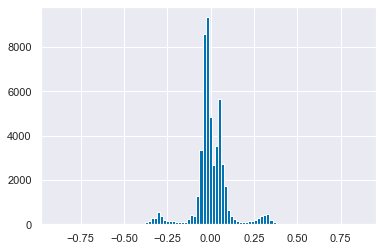

In [1145]:
corrs = numdf_3.corr()
corrs.loc[list(set(corrs.index)-set(rel_columns)),rel_columns].stack().hist(bins=100)

In [1146]:
useful_rect = corrs.loc[list(set(corrs.index)-set(rel_columns)),rel_columns]

In [1147]:
useful_rect[useful_rect>.2].stack().dropna().sort_values().tail(50)

Social Security(voteno:131)_yes                                                                                                           Affirmation_instead_of_oath    0.363859
Business of the House (Today) - Nomination of Members to Committees(voteno:17)_yes                                                        Affirmation_instead_of_oath    0.364157
European Union (Withdrawal) Bill - Interpretation of retained EU law(voteno:36)_yes                                                       Affirmation_instead_of_oath    0.364465
Sanctions and Anti-Money Laundering Bill [Lords] - Public Register of Beneficial Owners of Overseas Entities(voteno:144)_yes              Affirmation_instead_of_oath    0.364465
European Union (Withdrawal) Bill - Scrutiny Committee(voteno:71)_yes                                                                      Affirmation_instead_of_oath    0.364824
European Union (Withdrawal) Bill - EEA Agreement(voteno:72)_yes                                               

In [1148]:
# Judaism/Hebrew Bible looks like *small number correlations*
# oath/affirm looks like a party divide

In [1149]:
rel_columns

['Holy Book(Bhagavad Gita)',
 'Holy Book(Dhammapada)',
 'Holy Book(Hebrew Bible)',
 'Holy Book(Jerusalem Bible)',
 'Holy Book(King James Bible)',
 'Holy Book(New Testament)',
 'Holy Book(Old Testament)',
 'Holy Book(Quran)',
 'Holy Book(Scottish Bible)',
 'Holy Book(Torah)',
 'Holy Book(Welsh Bible)',
 'Holy Book(Book of Mormon)',
 'Affirmation_instead_of_oath',
 'Buddhism (Triratna)',
 'Christian',
 'Christian (Baptist)',
 'Christian (Catholic)',
 'Christian (Church of England)',
 'Christian (Church of Ireland)',
 'Christian (Church of Scotland)',
 'Christian (Evangelical)',
 'Christian (Free Church of Scotland)',
 'Christian (Free Presbyterian Church of Ulster)',
 'Christian (Methodist)',
 'Christian (Mormon)',
 'Christian (Presbyterian Church in Ireland)',
 'Christian (Quaker)',
 'Christian (Scottish Episcopal)',
 'Hindu',
 'NoInf&Affirm',
 'NoInf&Oath',
 'NoInf&NotKJB',
 'NoInf&KJB',
 'Inf&KJB',
 'Inf&Affirm',
 'Inf&Oath']

In [1150]:
useful_rect['Christian (Evangelical)'].dropna().sort_values()

NaN                                                                                                                                                -0.270465
Northern Ireland (Executive Formation) Bill - International obligations(voteno:428)_yes                                                            -0.110119
Northern Ireland (Executive Formation) Bill - Progress reports(voteno:438)_yes                                                                     -0.107948
Northern Ireland (Executive Formation) Bill - New Clause 1(voteno:427)_yes                                                                         -0.094439
European Union (Withdrawal) (No. 5) Bill - Duties in connection with Article 50 extension(voteno:407)_no                                           -0.091848
                                                                                                                                                      ...   
Abortion(voteno:244)_no                                   

In [1151]:
useful_rect['Christian (Mormon)'].dropna().sort_values()

Royal Assent - Independent Complaints and Grievance Policy(voteno:232)_abs(missing)                                                          -0.127247
NaN                                                                                                                                          -0.094644
Supply and Appropriation (Anticipation and Adjustments) Bill - Charges(voteno:125)_abs(missing)                                              -0.088729
Main Estimates 2018-19(voteno:202)_abs(missing)                                                                                              -0.081210
Adjournment (Summer)(voteno:423)_abs(missing)                                                                                                -0.071052
                                                                                                                                                ...   
Uk&#8217;S Withdrawal from the European Union(voteno:358)_abs(missing)                        

In [1152]:
useful_rect['Christian (Free Church of Scotland)'].dropna().sort_values()

Business of the House (Today) - European Statutory Instruments Committee(voteno:215)_abs(missing)                                        -0.086075
PRAYERS - <i> [Mr Speaker in the Chair] </i>(voteno:132)_abs(missing)                                                                    -0.083439
Nhs Long-Term Plan - Sewel Convention(voteno:188)_abs(missing)                                                                           -0.074826
Deferred Divisions - Education(voteno:381)_yes                                                                                           -0.071659
Petition - Home Education: Draft Guidance and Consultation - 6. European Union(voteno:230)_yes                                           -0.071060
                                                                                                                                            ...   
Main Estimates 2018-19 - Treasury(voteno:201)_no                                                                      

In [1153]:
useful_rect.loc['Abortion(voteno:244)_no'].sort_values()

Affirmation_instead_of_oath                      -0.212387
NoInf&Affirm                                     -0.197960
NoInf&NotKJB                                     -0.183246
Inf&Affirm                                       -0.058745
Holy Book(Quran)                                 -0.041106
Hindu                                            -0.035975
Christian (Church of England)                    -0.025641
Christian (Quaker)                               -0.025401
Christian (Church of Scotland)                   -0.017948
Holy Book(Dhammapada)                            -0.017948
Buddhism (Triratna)                              -0.017948
Christian (Free Church of Scotland)              -0.017948
Christian (Scottish Episcopal)                   -0.017948
Christian (Methodist)                            -0.017948
Christian (Baptist)                              -0.017948
Holy Book(Old Testament)                         -0.010139
Holy Book(Welsh Bible)                           -0.0099

In [1154]:
useful_rect.loc['Northern Ireland (Executive Formation and Exercise of Functions) Bill - Equal rights for people of Northern Ireland (No. 2)(voteno:250)_no'].sort_values()

Affirmation_instead_of_oath                      -0.177788
NoInf&Affirm                                     -0.164279
NoInf&NotKJB                                     -0.155196
Holy Book(New Testament)                         -0.056715
Inf&Affirm                                       -0.052080
Holy Book(Old Testament)                         -0.045110
Hindu                                            -0.034025
Christian (Quaker)                               -0.024025
Christian (Church of England)                    -0.021377
Christian (Baptist)                              -0.016976
Christian (Free Church of Scotland)              -0.016976
Holy Book(Dhammapada)                            -0.016976
Buddhism (Triratna)                              -0.016976
Christian (Church of Scotland)                   -0.016976
Christian (Methodist)                            -0.016976
Christian (Scottish Episcopal)                   -0.016976
Holy Book(Quran)                                 -0.0087

In [1155]:
# Holy Book(Book of Mormon)              0.134840
# Christian (Mormon)                     0.134840
# Christian (Evangelical)                0.146477
# Holy Book(King James Bible)            0.186463

# feels like the 'cluster' for religious conservatism (but would have to separate from Conservative-aligned voting!)

## would like to separate No Religion Mentioned & Affirmed, No Religion Mentioned & King James Bible


In [1158]:
# df_filled_in[ df_filled_in["Winner19_religion"]=="Christian (Free Church of Scotland)" ].values

In [1157]:
numdf_3['Abortion(voteno:244)_no'].sum()

125

In [ ]:
# nan = no explicit religious information

In [1159]:
numdf_3.groupby(['Affirmation_instead_of_oath','Holy Book(King James Bible)',np.nan])['Abortion(voteno:244)_no'].mean()

Affirmation_instead_of_oath  Holy Book(King James Bible)  nan
0.0                          0.0                          0      0.280000
                                                          1      0.170213
                             1.0                          0      0.340659
                                                          1      0.197015
1.0                          0.0                          0      0.071429
                                                          1      0.028986
Name: Abortion(voteno:244)_no, dtype: float64

In [1507]:
numdf_3["NoInf&Affirm"] = ( (numdf_3['Affirmation_instead_of_oath']==1.0)&(numdf_3[np.nan]==1.0) ).astype('float')
numdf_3["NoInf&Oath"] = ( (numdf_3['Affirmation_instead_of_oath']==0.0)&(numdf_3[np.nan]==1.0) ).astype('float')
numdf_3["NoInf&NotKJB"] = ( (numdf_3['Holy Book(King James Bible)']==0.0)&(numdf_3[np.nan]==1.0) ).astype('float')
numdf_3["NoInf&KJB"] = ( (numdf_3['Holy Book(King James Bible)']==1.0)&(numdf_3[np.nan]==1.0) ).astype('float')
numdf_3["Inf&KJB"] = ( (numdf_3['Holy Book(King James Bible)']==1.0)&(numdf_3[np.nan]==0.0) ).astype('float')
numdf_3["Inf&Affirm"] = ( (numdf_3['Affirmation_instead_of_oath']==1.0)&(numdf_3[np.nan]==0.0) ).astype('float')
numdf_3["Inf&Oath"] = ( (numdf_3['Affirmation_instead_of_oath']==0.0)&(numdf_3[np.nan]==0.0) ).astype('float')

rel_columns.extend(["NoInf&Affirm","NoInf&Oath","NoInf&NotKJB","NoInf&KJB","Inf&KJB","Inf&Affirm","Inf&Oath"])
rel_columns

['Holy Book(Bhagavad Gita)',
 'Holy Book(Dhammapada)',
 'Holy Book(Hebrew Bible)',
 'Holy Book(Jerusalem Bible)',
 'Holy Book(King James Bible)',
 'Holy Book(New Testament)',
 'Holy Book(Old Testament)',
 'Holy Book(Quran)',
 'Holy Book(Scottish Bible)',
 'Holy Book(Torah)',
 'Holy Book(Welsh Bible)',
 'Holy Book(Book of Mormon)',
 'Affirmation_instead_of_oath',
 'Buddhism (Triratna)',
 'Christian',
 'Christian (Baptist)',
 'Christian (Catholic)',
 'Christian (Church of England)',
 'Christian (Church of Ireland)',
 'Christian (Church of Scotland)',
 'Christian (Evangelical)',
 'Christian (Free Church of Scotland)',
 'Christian (Free Presbyterian Church of Ulster)',
 'Christian (Methodist)',
 'Christian (Mormon)',
 'Christian (Presbyterian Church in Ireland)',
 'Christian (Quaker)',
 'Christian (Scottish Episcopal)',
 'Hindu',
 'NoInf&Affirm',
 'NoInf&Oath',
 'NoInf&NotKJB',
 'NoInf&KJB',
 'Inf&KJB',
 'Inf&Affirm',
 'Inf&Oath',
 'NoInf&Affirm',
 'NoInf&Oath',
 'NoInf&NotKJB',
 'NoInf&KJ

In [1161]:
# df_filled_in.columns

In [1162]:
round(df_filled_in.fillna("None Mentioned").groupby('Winner19')['Winner19_religion'].value_counts(normalize=True)*100,2)

Winner19                 Winner19_religion                             
Alliance                 None Mentioned                                    100.00
Conservative             None Mentioned                                     79.18
                         Christian (Catholic)                                7.12
                         Christian                                           5.21
                         Christian (Evangelical)                             2.74
                         Christian (Church of England)                       1.64
                         Muslim                                              1.10
                         Hindu                                               0.82
                         Christian (Mormon)                                  0.55
                         Judaism                                             0.55
                         Nonreligious (Humanist)                             0.55
                         B

In [1163]:
# Christian (Evangelical & Catholic?)
## CAN WE JUST PICK ONE?? Surely Evangelical if there's uncertainty?

In [1164]:
round(df_filled_in.groupby('Winner19')['Affirmation_instead_of_oath'].value_counts(normalize=True)*100,2)

Winner19                 Affirmation_instead_of_oath
Alliance                 False                          100.00
Conservative             False                           93.42
                         True                             6.58
DUP                      False                           87.50
                         True                            12.50
Green                    True                           100.00
Labour                   False                           53.96
                         True                            46.04
Liberal Democrat         False                           90.91
                         True                             9.09
Plaid Cymru              False                          100.00
SDLP                     True                           100.00
Scottish National Party  True                            75.00
                         False                           25.00
Sinn Fein                False                          100.00
Sp

In [1165]:
round(df_filled_in.groupby('Winner19')['Holy Book(King James Bible)'].value_counts(normalize=True)*100,2)

Winner19                 Holy Book(King James Bible)
Alliance                 False                          100.00
Conservative             True                            80.27
                         False                           19.73
DUP                      True                            87.50
                         False                           12.50
Green                    False                          100.00
Labour                   False                           60.89
                         True                            39.11
Liberal Democrat         True                            72.73
                         False                           27.27
Plaid Cymru              False                          100.00
SDLP                     False                          100.00
Scottish National Party  False                           91.67
                         True                             8.33
Sinn Fein                False                          100.00
Sp

In [1166]:
# party variable which 'correctly' assigns speaker to party.

In [1167]:
bes_19_ids.astype(int)

0      319
1      413
2      550
3      414
4      559
      ... 
684    621
685    603
686    448
687    226
688    297
Length: 689, dtype: int32

In [1510]:
pd.get_dummies( df_filled_in["Winner17"] ).loc[bes_19_ids.dropna().astype(int)].columns

Index(['Conservative', 'DUP', 'Green', 'Independent', 'Labour',
       'Liberal Democrat', 'Plaid Cymru', 'Scottish National Party',
       'Sinn Fein', 'Speaker'],
      dtype='object')

In [1514]:
df_filled_in.columns

Index(['pano', 'ONSConstID', 'ConstituencyName', 'Country', 'Winner19',
       'Winner17', 'Winner15', 'Winner15_name', 'Winner15_religion',
       'Winner15_religion_notes', 'Winner15_religion_source', 'Winner17_name',
       'Winner17_religion', 'Winner17_religion_notes',
       'Winner17_religion_source', 'Winner19_name', 'Winner19_religion',
       'Winner19_religion_notes', 'Winner19_religion_source', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Winner17_religion_source.1', 'Winner19_surname',
       'Winner19_firstname', 'Winner17_surname', 'Winner17_firstname',
       'Winner15_surname', 'Winner15_firstname', 'Winner19_female',
       'Winner17_female', 'Winner15_female', 'Winner15_bes_bme',
       'Winner19_lgbt_out', 'Winner17_lgbt_out', 'Winner15_lgbt_out',
       'Winner19_bme', 'Winner17_bme', 'Winner15_bme', 'First election',
       'Continuous service', 'Order of Oath', 'Date of Birth',
       'Service teminated'

In [1548]:
# numdf_3["Winner19_female"] = df_filled_in.loc[bes_19_ids.dropna().astype(int)]["Winner19_female"].astype('float').values
col_list = ['Conservative', 'DUP', 'Green', 'Independent', 'Labour',
       'Liberal Democrat', 'Plaid Cymru', 'Scottish National Party',
       'Sinn Fein',]
numdf_3[col_list] = pd.get_dummies( df_filled_in["Winner17"] ).loc[bes_17_ids.dropna().astype(int)][col_list].values

In [1547]:
df_filled_in["Winner17_female"].value_counts(dropna=False)

False    442
True     208
Name: Winner17_female, dtype: int64

In [1549]:
# numdf_3
numdf_3["Winner17_female"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_female"].astype('float').values
numdf_3["Winner17_lgbt_out"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_lgbt_out"].astype('float').values
numdf_3["Winner17_bme"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_bme"].astype('float').values
numdf_3["Winner17_milvet"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_milvet"].astype('float').values
numdf_3["Winner17_cann"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_cann"].astype('float').values
numdf_3["Winner17_age"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_age"].astype('float').values
numdf_3["Winner17_children"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_children"].astype('float').values

[0]	validation_0-rmse:0.48448	validation_1-rmse:0.48662
[1]	validation_0-rmse:0.47007	validation_1-rmse:0.47305
[2]	validation_0-rmse:0.45703	validation_1-rmse:0.46013
[3]	validation_0-rmse:0.44418	validation_1-rmse:0.44936
[4]	validation_0-rmse:0.43263	validation_1-rmse:0.43996
[5]	validation_0-rmse:0.42209	validation_1-rmse:0.43041
[6]	validation_0-rmse:0.41165	validation_1-rmse:0.42160
[7]	validation_0-rmse:0.40185	validation_1-rmse:0.41247
[8]	validation_0-rmse:0.39272	validation_1-rmse:0.40504
[9]	validation_0-rmse:0.38372	validation_1-rmse:0.39829
[10]	validation_0-rmse:0.37572	validation_1-rmse:0.39146
[11]	validation_0-rmse:0.36779	validation_1-rmse:0.38566
[12]	validation_0-rmse:0.36095	validation_1-rmse:0.38056
[13]	validation_0-rmse:0.35388	validation_1-rmse:0.37531
[14]	validation_0-rmse:0.34731	validation_1-rmse:0.37073
[15]	validation_0-rmse:0.34085	validation_1-rmse:0.36639
[16]	validation_0-rmse:0.33477	validation_1-rmse:0.36179
[17]	validation_0-rmse:0.32954	validation

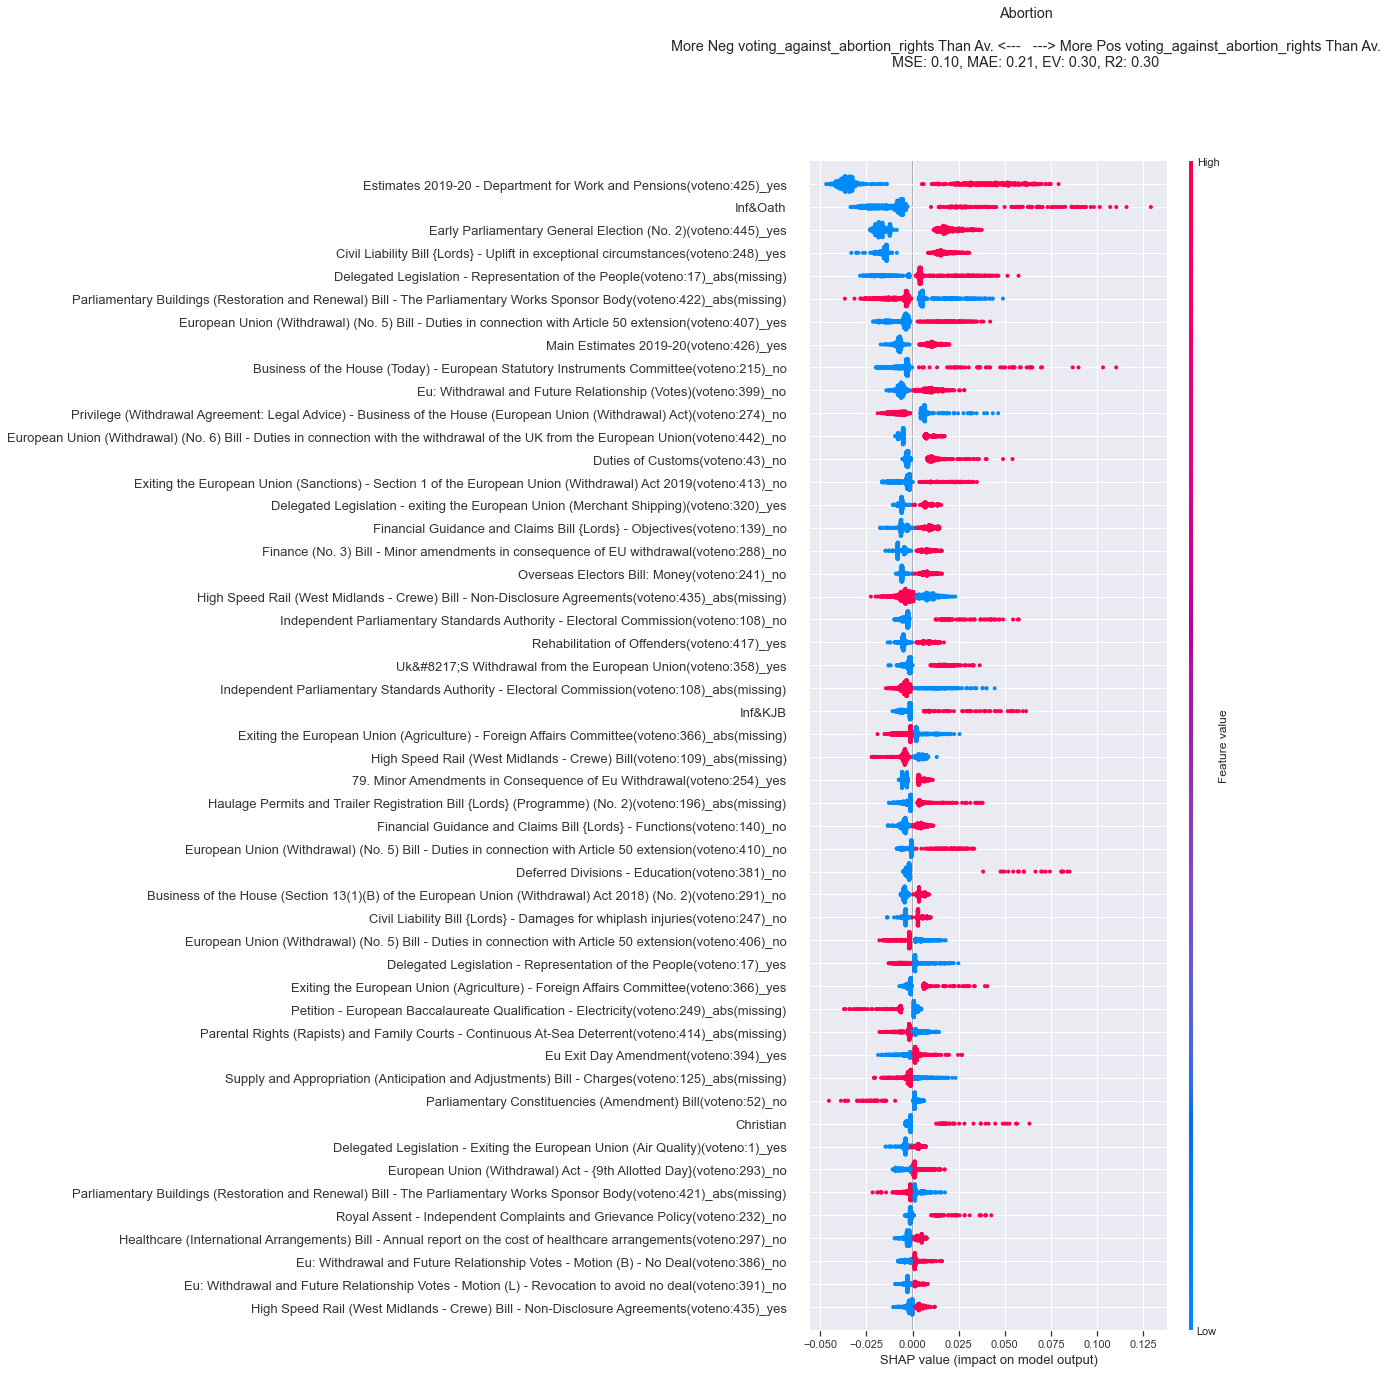

In [1177]:
base=  'voting_against_abortion_rights'
Treatment='predict_abortion_vote'
var_stub='Abortion'
var_list = ['Abortion(voteno:244)_no']
var_stub_list = ['Abortion',"Northern Ireland (Executive Formation",
                 "Cannabis (Legalisation and Regulation)(voteno:275)",
                 "Eu: Withdrawal and Future Relationship Votes - Motion (H) - EFTA and EEA(voteno:388)",
                "Uk&#8217;S Withdrawal from the Eu(voteno:347)"]

#  'Eu: Withdrawal and Future Relationship Votes - Motion (H) - EFTA and EEA(voteno:388)_yes',
# looks like the EFTA&EEA 'meaningful vote'

# 'Petition - Sudbury Bypass - Capital Gains Tax(voteno:110)_yes'
# looks like vote on capital gains tax here:
# https://hansard.parliament.uk/Commons/2018-01-31/debates/E46360EF-E41A-4FA6-A703-AE604CF082E1/CapitalGainsTax
# https://votes.parliament.uk/Votes/Commons/Division/377
# straight up Governing Coalition vs Opposition parties?

# 'Courts and Tribunals (Judiciary and Functions of Staff) Bill [Lords] - Authorised court and tribunal staff: legal advice and judicial functions(voteno:280)_no'
# guessing this just another Governing Coalition vs Opposition parties vote (on a bill bounced back from the Lords?)


df=numdf_3.drop(np.nan,axis=1).copy()
df.columns = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in df.columns]
# (explainer, shap_values, train_columns, alg)
(explainer, shap_values, train_columns, train_index, alg, output_subfolder,metrics) = \
    xgboost_run(dataset=df,var_list=var_list,
                var_stub_list = var_stub_list,
                subdir=Treatment,min_features = min(df.shape[1]-1,50),
           title = var_stub+"\n\nMore Neg "+base+" Than Av. <---   ---> More Pos "+base+" Than Av.", Treatment=Treatment)

[0]	validation_0-rmse:0.48828	validation_1-rmse:0.48854
[1]	validation_0-rmse:0.47715	validation_1-rmse:0.47756
[2]	validation_0-rmse:0.46692	validation_1-rmse:0.46755
[3]	validation_0-rmse:0.45769	validation_1-rmse:0.45831
[4]	validation_0-rmse:0.44939	validation_1-rmse:0.45015
[5]	validation_0-rmse:0.44170	validation_1-rmse:0.44238
[6]	validation_0-rmse:0.43511	validation_1-rmse:0.43587
[7]	validation_0-rmse:0.42826	validation_1-rmse:0.42919
[8]	validation_0-rmse:0.42191	validation_1-rmse:0.42309
[9]	validation_0-rmse:0.41638	validation_1-rmse:0.41758
[10]	validation_0-rmse:0.41117	validation_1-rmse:0.41254
[11]	validation_0-rmse:0.40619	validation_1-rmse:0.40780
[12]	validation_0-rmse:0.40177	validation_1-rmse:0.40387
[13]	validation_0-rmse:0.39767	validation_1-rmse:0.39987
[14]	validation_0-rmse:0.39355	validation_1-rmse:0.39601
[15]	validation_0-rmse:0.39024	validation_1-rmse:0.39287
[16]	validation_0-rmse:0.38712	validation_1-rmse:0.39017
[17]	validation_0-rmse:0.38418	validation

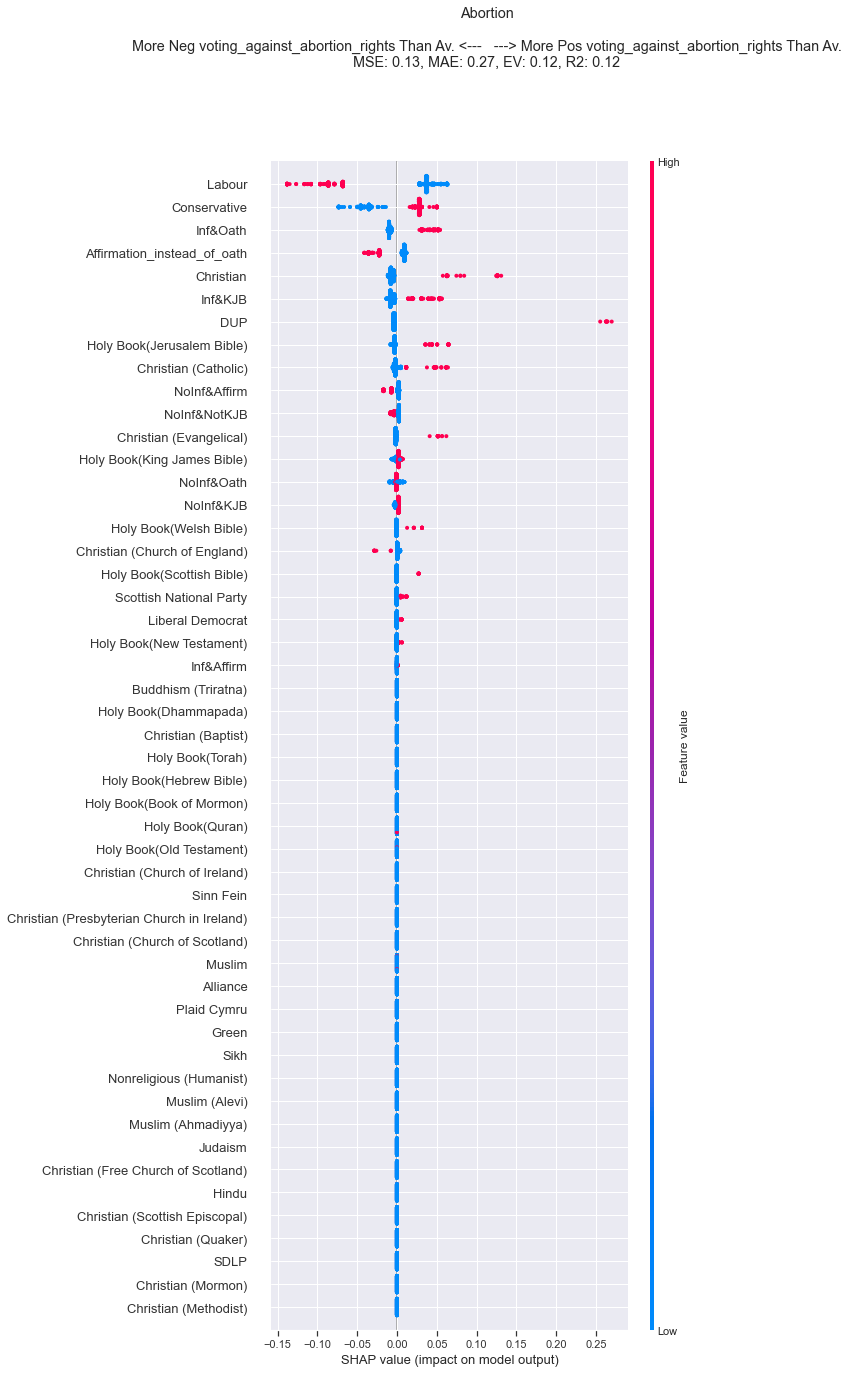

In [1183]:
base=  'voting_against_abortion_rights'
Treatment='predict_abortion_vote'
var_stub='Abortion'
var_list = ['Abortion(voteno:244)_no']
var_stub_list = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in matrix_2017["uniqueBillName"].values]



df=numdf_3.drop(np.nan,axis=1).copy()
df.columns = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in df.columns]
# (explainer, shap_values, train_columns, alg)
(explainer, shap_values, train_columns, train_index, alg, output_subfolder,metrics) = \
    xgboost_run(dataset=df,var_list=var_list,
                var_stub_list = var_stub_list,
                subdir=Treatment,min_features = min(df.shape[1]-1,50),
           title = var_stub+"\n\nMore Neg "+base+" Than Av. <---   ---> More Pos "+base+" Than Av.", Treatment=Treatment)

[0]	validation_0-rmse:0.48731	validation_1-rmse:0.48697
[1]	validation_0-rmse:0.47573	validation_1-rmse:0.47513
[2]	validation_0-rmse:0.46508	validation_1-rmse:0.46448
[3]	validation_0-rmse:0.45620	validation_1-rmse:0.45556
[4]	validation_0-rmse:0.44727	validation_1-rmse:0.44677
[5]	validation_0-rmse:0.43873	validation_1-rmse:0.43837
[6]	validation_0-rmse:0.43051	validation_1-rmse:0.43063
[7]	validation_0-rmse:0.42258	validation_1-rmse:0.42310
[8]	validation_0-rmse:0.41637	validation_1-rmse:0.41703
[9]	validation_0-rmse:0.41036	validation_1-rmse:0.41098
[10]	validation_0-rmse:0.40476	validation_1-rmse:0.40515
[11]	validation_0-rmse:0.39934	validation_1-rmse:0.39993
[12]	validation_0-rmse:0.39449	validation_1-rmse:0.39512
[13]	validation_0-rmse:0.38964	validation_1-rmse:0.39073
[14]	validation_0-rmse:0.38529	validation_1-rmse:0.38641
[15]	validation_0-rmse:0.38209	validation_1-rmse:0.38346
[16]	validation_0-rmse:0.37764	validation_1-rmse:0.38002
[17]	validation_0-rmse:0.37419	validation

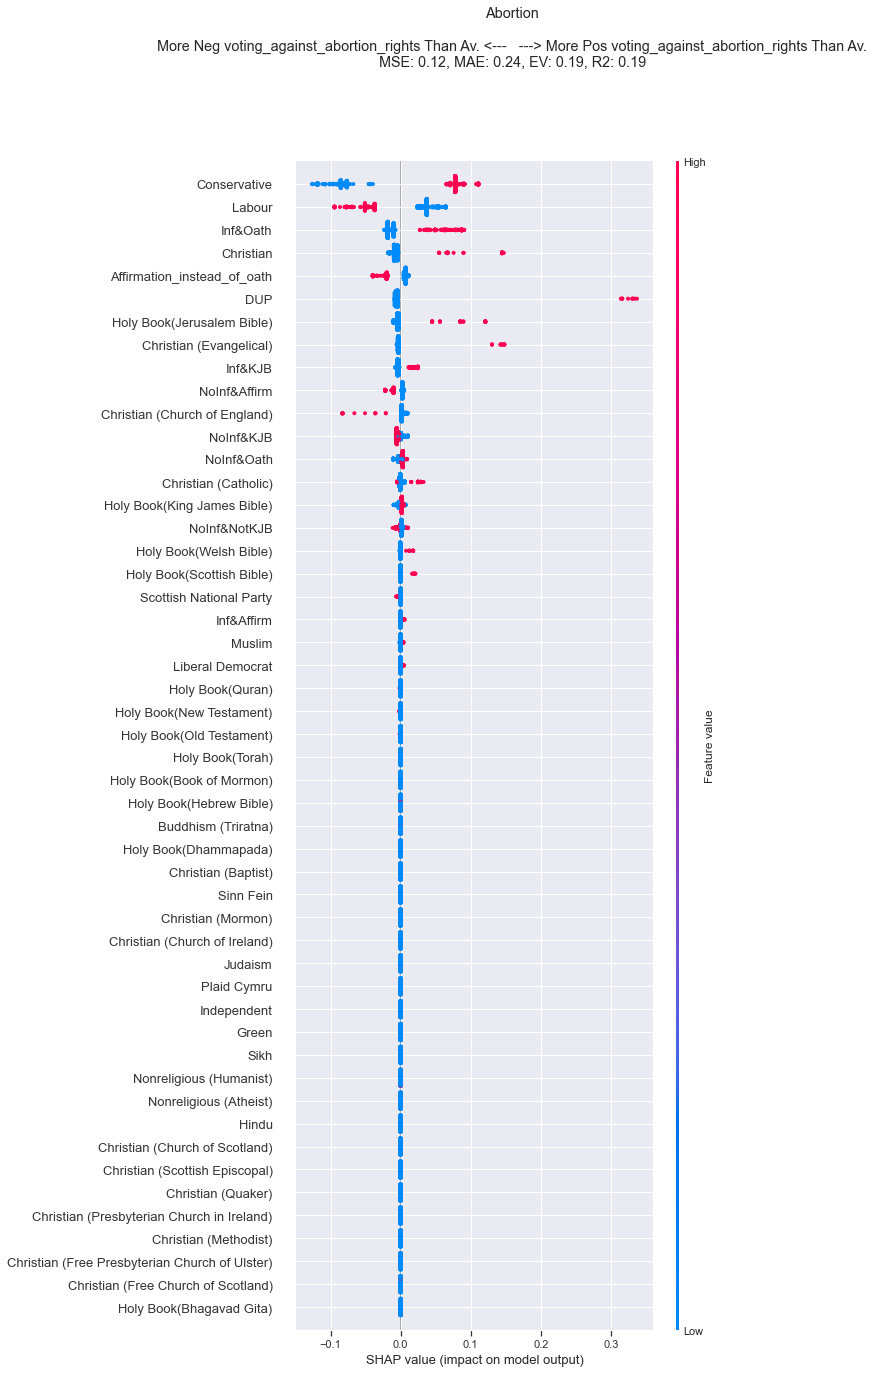

In [1513]:
base=  'voting_against_abortion_rights'
Treatment='predict_abortion_vote'
var_stub='Abortion'
var_list = ['Abortion(voteno:244)_no']
var_stub_list = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in matrix_2017["uniqueBillName"].values]



df=numdf_3.drop(np.nan,axis=1).copy()
df.columns = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in df.columns]
# (explainer, shap_values, train_columns, alg)
(explainer, shap_values, train_columns, train_index, alg, output_subfolder,metrics) = \
    xgboost_run(dataset=df,var_list=var_list,
                var_stub_list = var_stub_list,
                subdir=Treatment,min_features = min(df.shape[1]-1,50),
           title = var_stub+"\n\nMore Neg "+base+" Than Av. <---   ---> More Pos "+base+" Than Av.", Treatment=Treatment)

[0]	validation_0-rmse:0.48735	validation_1-rmse:0.48715
[1]	validation_0-rmse:0.47575	validation_1-rmse:0.47546
[2]	validation_0-rmse:0.46419	validation_1-rmse:0.46520
[3]	validation_0-rmse:0.45289	validation_1-rmse:0.45485
[4]	validation_0-rmse:0.44405	validation_1-rmse:0.44584
[5]	validation_0-rmse:0.43546	validation_1-rmse:0.43696
[6]	validation_0-rmse:0.42703	validation_1-rmse:0.42946
[7]	validation_0-rmse:0.41914	validation_1-rmse:0.42223
[8]	validation_0-rmse:0.41225	validation_1-rmse:0.41624
[9]	validation_0-rmse:0.40617	validation_1-rmse:0.41021
[10]	validation_0-rmse:0.40037	validation_1-rmse:0.40423
[11]	validation_0-rmse:0.39497	validation_1-rmse:0.39884
[12]	validation_0-rmse:0.38905	validation_1-rmse:0.39436
[13]	validation_0-rmse:0.38397	validation_1-rmse:0.38968
[14]	validation_0-rmse:0.37938	validation_1-rmse:0.38533
[15]	validation_0-rmse:0.37585	validation_1-rmse:0.38235
[16]	validation_0-rmse:0.37124	validation_1-rmse:0.37885
[17]	validation_0-rmse:0.36769	validation

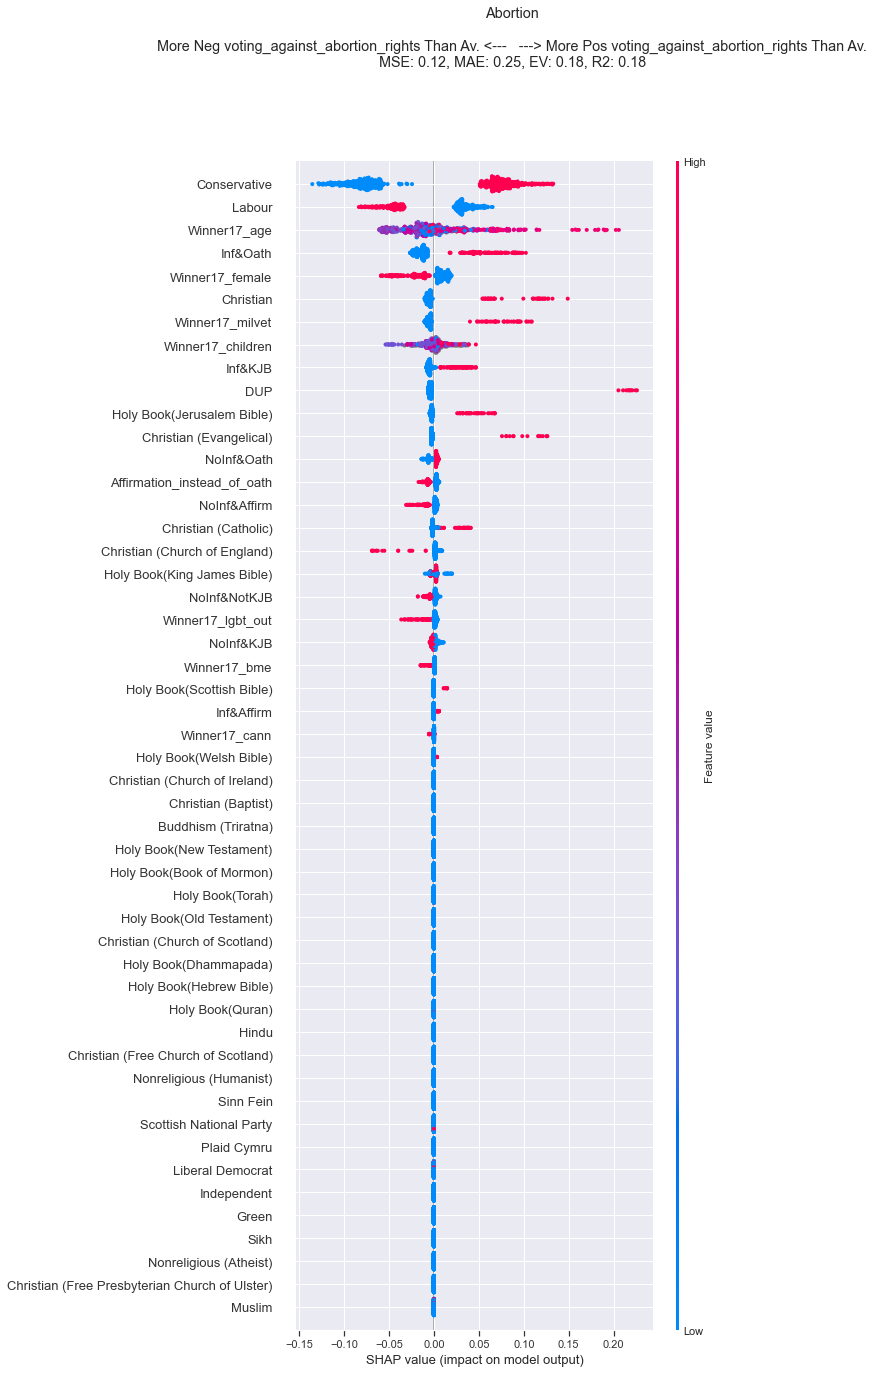

In [1550]:
base=  'voting_against_abortion_rights'
Treatment='predict_abortion_vote'
var_stub='Abortion'
var_list = ['Abortion(voteno:244)_no']
var_stub_list = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in matrix_2017["uniqueBillName"].values]



df=numdf_3.drop(np.nan,axis=1).copy()
df.columns = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in df.columns]
# (explainer, shap_values, train_columns, alg)
(explainer, shap_values, train_columns, train_index, alg, output_subfolder,metrics) = \
    xgboost_run(dataset=df,var_list=var_list,
                var_stub_list = var_stub_list,
                subdir=Treatment,min_features = min(df.shape[1]-1,50),
           title = var_stub+"\n\nMore Neg "+base+" Than Av. <---   ---> More Pos "+base+" Than Av.", Treatment=Treatment)

In [1182]:
matrix_2017["uniqueBillName"]

0      Delegated Legislation - Representation of the ...
1      Early Parliamentary General Election Bill - Ea...
2      Early Parliamentary General Election Bill - Ea...
3                               Miscellaneous(voteno:14)
4        Early Parliamentary General Election(voteno:13)
                             ...                        
458    Air Travel Organisers&#8217; Licensing Bill - ...
459                           Economy and Jobs(voteno:4)
460                           Economy and Jobs(voteno:3)
461                           Economy and Jobs(voteno:2)
462    Debate on the Address - Health, Social Care an...
Name: uniqueBillName, Length: 463, dtype: object

In [928]:
[x for x in numdf_3.drop(np.nan,axis=1).columns if "voteno:280" in x]

['Courts and Tribunals (Judiciary and Functions of Staff) Bill [Lords] - Authorised court and tribunal staff: legal advice and judicial functions(voteno:280)_abs(missing)',
 'Courts and Tribunals (Judiciary and Functions of Staff) Bill [Lords] - Authorised court and tribunal staff: legal advice and judicial functions(voteno:280)_no',
 'Courts and Tribunals (Judiciary and Functions of Staff) Bill [Lords] - Authorised court and tribunal staff: legal advice and judicial functions(voteno:280)_yes']

In [927]:
numdf_3["Conservative"].value_counts()

1    267
0    219
Name: Conservative, dtype: int64

In [938]:
replace_dict = {'Courts and Tribunals (Judiciary and Functions of Staff) Bill [Lords] - Authorised court and tribunal staff: legal advice and judicial functions(voteno:280)_no':"Courts and Tribunals"}
numdf_3

,Holy Book(Bhagavad Gita),Holy Book(Dhammapada),Holy Book(Hebrew Bible),Holy Book(Jerusalem Bible),Holy Book(King James Bible),Holy Book(New Testament),Holy Book(Old Testament),Holy Book(Quran),Holy Book(Scottish Bible),Holy Book(Torah),...,Inf&KJB,Inf&Affirm,Inf&Oath,Winner19_female,Conservative,Green,Labour,Liberal Democrat,Plaid Cymru,Scottish National Party
41371,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0,0,1,0,0,0
41372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,1,0,0,0
41373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,1,0,0,0
41374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,0,1,0,0,0
41375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42050,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0,0,0,0,0
42065,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1,0,0,0,0,0
42067,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
42070,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0,0,0,0,0


In [941]:
numdf_3.rename(columns=replace_dict).groupby(["Conservative",'Courts and Tribunals'])['Abortion(voteno:244)_no'].value_counts()
    #normalize=True)

Conservative  Courts and Tribunals  Abortion(voteno:244)_no
0             0                     0                          215
                                    1                            4
1             0                     0                           18
              1                     0                          155
                                    1                           94
Name: Abortion(voteno:244)_no, dtype: int64

In [ ]:
### Add party/gender/race columns

In [902]:
# df_filled_in.loc[bes_19_ids.dropna().astype(int)]["Winner19_female"].astype('float')

In [903]:
# numdf_3.shape

In [901]:
# numdf_1 = df_filled_in.loc[bes_19_ids.dropna().astype(int)][col_list].astype('float')
# numdf_1.index = temp.index
# numdf_2 = pd.get_dummies(df_filled_in["Winner19_religion"].loc[bes_19_ids.dropna().astype(int)],dummy_na=True)
# numdf_2.index = temp.index
# numdf_3 = pd.concat([numdf_1,numdf_2,temp],axis=1)

In [18]:
# lex_dists_17_19 = df_filled_in.apply(lambda x: levenshtein.distance(x['Winner17_name'], x['Winner19_name']), axis=1 )
# lex_dists_17_19.hist(bins=20)

In [19]:
# df_filled_in[(lex_dists_17_19>0)&(lex_dists_17_19<8)][["Winner17_name","Winner19_name"]]

In [20]:
# lex_dists_15_17 = df_filled_in.apply(lambda x: levenshtein.distance(x['Winner15_name'], x['Winner17_name']), axis=1 )
# lex_dists_15_17.hist(bins=20)

In [17]:
# df_filled_in[(lex_dists_15_17>0)&(lex_dists_15_17<8)][["Winner15_name","Winner17_name"]][100:150]

In [ ]:
# 199	Nicolson, John	Swinson, Jo
# 376	Meale, Alan	Bradley, Ben

In [16]:
# df_filled_in[(df_filled_in["Winner17_name"]!=df_filled_in["Winner19_name"])][["Winner17_name","Winner19_name"]][50:100]

In [15]:
# df_temp["SeatChange1517"].value_counts().index

In [ ]:
## TODO

## 2019_oath_affirm data -> label as specifically 2019
# how long would it take to do it manually? 632

## line up 2015 vote matrix with 2015 excel sheet names

## get a unique id for MPs and a set of akas

## get scrape/overview data for new 2017mps, new2015mps, how many new for 2010?

## when was the latest Pippa Norris candidate dataset?

In [ ]:
## line up 2015 vote matrix names with 2015 excel sheet names

In [ ]:
# replace_dict_surnames = {'de Cordova':'De Cordova','Saville-Roberts':'Saville Roberts',
#                         'Long-Bailey':'Long Bailey','O&#39;Hara':"O'Hara",'O&#39;Brien':"O'Brien","O&#39;Mara":"O'Mara",
#                         'McNally':'Mc Nally',
#                         'Braverman':"Fernandes",# pain - her name changes with marriage
# #                         'Docherty-Hughes':'Docherty', #name changes with marriage
#                         'Lopez':'Dockerill', #name changes with marriage
#                         }


# replace_dict_names = {'Ashworth, Jon':'Ashworth, Jonathan',
#  'Baker, Steven':'Baker, Steve',
#  'Barclay, Steve':'Barclay, Stephen',
#  'Boles, Nicholas':'Boles, Nick',
#  'Brown, Nick':'Brown, Nicholas',
#  'Cable, Vincent':'Cable, Vince',
# #  'Daby, Janet',
#  'Dakin, Nicholas':'Dakin, Nic',
# #  'Docherty, Martin',
# #  'Dodds, Jane',
# #  'Forbes, Lisa',
#  'Gill, Preet Kaur':'Gill, Preet',
#  'Hancock, Matthew':'Hancock, Matt',
# #  'Hermon, Sylvia',
#  'Johnson, Diana R.':'Johnson, Diana',
#  'Johnson, Jo':'Johnson, Joseph',
# #  'Jones, Ruth',
#  'Killen, Ged':'Killen, Gerard',
# #  'Lopez, Julia',
#  'Matheson, Chris':'Matheson, Christian',
#  'McDonnell, John Martin':'McDonnell, John',
#  'Miliband, Ed':'Miliband, Edward',
#  'Neill, Bob':'Neill, Robert',
#  'Platt, Jo':'Platt, Joanne',
#  'Poulter, Daniel':'Poulter, Dan',
#  'Pound, Steve':'Pound, Stephen',
#  'Shah, Naseem':'Shah, Naz',
#  'Slaughter, Andrew':'Slaughter, Andy',
#  'Tugendhat, Thomas':'Tugendhat, Tom',
#  'Vaizey, Ed':'Vaizey, Edward',
#  '[Missing last name for 41744], John':'Mann, John',
#  'Docherty, Martin':'Docherty-Hughes, Martin',#name changes with marriage
#  'Lopez, Julia':'Dockerill, Julia',
# }

# mps_2017["surname"] = mps_2017["surname"].replace(replace_dict_surnames)
# mps_2017["fullname"] = mps_2017.apply(lambda x: x["surname"]+", "+x["firstname"],axis=1)
# mps_2017["fullname"] = mps_2017["fullname"].replace(replace_dict_names)

# #  'Hermon' NI independent, Daby came in by election, Forbes came in byelection, Fernandes -> Braverman by marriage
# # Jane Dodds came in in a byelection as well
# # Dockerill -> Lopez by marriage, Docherty -> Docherty-Hughes

In [1054]:
# df_filled_in["Winner15_name"][~df_filled_in["Winner15_name"].isin(mps_2015["fullname"])]
# len( mps_2015["fullname"].unique() )
# mps_2015.sort_values(by='fullname')["fullname"].drop_duplicates()
# len(df_filled_in["Winner15_name"].unique())
# df_filled_in["Winner15_name"].value_counts()

# came in byelections 2015-2017
# Afzal Khan
# Trudy Harrison
# Gareth Snell
# Caroline Johnson
# Sarah Olney
# Robert Courts
# Tracy Brabin
# Rosena Allin-Khan
# Chris Elmore
# Gill Furniss
# Jim McMahon

# Speakers & deputy speakers
# John Bercow
# Eleanor Laing
# Natascha Engel
# Lindsay Hoyle

unique_names_15_pw = pd.Series( mps_2015["fullname"][~mps_2015["fullname"].isin(["Khan, Afzal","Harrison, Trudy","Snell, Gareth","Johnson, Caroline","Olney, Sarah","Courts, Robert",
                          "Brabin, Tracy","Allin-Khan, Rosena","Elmore, Chris","Furniss, Gill","McMahon, Jim"])].unique() ).sort_values()

# drop speaker, deputy speakers and Sinn Fein abstentionists

unique_names_15_bes = df_filled_in["Winner15_name"][~df_filled_in["Winner15_name"].isin(["Bercow, John","Laing, Eleanor","Engel, Natascha","Hoyle, Lindsay",
                                                                                        "Maskey, Paul","Molloy, Francie","Brady, Mickey","Doherty, Pat"])].sort_values()

sorted_dfs = pd.DataFrame([unique_names_15_pw.values,unique_names_15_bes.values]).T.apply(lambda x: {x[0]:x[1]},axis=1)
replace_dict_pw15 = {k: v for d in sorted_dfs for k, v in d.items()}

mps_2015[~mps_2015["fullname"].replace(replace_dict_pw15).isin(df_filled_in["Winner15_name"])]
# only missing people who came in byelection!

1                 Bebb, Guto ap Owain
4             Donaldson, Stuart Blair
5                  Gray, Neil Charles
13                    O'Hara, Brendan
22     Prentis, Victoria Mary Boswell
                    ...              
640                Donaldson, Jeffrey
641                   Molloy, Francie
642                     Brady, Mickey
643                      Paisley, Ian
649                      Doherty, Pat
Name: Winner15_name, Length: 194, dtype: object

In [ ]:
## Trying to extract data from parliamentary recording of oath/affirm ceremony

## setup for partial manual extraction

In [1176]:
# Xpath for MP name
# /html/body/div[2]/div[2]/div[3]/div/div[2]/div[2]/div[2]/div[2]/ul/li[85]/div[2]/article/header/h4/text()
# /html/body/div[2]/div[2]/div[3]/div/div[2]/div[2]/div[2]/div[2]/ul/li[87]/div[2]/article/header/h4/text()

# Xpath for timestamp
# /html/body/div[2]/div[2]/div[3]/div/div[2]/div[2]/div[2]/div[2]/ul/li[85]/div[1]/h4/span
# /html/body/div[2]/div[2]/div[3]/div/div[2]/div[2]/div[2]/div[2]/ul/li[87]/div[1]/h4/span

response = requests.get(
	url="https://parliamentlive.tv/event/index/5e7b64c4-a3a9-4a4c-b30e-e66bfe0ad24b?in=14:55:40&_gl=1*1xmmjlf*_ga*MjE5MTkzMzE4LjE2Nzc2NjM2ODk.*_ga_L0NJWDWMGN*MTY3ODI3MDc5OS4yLjEuMTY3ODI3MDk4Ni40Mi4wLjA.#player-tabs",
)
soup = BeautifulSoup(response.content, 'html.parser')
dom = etree.HTML(str(soup))

sel = soup.select( '#logs > div.slimScrollDiv > ul > li.logouter.active > div.col-md-10.nopadding > article > header > h4')

names = pd.Series(soup.select( 'article > header > h4')).apply(lambda x: str(x.contents[0]).strip())[4:]
times = pd.Series(soup.select( 'div.col-md-2.nopadding > h4 > span')).apply(lambda x: str(x).split("> ")[1].split("</")[0])[4:]

# discrepancy of one in series length

constituencies = names.apply(lambda x: ",".join(x.split("(")[1].split(",")[0:-1]))
party = names.apply(lambda x: x.replace("Labour (Co-op)","Labour{Co-op}")).apply(lambda x: x.split(")")[0].split(", ")[-1])
party.value_counts()
# constituencies.value_counts()
# no constituency repetition, party list reasonable

pd.Series(flatten(names.apply(lambda x: x.split("(")[0].split(" ")))).value_counts().head(50)

# strip honoraries
# Rt Hon MP Mr Sir Dr Mrs QC
# only 392 MPs

just_names = names.apply(lambda x: x.replace("Rt","").replace("Hon ","").replace("Rt ","")\
                              .replace("MP ","").replace("Mr ","").replace("Sir ","")\
                              .replace("Dr ","").replace("Mrs ","").replace("QC ","")\
                              .split(" (")[0].strip()
                             )
surname_first = just_names.apply(lambda x: x.split(" ")[-1]+", "+" ".join( x.split(" ")[:-1]))

## -> to a csv
pd.concat([constituencies,party,names,just_names,surname_first,times],axis=1)\
    .to_csv("C:\\Users\\Gamer\\Downloads\\Oaths_Affirmations_2017.csv")



pd.to_datetime(times).diff().apply(lambda x: x.total_seconds()).hist(bins=100)

temp_times = pd.to_datetime(times).diff().apply(lambda x: x.total_seconds())
temp_times[temp_times<1000].hist(bins=100)
temp_times[temp_times<1000].median()
# 650*30/(60*60)
# pretty much about the length of the file
# ~30 seconds per oath


oaths_and_affirmations["Oath or Affirmation"].value_counts()

## affirming more rare than oath

# default is Oath & King James Bible = 381 50%
# Affirm in 155 25%
# Oath&Jerusalem Bible 

In [ ]:
Oaths_Affirmations_2017 = pd.read_csv("C:\\Users\\Gamer\\Downloads\\Oaths_Affirmations_2017.csv")
Oaths_Affirmations_2017["clip_time"] = (pd.to_datetime(Oaths_Affirmations_2017["5"])-pd.to_datetime("14:40:52")).apply(lambda x: str(x).split("0 days ")[1])
Oaths_Affirmations_2017.to_csv("C:\\Users\\Gamer\\Downloads\\Oaths_Affirmations_2017.csv")

O    485
A    158
Name: Oath or Affirmation, dtype: int64

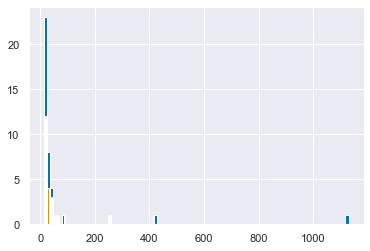

In [1599]:
response = requests.get(
	url="https://parliamentlive.tv/Event/Index/0784ef19-a1bb-49c0-9039-279b4b1fa664#player-tabs",
)
soup = BeautifulSoup(response.content, 'html.parser')
dom = etree.HTML(str(soup))

sel = soup.select( '#logs > div.slimScrollDiv > ul > li.logouter.active > div.col-md-10.nopadding > article > header > h4')

names = pd.Series(soup.select( 'article > header > h4')).apply(lambda x: str(x.contents[0]).strip())[4:]
times = pd.Series(soup.select( 'div.col-md-2.nopadding > h4 > span')).apply(lambda x: str(x).split("> ")[1].split("</")[0])[4:]

## 
stop_index = (names[names=="Sitting suspended"].index)[0]
names = names.loc[names.index[names.index<stop_index]]
times = times.loc[names.index[names.index<stop_index]]

# discrepancy of one in series length

constituencies = names.apply(lambda x: ",".join(x.split("(")[1].split(",")[0:-1]))



party = names.apply(lambda x: x.replace("Labour (Co-op)","Labour{Co-op}")).apply(lambda x: x.split(")")[0].split(", ")[-1])
party.value_counts()
# constituencies.value_counts()
# no constituency repetition, party list reasonable

pd.Series(flatten(names.apply(lambda x: x.split("(")[0].split(" ")))).value_counts().head(50)

# strip honoraries
# Rt Hon MP Mr Sir Dr Mrs QC
# only 392 MPs

just_names = names.apply(lambda x: x.replace("Rt","").replace("Hon ","").replace("Rt ","")\
                              .replace("MP ","").replace("Mr ","").replace("Sir ","")\
                              .replace("Dr ","").replace("Mrs ","").replace("QC ","")\
                              .split(" (")[0].strip()
                             )
surname_first = just_names.apply(lambda x: x.split(" ")[-1]+", "+" ".join( x.split(" ")[:-1]))

## -> to a csv
pd.concat([constituencies,party,names,just_names,surname_first,times],axis=1)\
    .to_csv("C:\\Users\\Gamer\\Downloads\\Oaths_Affirmations_2017-2.csv")



pd.to_datetime(times).diff().apply(lambda x: x.total_seconds()).hist(bins=100)

temp_times = pd.to_datetime(times).diff().apply(lambda x: x.total_seconds())
temp_times[temp_times<1000].hist(bins=100)
temp_times[temp_times<1000].median()
# 650*30/(60*60)
# pretty much about the length of the file
# ~30 seconds per oath


oaths_and_affirmations["Oath or Affirmation"].value_counts()

## affirming more rare than oath

# default is Oath & King James Bible = 381 50%
# Affirm in 155 25%
# Oath&Jerusalem Bible 

O    485
A    158
Name: Oath or Affirmation, dtype: int64

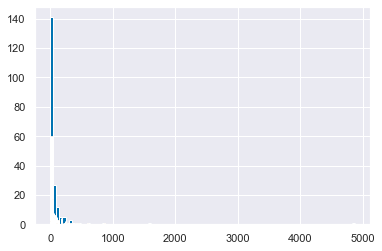

In [1634]:
## actually *2nd* 2017 swearing in session

response = requests.get(
	url="https://parliamentlive.tv/Event/Index/c2227266-7ad0-43a8-9eb1-0ff0fe962685",
)
soup = BeautifulSoup(response.content, 'html.parser')
dom = etree.HTML(str(soup))

sel = soup.select( '#logs > div.slimScrollDiv > ul > li.logouter.active > div.col-md-10.nopadding > article > header > h4')
skip_rows = 1
names = pd.Series(soup.select( 'article > header > h4')).apply(lambda x: str(x.contents[0]).strip())[skip_rows:]
times = pd.Series(soup.select( 'div.col-md-2.nopadding > h4 > span')).apply(lambda x: str(x).split("> ")[1].split("</")[0])[skip_rows:]

# BUG in their page!
replace_dict = {"ayr":"Bill Grant MP (Ayr, Carrick and Cumnock, Conservative)"}
names= names.replace(replace_dict)

drop_indices = names[names=="Swearing in of Members of the Commons"].index.values
names = names.drop(drop_indices)
times = times.drop(drop_indices)


## 
# stop_index = (names[names=="Swearing in of Members of the Commons"].index)[0]
# names = names.loc[names.index[names.index>stop_index]]
# times = times.loc[names.index[names.index>stop_index]]

# discrepancy of one in series length

constituencies = names.apply(lambda x: ",".join(x.split("(")[1].split(",")[0:-1]))



party = names.apply(lambda x: x.replace("Labour (Co-op)","Labour{Co-op}")).apply(lambda x: x.split(")")[0].split(", ")[-1])
party.value_counts()
# constituencies.value_counts()
# no constituency repetition, party list reasonable

pd.Series(flatten(names.apply(lambda x: x.split("(")[0].split(" ")))).value_counts().head(50)

# strip honoraries
# Rt Hon MP Mr Sir Dr Mrs QC
# only 392 MPs

just_names = names.apply(lambda x: x.replace("Rt","").replace("Hon ","").replace("Rt ","")\
                              .replace("MP ","").replace("Mr ","").replace("Sir ","")\
                              .replace("Dr ","").replace("Mrs ","").replace("QC ","")\
                              .split(" (")[0].strip()
                             )
surname_first = just_names.apply(lambda x: x.split(" ")[-1]+", "+" ".join( x.split(" ")[:-1]))



# 09:33:54
times_from_start = (pd.to_datetime(times)-pd.to_datetime("09:33:54")).apply(lambda x: str(x).split("0 days ")[1])

## -> to a csv
pd.concat([constituencies,party,names,just_names,surname_first,times,times_from_start],axis=1)\
    .to_csv("C:\\Users\\Gamer\\Downloads\\Oaths_Affirmations_2017-3.csv")



pd.to_datetime(times).diff().apply(lambda x: x.total_seconds()).hist(bins=100)

temp_times = pd.to_datetime(times).diff().apply(lambda x: x.total_seconds())
temp_times[temp_times<1000].hist(bins=100)
temp_times[temp_times<1000].median()
# 650*30/(60*60)
# pretty much about the length of the file
# ~30 seconds per oath


oaths_and_affirmations["Oath or Affirmation"].value_counts()

## affirming more rare than oath

# default is Oath & King James Bible = 381 50%
# Affirm in 155 25%
# Oath&Jerusalem Bible 

In [ ]:
# Tuesday 19 May 2015 2.40pm - (3-5, 6-6:40 )
# https://parliamentlive.tv/Event/Index/51106f80-04a4-482f-831a-65712ef29cfc
# 2015 1st swearing in page has no list of MPs!

# Start Time: Wednesday 20 May 2015 11.33am End Time: 1.25pm
# https://parliamentlive.tv/Search?Keywords=&Member=&MemberId=&House=&Business=&Start=20%2F05%2F2015&End=20%2F05%2F2015
# this one does have (149) links!

# Thursday 21 May 2015 Meeting started at 9.34am, ended 1.37pm
# https://parliamentlive.tv/Event/Index/397efc56-8ca9-42f8-ad8f-7a0a027e8e81
# no links again!

# Tuesday 26 May 2015 Meeting started at 2.33pm, ended 3.35pm
# https://parliamentlive.tv/Event/Index/b406e851-4ce7-419c-bc00-b09a2106abf9
# no links again!

# Wednesday 27 May 2015 Meeting started at 2.14pm, ended 10.28pm
# https://parliamentlive.tv/Event/Index/f1e13334-f527-4a25-9965-dfd0e1bc9421
# no links on page itself, but when you *search* on the day, it is listed with (42) links!

In [ ]:
# 2010, no links/annotations

In [1635]:

# response = requests.get(
# 	url="https://parliamentlive.tv/event/index/5e7b64c4-a3a9-4a4c-b30e-e66bfe0ad24b?in=14:55:40&_gl=1*1xmmjlf*_ga*MjE5MTkzMzE4LjE2Nzc2NjM2ODk.*_ga_L0NJWDWMGN*MTY3ODI3MDc5OS4yLjEuMTY3ODI3MDk4Ni40Mi4wLjA.#player-tabs",
# )
# soup = BeautifulSoup(response.content, 'html.parser')
# dom = etree.HTML(str(soup))

# sel = soup.select( '#logs > div.slimScrollDiv > ul > li.logouter.active > div.col-md-10.nopadding > article > header > h4')

# names = pd.Series(soup.select( 'article > header > h4')).apply(lambda x: str(x.contents[0]).strip())[4:]
# times = pd.Series(soup.select( 'div.col-md-2.nopadding > h4 > span')).apply(lambda x: str(x).split("> ")[1].split("</")[0])[4:]

# # discrepancy of one in series length

# constituencies = names.apply(lambda x: ",".join(x.split("(")[1].split(",")[0:-1]))
# party = names.apply(lambda x: x.replace("Labour (Co-op)","Labour{Co-op}")).apply(lambda x: x.split(")")[0].split(", ")[-1])
# party.value_counts()
# # constituencies.value_counts()
# # no constituency repetition, party list reasonable

# pd.Series(flatten(names.apply(lambda x: x.split("(")[0].split(" ")))).value_counts().head(50)

# # strip honoraries
# # Rt Hon MP Mr Sir Dr Mrs QC
# # only 392 MPs

# just_names = names.apply(lambda x: x.replace("Rt","").replace("Hon ","").replace("Rt ","")\
#                               .replace("MP ","").replace("Mr ","").replace("Sir ","")\
#                               .replace("Dr ","").replace("Mrs ","").replace("QC ","")\
#                               .split(" (")[0].strip()
#                              )
# surname_first = just_names.apply(lambda x: x.split(" ")[-1]+", "+" ".join( x.split(" ")[:-1]))

# ## -> to a csv
# pd.concat([constituencies,party,names,just_names,surname_first,times],axis=1)\
#     .to_csv("C:\\Users\\Gamer\\Downloads\\Oaths_Affirmations_2015.csv")


In [1638]:
## PublicWhip website is broken for 2019!

pw_policies = pd.read_json("C:\\Users\\Gamer\\Downloads\\policies.json")

In [1651]:
pw_policies.shape

(193, 4)

In [1645]:
pw_policies["sources"].apply(lambda x: len(x)).value_counts()

# I think this relates to their 'policy' project

1    193
Name: sources, dtype: int64

In [1664]:
pw_policies['aspects'][0][10]

{'source': 'http://www.publicwhip.org.uk/division.php?date=2019-04-10&number=414&dmp=984&house=commons&display=allpossible',
 'direction': 'abstention',
 'motion': {'id': 'pw-2019-04-10-414-commons',
  'organization_id': 'uk.parliament.commons',
  'text': 'Trident Nuclear Missile Programme &#8212; Continuous At-Sea Deterrent',
  'actions': {'yes': ' to say MPs had considered the 50th anniversary of the continuous at sea deterrent.\r',
   'no': ' against saying MPs had considered the 50th anniversary of the continuous at sea deterrent.\r'},
  'policy_vote': 'both',
  'date': '2019-04-10',
  'vote_events': [{'counts': [{'option': 'no', 'value': 35},
     {'option': 'yes', 'value': 243},
     {'option': 'both', 'value': 0},
     {'option': 'absent', 'value': 372}],
    'votes': [{'id': 'uk.org.publicwhip/person/25282', 'option': 'aye'},
     {'id': 'uk.org.publicwhip/person/24765', 'option': 'absent'},
     {'id': 'uk.org.publicwhip/person/11771', 'option': 'absent'},
     {'id': 'uk.org.

In [1650]:
pw_policies['aspects'].apply(lambda x: len(x)).value_counts()

2      18
3      14
5      14
6      12
8      12
9      10
4      10
7      10
13      8
10      6
17      6
11      5
14      5
16      5
12      4
15      4
24      4
26      3
20      3
21      3
1       3
84      2
36      2
35      2
29      2
25      2
19      2
23      1
56      1
114     1
102     1
96      1
86      1
18      1
82      1
78      1
74      1
64      1
55      1
30      1
49      1
46      1
44      1
41      1
37      1
22      1
34      1
33      1
207     1
Name: aspects, dtype: int64

In [ ]:
## TO DO - get oath_affirm for 2019 including NI MPs!

In [1391]:
### Get LGBT MP list

In [1236]:
## grab wikipedia table example ... I'm going to deny I ever tried to do this manually with css selectors!

wikiurl="https://en.wikipedia.org/wiki/List_of_LGBT_politicians_in_the_United_Kingdom"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
# print(response.status_code)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.findAll('table',{'class':"wikitable"})

wiki_df=pd.read_html(str(indiatable[2]))
# convert list to dataframe
wiki_df=pd.DataFrame(wiki_df[0])
# print(wiki_df.head())

## a million times easier!
wiki_df=wiki_df.drop(["Party","Portrait","Notes"],axis=1)

wiki_df["Tenure"] = wiki_df["Tenure"].replace("2019","2019-2019").apply(lambda x: x.replace("-","–"))
# wiki_df["Tenure"].apply(lambda x: len(x.split("–"))).value_counts()
wiki_df["Tenure_Start"] = wiki_df["Tenure"].apply(lambda x: x.split("–")[0])
wiki_df["Tenure_Finish"] = wiki_df["Tenure"].apply(lambda x: x.split("–")[1])
wiki_df["Tenure"] = wiki_df["Tenure"].apply(lambda x: x.replace("–","-")) # it's annoying in the csv to have the non-ascii m-dash

wiki_df["Name"] = wiki_df["Name"].apply(lambda x: x.split("[")[0])
wiki_df["Surname First"] = wiki_df["Name"].apply(lambda x: x.split(" ")[-1]+", "+" ".join(x.split(" ")[:-1]))

# replace_dict = {"Brown, Nick":"Brown, Nicholas","Docherty, Martin":"Docherty-Hughes, Martin","Khan, Imran Ahmad":"Ahmad Khan, Imran"}
wiki_df["Surname First"] = wiki_df["Surname First"].replace(aka_dict)
wiki_df = wiki_df.rename(columns={"Party.1":"Party"})
# wiki_df[ (~wiki_df["Surname First"].isin( df_filled_in["Winner19_name"])) & ((wiki_df["Tenure_Finish"]=="present")|(wiki_df["Tenure_Finish"]=="2021")|(wiki_df["Tenure_Finish"]=="2022"))]
# 3 people from post-2019 byelections
# wiki_df[ (~wiki_df["Surname First"].isin( df_filled_in["Winner17_name"])) & (wiki_df["Tenure_Finish"]=="2019")]
# wiki_df[ (~wiki_df["Surname First"].isin( df_filled_in["Winner15_name"])) & (wiki_df["Tenure_Finish"]=="2017")]
# Nick Brown -> Brown, Nicholas
# Martin Docherty -> Martin Docherty-Hughes
# McDonald, Stewart Malcolm -> McDonald, Stewart
# Khan, Imran Ahmad -> Ahmad Khan, Imran (double surname)



wiki_df.to_csv( "C:\\Users\\Gamer\\Downloads\\lgbtMPs.csv" )

# https://www.thepinknews.com/2020/12/31/lgbt-mps-gay-lesbian-bisexual-queer-uk-parliament/

# lgbt_mp_list = "Nadia Whittome,\
# Mhairi Black,\
# Jacob Young,\
# Charlotte Nichols,\
# Elliot Colburn,\
# Olivia Blake,\
# Antony Higginbotham,\
# Gary Sambrook,\
# Paul Holmes,\
# William Wragg,\
# Angela Crawley,\
# Dan Carden,\
# Lloyd Russell-Moyle,\
# Stewart McDonald,\
# Cat Smith,\
# Mark Fletcher,\
# Kieran Mullan,\
# Hannah Bardell,\
# Wes Streeting,\
# James Murray,\
# Chris Clarkson,\
# Layla Moran,\
# Stephen Morgan,\
# Luke Pollard,\
# Stephen Doughty,\
# Damien Moore,\
# Lee Rowley,\
# Rob Roberts,\
# Stuart McDonald,\
# Peter Gibson,\
# Alyn Smith,\
# Conor Burns,\
# Daniel Kawczynski,\
# Iain Stewart,\
# Mark Menzies,\
# Stuart Andrew,\
# Martin Docherty-Hughes,\
# Peter Kyle,\
# Gerald Jones,\
# Kate Osborne,\
# Joanna Cherry,\
# Neale Hanvey,\
# Steve Reed,\
# David Mundell,\
# Chris Bryant,\
# Angela Eagle,\
# John Nicolson,\
# Ben Bradshaw,\
# Crispin Blunt,\
# Mike Freer,\
# Nick Gibb,\
# Nigel Evans,\
# Nia Griffith,\
# Nick Brown,\
# Michael Fabricant,\
# Clive Betts".split(",")

# only person missing
# Martin Docherty-Hughes -> Martin Docherty

# https://mps.whoare.lgbt/
# this site is missing one MP - Ashley Dalton - who joined in 2023
## wait - no they aren't!

mpswhoarelgbt = pd.read_csv( "C:\\Users\\Gamer\\Downloads\\members.csv" )

mpswhoarelgbt[ ~mpswhoarelgbt["name"].isin(wiki_df["Name"]) ]

# Martin Docherty-Hughes

# https://en.wikipedia.org/wiki/Stewart_McDonald_(politician)
# McDonald is openly gay and, on 19 May 2015, gathered with other LGBT SNP MPs, including his near-namesake Stuart McDonald, to campaign for a "Yes" vote in the Irish referendum on same-sex marriage, being held three days later.[39] He is also an honorary associate of the National Secular Society
# Stewart Malcolm McDonald -> Stewart McDonald

# Stuart (Campbell) McDonald -> Stuart McDonald

df_filled_in["Winner19_lgbt_out"] = df_filled_in["Winner19_name"].isin(wiki_df["Surname First"])
df_filled_in["Winner17_lgbt_out"] = df_filled_in["Winner17_name"].isin(wiki_df["Surname First"])
df_filled_in["Winner15_lgbt_out"] = df_filled_in["Winner15_name"].isin(wiki_df["Surname First"])
# # df_filled_in["Winner10_lgbt_out"] = df_filled_in["Winner10_name"].isin(wiki_df["Surname First"])
df_filled_in["Winner19_lgbt_out"].sum(),df_filled_in["Winner17_lgbt_out"].sum(),df_filled_in["Winner15_lgbt_out"].sum(),

# (62, 50, 31)

(62, 50, 42)

In [1701]:
# is it worth looking at whogov, given ministerial jobs change hands within parliaments?
# seems like we're hitting the point where you *have* to use a time series within parliaments?

In [1237]:
## bme mp list

wikiurl="https://en.wikipedia.org/wiki/List_of_ethnic_minority_politicians_in_the_United_Kingdom"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
# print(response.status_code)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.findAll('table',{'class':"wikitable"})

bme_df=pd.read_html(str(indiatable[3]))
# convert list to dataframe
bme_df=pd.DataFrame(bme_df[0])
# print(wiki_df.head())

bme_df=bme_df.drop(["Party","Portrait"],axis=1)

bme_df["Name"] = bme_df["Name"].apply(lambda x: x.split("[")[0])
bme_df["Surname First"] = bme_df["Name"].apply(lambda x: x.split(" ")[-1]+", "+" ".join(x.split(" ")[:-1]))
# replace_dict = {"Khan, Imran Ahmad":"Ahmad Khan, Imran","Mishra, Nav":"Mishra, Navendu","Dhesi, Tanmanjeet Singh":"Dhesi, Tan",
#                "Cordova, Marsha de":"De Cordova, Marsha","Ghani, Nus":"Ghani, Nusrat","Braverman, Suella":"Fernandes, Suella"}
bme_df["Surname First"] = bme_df["Surname First"].replace(aka_dict)
bme_df["Ethnicity"] = bme_df["Ethnicity"].apply(lambda x: x.split("[")[0])
bme_df = bme_df.rename(columns={"Party.1":"Party"})
bme_df["Year left"] = bme_df["Year left"].apply(lambda x: int(str(x).split("(")[0].strip()) if pd.notnull(x) else np.nan)

# bme_df[ (~bme_df["Surname First"].isin( df_filled_in["Winner19_name"])) & ((bme_df["Year left"].isnull()) | (bme_df["Year left"]>2019))]

# # 2 in byelections!
# bme_df[ (~bme_df["Surname First"].isin( df_filled_in["Winner17_name"])) & (bme_df["Year elected"]==2017)]
# # 2 in byelections!
# bme_df[ (~bme_df["Surname First"].isin( df_filled_in["Winner15_name"])) & (bme_df["Year elected"]==2015)]

df_filled_in["Winner19_bme"] = df_filled_in["Winner19_name"].isin(bme_df["Surname First"].to_list()+df_filled_in["Winner15_name"][df_filled_in["Winner15_bes_bme"]==True].to_list())
df_filled_in["Winner17_bme"] = df_filled_in["Winner17_name"].isin(bme_df["Surname First"].to_list()+df_filled_in["Winner15_name"][df_filled_in["Winner15_bes_bme"]==True].to_list())
df_filled_in["Winner15_bme"] = df_filled_in["Winner15_name"].isin(bme_df["Surname First"].to_list()+df_filled_in["Winner15_name"][df_filled_in["Winner15_bes_bme"]==True].to_list())

df_filled_in["Winner19_bme"].sum(),df_filled_in["Winner17_bme"].sum(),df_filled_in["Winner15_bme"].sum()

# 555:Scully, Paul
# https://www.irrawaddy.com/news/burma/british-mp-elect-proud-of-burma-heritage.html
# "The descendant of an Anglo-Burmese father and grandfather who worked on the docks along Rangoon’s Strand Road"

# 120: Vara, Shailesh
# 356: Vaz, Keith Anthony
# 459: Hendrick, Mark
# Hendrick was born in 1958 in Salford, Lancashire. He is of Anglo-Somali descent.
# 543: Umunna, Chuka
# 573: Khan, Sadiq Aman

## Observation - neither dataset is perfect, they both miss people who obviously qualify, but the overlap is *pretty good*
## as far as I can see, no 'false positives', only false negatives

(66, 53, 42)

In [1238]:
# https://en.wikipedia.org/wiki/List_of_military_veterans_in_British_politics
## all in 2019 parliament, so probably recent list

wikiurl="https://en.wikipedia.org/wiki/List_of_military_veterans_in_British_politics"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
# print(response.status_code)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.findAll('table',{'class':"wikitable"})

milvet_df=pd.read_html(str(indiatable[0]))
# convert list to dataframe
milvet_df=pd.DataFrame(milvet_df[0])

# print(wiki_df.head())

milvet_df=milvet_df.drop(["Party"],axis=1).rename(columns = {"Party.1":"Party"})
milvet_df["Name"] = milvet_df["Name"].apply(lambda x: x.replace("The Hon. ","").replace("Lady ","").replace("Sir ","").replace(" MBE","").replace("Dr. ",""))
## add " MBE", "Sir ", "Dr. "
milvet_df["Surname First"] = milvet_df["Name"].apply(lambda x: x.split(" ")[-1]+", "+" ".join(x.split(" ")[:-1])).replace(aka_dict)

# bme_df["Name"] = bme_df["Name"].apply(lambda x: x.split("[")[0])
# bme_df["Surname First"] = bme_df["Name"].apply(lambda x: x.split(" ")[-1]+", "+" ".join(x.split(" ")[:-1]))
# # replace_dict = {"Khan, Imran Ahmad":"Ahmad Khan, Imran","Mishra, Nav":"Mishra, Navendu","Dhesi, Tanmanjeet Singh":"Dhesi, Tan",
# #                "Cordova, Marsha de":"De Cordova, Marsha","Ghani, Nus":"Ghani, Nusrat","Braverman, Suella":"Fernandes, Suella"}
# bme_df["Surname First"] = bme_df["Surname First"].replace(aka_dict)
# bme_df["Ethnicity"] = bme_df["Ethnicity"].apply(lambda x: x.split("[")[0])
# bme_df = bme_df.rename(columns={"Party.1":"Party"})
# bme_df["Year left"] = bme_df["Year left"].apply(lambda x: int(str(x).split("(")[0].strip()) if pd.notnull(x) else np.nan)

# # bme_df[ (~bme_df["Surname First"].isin( df_filled_in["Winner19_name"])) & ((bme_df["Year left"].isnull()) | (bme_df["Year left"]>2019))]

# # # 2 in byelections!
# # bme_df[ (~bme_df["Surname First"].isin( df_filled_in["Winner17_name"])) & (bme_df["Year elected"]==2017)]
# # # 2 in byelections!
# # bme_df[ (~bme_df["Surname First"].isin( df_filled_in["Winner15_name"])) & (bme_df["Year elected"]==2015)]

df_filled_in["Winner19_milvet"] = df_filled_in["Winner19_name"].isin(milvet_df["Surname First"].to_list())
df_filled_in["Winner17_milvet"] = df_filled_in["Winner17_name"].isin(milvet_df["Surname First"].to_list())
df_filled_in["Winner15_milvet"] = df_filled_in["Winner15_name"].isin(milvet_df["Surname First"].to_list())


In [1239]:
# https://en.wikipedia.org/wiki/List_of_British_politicians_who_have_acknowledged_cannabis_use
## all in 2019 parliament, so probably recent list

wikiurl="https://en.wikipedia.org/wiki/List_of_British_politicians_who_have_acknowledged_cannabis_use"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
# print(response.status_code)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.findAll('table',{'class':"wikitable"})

cann_df=pd.read_html(str(indiatable[2]))
# convert list to dataframe
cann_df=pd.DataFrame(cann_df[0])

# print(wiki_df.head())

# milvet_df=milvet_df.drop(["Party"],axis=1).rename(columns = {"Party.1":"Party"})
# milvet_df["Name"] = milvet_df["Name"].apply(lambda x: x.replace("The Hon. ","").replace("Lady ","").replace("Sir ","").replace(" MBE","").replace("Dr. ",""))
# ## add " MBE", "Sir ", "Dr. "
# milvet_df["Surname First"] = milvet_df["Name"].apply(lambda x: x.split(" ")[-1]+", "+" ".join(x.split(" ")[:-1])).replace(aka_dict)

# bme_df["Name"] = bme_df["Name"].apply(lambda x: x.split("[")[0])
# bme_df["Surname First"] = bme_df["Name"].apply(lambda x: x.split(" ")[-1]+", "+" ".join(x.split(" ")[:-1]))
# # replace_dict = {"Khan, Imran Ahmad":"Ahmad Khan, Imran","Mishra, Nav":"Mishra, Navendu","Dhesi, Tanmanjeet Singh":"Dhesi, Tan",
# #                "Cordova, Marsha de":"De Cordova, Marsha","Ghani, Nus":"Ghani, Nusrat","Braverman, Suella":"Fernandes, Suella"}
# bme_df["Surname First"] = bme_df["Surname First"].replace(aka_dict)
# bme_df["Ethnicity"] = bme_df["Ethnicity"].apply(lambda x: x.split("[")[0])
# bme_df = bme_df.rename(columns={"Party.1":"Party"})
# bme_df["Year left"] = bme_df["Year left"].apply(lambda x: int(str(x).split("(")[0].strip()) if pd.notnull(x) else np.nan)

# # bme_df[ (~bme_df["Surname First"].isin( df_filled_in["Winner19_name"])) & ((bme_df["Year left"].isnull()) | (bme_df["Year left"]>2019))]

# # # 2 in byelections!
# # bme_df[ (~bme_df["Surname First"].isin( df_filled_in["Winner17_name"])) & (bme_df["Year elected"]==2017)]
# # # 2 in byelections!
# # bme_df[ (~bme_df["Surname First"].isin( df_filled_in["Winner15_name"])) & (bme_df["Year elected"]==2015)]


cann_df = cann_df.drop("Name",axis=1).rename(columns = {"Name.1":"Name"})
cann_df["Name"] = cann_df["Name"].apply(lambda x: x.replace("The Hon. ","").replace("Lady ","").replace("Sir ","").replace(" MBE","").replace("Dr. ",""))
## add " MBE", "Sir ", "Dr. "
cann_df["Surname First"] = cann_df["Name"].apply(lambda x: x.split(" ")[-1]+", "+" ".join(x.split(" ")[:-1])).replace(aka_dict)

df_filled_in["Winner19_cann"] = df_filled_in["Winner19_name"].isin(cann_df["Surname First"].to_list())
df_filled_in["Winner17_cann"] = df_filled_in["Winner17_name"].isin(cann_df["Surname First"].to_list())
df_filled_in["Winner15_cann"] = df_filled_in["Winner15_name"].isin(cann_df["Surname First"].to_list())

In [1695]:
## 2019 seniority

wikiurl="https://en.wikipedia.org/wiki/List_of_United_Kingdom_MPs_by_seniority_(2019%E2%80%93present)"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
# print(response.status_code)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.findAll('table',{'class':"wikitable"})

senior2019_df=pd.read_html(str(indiatable[1]))
# convert list to dataframe
senior2019_df=pd.DataFrame(senior2019_df[0])
senior2019_df = senior2019_df.drop("Unnamed: 6",axis=1)
senior2019_df["Parliamentary Term First Elected"] = senior2019_df["Rank"].apply(lambda x: x[0:2] if len(x)>3 else np.nan).fillna(method='ffill')
senior2019_df = senior2019_df.drop( senior2019_df["Rank"][senior2019_df["Rank"].apply(lambda x: (len(x)!=3) | (x=="...") )  ].index )
senior2019_df["Rank"] = senior2019_df["Rank"].astype(int)
senior2019_df["Elected"] = pd.to_datetime(senior2019_df["Elected"].apply(lambda x: x.split("[")[0]))
senior2019_df.loc[[669,670,671,672,673,674,675,],"Parliamentary Term First Elected"] = [55,55,56,57,57,57,58]

In [2357]:
senior2019_df["Surname First"] = senior2019_df["Member"].apply(lambda x: x.replace("The Hon. ","").replace("The Hon ","").replace("The Rt Hon ","").replace("Lady ","").replace("Dame ","").replace("Sir ","").replace(" MBE","").replace("Dr. ","").replace("Dr ",""))
senior2019_df["Surname First"] = senior2019_df["Surname First"].apply(lambda x: x.split(" ")[-1]+", "+" ".join(x.split(" ")[:-1])).replace(aka_dict)

df_filled_in["Seniority19"] = senior2019_df.set_index("Surname First").loc[df_filled_in["Winner19_name"]]["Rank"].values
df_filled_in["FirstParlTerm19"] = senior2019_df.set_index("Surname First").loc[df_filled_in["Winner19_name"]]["Parliamentary Term First Elected"].values

In [ ]:
## note - seniority defined in terms of *Continuous* service


# Party

# two Alba people were elected as SNP, defected in 2021

# APNI : Alliance Party of Northern Ireland
# GPEW : Green
# Ind: all people who had to whip suspended
# Spe: Speaker

In [1841]:
## 2017 seniority

wikiurl="https://en.wikipedia.org/wiki/List_of_United_Kingdom_MPs_by_seniority_(2017%E2%80%932019)"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
# print(response.status_code)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.findAll('table',{'class':"wikitable"})

senior2017_df=pd.read_html(str(indiatable[1]))
# convert list to dataframe
senior2017_df=pd.DataFrame(senior2017_df[0])
# senior2017_df = senior2017_df.drop("Unnamed: 6",axis=1)
senior2017_df["Parliamentary Term First Elected"] = senior2017_df["Rank"].apply(lambda x: x[0:2] if len(x)>3 else np.nan).fillna(method='ffill')
senior2017_df = senior2017_df.drop( senior2017_df["Rank"][senior2017_df["Rank"].apply(lambda x: (len(x)>3) | (x=="...") )  ].index )

senior2017_df["Rank"] = senior2017_df["Rank"].astype(int)
senior2017_df["Elected"] = pd.to_datetime(senior2017_df["Elected"].apply(lambda x: x.split("[")[0]))
senior2017_df.loc[[660,661,662,663,664,665,666,],"Parliamentary Term First Elected"] = [55,55,56,57,57,57,57]
senior2017_df["Date of birth"] = pd.to_datetime(senior2017_df["Date of birth"])

In [2354]:
senior2017_df["Surname First"] = senior2017_df["Member"].apply(lambda x: x.replace("The Hon. ","").replace("The Hon ","").replace("The Rt Hon ","").replace("Lady ","").replace("Dame ","").replace("Sir ","").replace(" MBE","").replace("Dr. ","").replace("Dr ",""))
senior2017_df["Surname First"] = senior2017_df["Surname First"].apply(lambda x: x.split(" ")[-1]+", "+" ".join(x.split(" ")[:-1])).replace(aka_dict)

df_filled_in["Seniority17"]     = senior2017_df.set_index("Surname First").loc[df_filled_in["Winner17_name"]]["Rank"].values
df_filled_in["FirstParlTerm17"] = senior2017_df.set_index("Surname First").loc[df_filled_in["Winner17_name"]]["Parliamentary Term First Elected"].values

In [1849]:
## 2015 seniority

wikiurl="https://en.wikipedia.org/wiki/List_of_United_Kingdom_MPs_by_seniority_(2015%E2%80%932017)"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
# print(response.status_code)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.findAll('table',{'class':"wikitable"})

senior2015_df=pd.read_html(str(indiatable[1]))
# convert list to dataframe
senior2015_df=pd.DataFrame(senior2015_df[0])
senior2015_df = senior2015_df.drop("Unnamed: 7",axis=1)
senior2015_df["Parliamentary Term First Elected"] = senior2015_df["Rank"].apply(lambda x: x[0:2] if len(x)>3 else np.nan).fillna(method='ffill')
senior2015_df = senior2015_df.drop( senior2015_df["Rank"][senior2015_df["Rank"].apply(lambda x: (len(x)>3) | (x=="...") )  ].index )

senior2015_df["Rank"] = senior2015_df["Rank"].astype(int)
senior2015_df["Elected"] = pd.to_datetime(senior2015_df["Elected"].apply(lambda x: x.split("[")[0]))

# 19 November 1983 (age 39)
replace_dict = {"00/00/1984":"19/11/1984"}
senior2015_df["Date of Birth"] = senior2015_df["Date of Birth"].replace( replace_dict )

senior2015_df.loc[[668,669,670,671],"Parliamentary Term First Elected"] = [53,55,55,56]
senior2015_df["Date of Birth"] = pd.to_datetime(senior2015_df["Date of Birth"])

In [2356]:
senior2015_df["Surname First"] = senior2015_df["Member"].apply(lambda x: x.replace("The Rt. Hon. ","").replace("The Rt Hon. ","").replace("The Hon. ","").replace("The Hon ","").replace("The Rt Hon ","").replace("Lady ","").replace("Dame ","").replace("Sir ","").replace(" MBE","").replace("Dr. ","").replace("Dr ",""))
senior2015_df["Surname First"] = senior2015_df["Surname First"].apply(lambda x: x.split(" ")[-1]+", "+" ".join(x.split(" ")[:-1])).replace(aka_dict)

df_filled_in["Seniority15"]     = senior2015_df.set_index("Surname First").loc[df_filled_in["Winner15_name"]]["Rank"].values
df_filled_in["FirstParlTerm15"] = senior2015_df.set_index("Surname First").loc[df_filled_in["Winner15_name"]]["Parliamentary Term First Elected"].values

In [1829]:
## 2015 seniority

wikiurl="https://en.wikipedia.org/wiki/List_of_United_Kingdom_MPs_by_seniority_(2010%E2%80%932015)"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
# print(response.status_code)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.findAll('table',{'class':"wikitable"})

senior2010_df=pd.read_html(str(indiatable[1]))
# convert list to dataframe
senior2010_df=pd.DataFrame(senior2010_df[0])
# senior2010_df = senior2010_df.drop("Unnamed: 7",axis=1)
senior2010_df["Parliamentary Term First Elected"] = senior2010_df["Rank"].apply(lambda x: x[0:2] if len(x)>3 else np.nan).fillna(method='ffill')
senior2010_df = senior2010_df.drop( senior2010_df["Rank"][senior2010_df["Rank"].apply(lambda x: (len(x)>3) | (x=="...") )  ].index )

senior2010_df["Rank"] = senior2010_df["Rank"].astype(int)
senior2010_df["Elected"] = pd.to_datetime(senior2010_df["Elected"].apply(lambda x: x.split("[")[0]))

# # 19 November 1983 (age 39)
# replace_dict = {"00/00/1984":"19/11/1984"}
# senior2010_df["Date of Birth"] = senior2010_df["Date of Birth"].replace( replace_dict )

senior2010_df.loc[[675,676,677,678,679],"Parliamentary Term First Elected"] = [52,52,53,53,54]
# senior2010_df["Date of Birth"] = pd.to_datetime(senior2010_df["Date of Birth"])



In [ ]:
#### last few lists
# changed party
# resigned -> Chiltern Hundreds
# resigned -> Manor of Northstead

In [2239]:
## List of stewards of the Manor of Northstead
# the only we have two options is so that two people can resign at once!

wikiurl="https://en.wikipedia.org/wiki/List_of_stewards_of_the_Manor_of_Northstead"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
# print(response.status_code)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.findAll('table',{'class':"wikitable"})

resigned_northstead=pd.read_html(str(indiatable[6]))
# convert list to dataframe
resigned_northstead=pd.DataFrame(resigned_northstead[0])
resigned_northstead = resigned_northstead.drop("Party",axis=1).rename(columns = {"Party.1":"Party"})
resigned_northstead["Date"] = pd.to_datetime(resigned_northstead["Date"].apply(lambda x: x.split("[")[0]))
resigned_northstead["Reason for resignation"] = resigned_northstead["Reason for resignation"].apply(lambda x: x.split("[")[0])

In [2240]:
## List of stewards of the Chiltern Hundreds
# the only we have two options is so that two people can resign at once!

wikiurl="https://en.wikipedia.org/wiki/List_of_stewards_of_the_Chiltern_Hundreds"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
# print(response.status_code)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.findAll('table',{'class':"wikitable"})

resigned_chiltern=pd.read_html(str(indiatable[4]))
# convert list to dataframe
resigned_chiltern=pd.DataFrame(resigned_chiltern[0])
resigned_chiltern = resigned_chiltern.drop("Party",axis=1).rename(columns = {"Party.1":"Party","Member[21]":"Member"})
resigned_chiltern["Date"] = pd.to_datetime(resigned_chiltern["Date"].apply(lambda x: x.split("[")[0]))
resigned_chiltern["Reason for resignation"] = resigned_chiltern["Reason for resignation"].apply(lambda x: x.split("[")[0])
# resigned_chiltern

In [2241]:
resigned_northstead["Surname First"] = resigned_northstead["Member"].apply(lambda x: x.replace("Sir ","").replace("Hon. ",""))\
    .apply(lambda x: x.split(" ")[-1]+", "+" ".join(x.split(" ")[:-1]))\
    .replace(aka_dict)
resigned_chiltern["Surname First"] = resigned_chiltern["Member"].apply(lambda x: x.replace("Sir ","").replace("Hon. ",""))\
    .apply(lambda x: x.split(" ")[-1]+", "+" ".join(x.split(" ")[:-1]))\
    .replace(aka_dict)
resigned_northstead["Position"] = "Manor of Northstead"
resigned_chiltern["Position"] = "Chiltern Hundreds"
resigned = resigned_northstead.append(resigned_chiltern).sort_values("Date")

resigned["Parl Term"] = np.nan
resigned.loc[ (resigned["Date"]>pd.to_datetime("12/12/2019")) ,"Parl Term"]= "2019–2024 Parliament"
resigned.loc[ (resigned["Date"]<pd.to_datetime("12/12/2019"))&\
              (resigned["Date"]>pd.to_datetime("8/6/2017"))   
             ,"Parl Term"]= "2017–2019 Parliament"
resigned.loc[ (resigned["Date"]<pd.to_datetime("8/6/2017"))&\
              (resigned["Date"]>pd.to_datetime("7/5/2015"))   
             ,"Parl Term"]= "2015–2017 Parliament"
resigned.loc[ (resigned["Date"]<pd.to_datetime("7/5/2015"))&\
              (resigned["Date"]>pd.to_datetime("6/5/2010"))   
             ,"Parl Term"]= "2010–2015 Parliament"
resigned.loc[ (resigned["Date"]<pd.to_datetime("6/5/2010"))&\
              (resigned["Date"]>pd.to_datetime("5/5/2005"))   
             ,"Parl Term"]= "2005–2010 Parliament"
resigned.loc[ (resigned["Date"]<pd.to_datetime("5/5/2005"))&\
              (resigned["Date"]>pd.to_datetime("7/6/2001"))   
             ,"Parl Term"]= "2001–2005 Parliament"
resigned.loc[ (resigned["Date"]<pd.to_datetime("7/6/2001"))&\
              (resigned["Date"]>pd.to_datetime("1/5/1997"))   
             ,"Parl Term"]= "1997–2001 Parliament"

df_filled_in["resigned_15"] = False
df_filled_in["resigned_17"] = False
df_filled_in["resigned_19"] = False

df_filled_in.loc[df_filled_in["Winner15_name"].isin(resigned[resigned["Parl Term"]=="2015–2017 Parliament"]["Surname First"]),
                 "resigned_15"]=True
df_filled_in.loc[df_filled_in["Winner17_name"].isin(resigned[resigned["Parl Term"]=="2017–2019 Parliament"]["Surname First"]),
                 "resigned_17"]=True
df_filled_in.loc[df_filled_in["Winner19_name"].isin(resigned[resigned["Parl Term"]=="2019–2024 Parliament"]["Surname First"]),
                 "resigned_19"]=True

df_filled_in["resigned_15_notes"] = np.nan
df_filled_in["resigned_17_notes"] = np.nan
df_filled_in["resigned_19_notes"] = np.nan

df_filled_in.loc[df_filled_in["Winner15_name"].isin(resigned[resigned["Parl Term"]=="2015–2017 Parliament"]["Surname First"]),
                 "resigned_15_notes"]=True
df_filled_in.loc[df_filled_in["Winner17_name"].isin(resigned[resigned["Parl Term"]=="2017–2019 Parliament"]["Surname First"]),
                 "resigned_17_notes"]=True
df_filled_in.loc[df_filled_in["Winner19_name"].isin(resigned[resigned["Parl Term"]=="2019–2024 Parliament"]["Surname First"]),
                 "resigned_19_notes"]=True

def get_notes(x, term):
    if x in resigned[resigned["Parl Term"]==term]["Surname First"].values:
        return resigned[resigned["Parl Term"]==term].set_index("Surname First").loc[x,"Reason for resignation"]
    else:
        return np.nan
    
df_filled_in["resigned_15_notes"] = df_filled_in["Winner15_name"].apply(lambda x: get_notes(x,"2015–2017 Parliament"))
df_filled_in["resigned_17_notes"] = df_filled_in["Winner17_name"].apply(lambda x: get_notes(x,"2017–2019 Parliament"))
df_filled_in["resigned_19_notes"] = df_filled_in["Winner19_name"].apply(lambda x: get_notes(x,"2019–2024 Parliament"))


In [2242]:
## List of elected British politicians who have changed party affiliation
# this can get confusing, since people often change due to suspension ... then change back (and then sometimes again!)

wikiurl="https://en.wikipedia.org/wiki/List_of_elected_British_politicians_who_have_changed_party_affiliation"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
# print(response.status_code)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.findAll('table',{'class':"wikitable"})

change_party=pd.read_html(str(indiatable[0]))
# convert list to dataframe
change_party=pd.DataFrame(change_party[0])
# change_party = change_party.drop("Party",axis=1).rename(columns = {"Party.1":"Party","Member[21]":"Member"})
# change_party["Date"] = pd.to_datetime(change_party["Date"].apply(lambda x: x.split("[")[0]))
# change_party["Reason for resignation"] = change_party["Reason for resignation"].apply(lambda x: x.split("[")[0])
change_party["Parl Term"] = change_party["Before"].fillna(method='ffill').apply(lambda x: x.split("[edit]")[0])
header_lines_index = change_party.index[change_party["Before"].notnull()]
change_party = change_party.drop(header_lines_index)
# drop as entry, keep as note
# 1918–1922	Many		Independent		Independent	During this Parliament it is difficult to track moves by many MPs between the pro- and anti-Coalition wings of their parties.
change_party = change_party.drop(change_party[change_party["Date"]=="1918–1922"].index[0])
change_party["Date"] = pd.to_datetime( change_party["Date"].apply(lambda x: x.split("[")[0]) )
change_party = change_party.drop(["Before","After"],axis=1).rename(columns = {"Before.1":"Before","After.1":"After"})
change_party["Notes"] = change_party["Notes"].apply(lambda x: x.split("[")[0] if pd.notnull(x) else np.nan)
# bug with a bunch of liberal -> liberal unionist MPs repeated
change_party.drop([133, 48, 94, 130, 101, 121, 129, 45],inplace=True)

replace_dict = {"The\xa0Independents":"The Independents"}
change_party[["Before","After"]] = change_party[["Before","After"]].replace(replace_dict)

change_party["Transition"] = change_party.apply(lambda x: x["Before"]+"->"+x["After"],axis=1)
transition_nums = change_party.groupby(["Member","Parl Term"])["Date"].count()
transitions = change_party.groupby(["Member","Parl Term"])["Transition"].apply(lambda x: "|".join(x))
notes = change_party.groupby(["Member","Parl Term"])["Notes"].apply(lambda x: "|".join(map(str,x))).replace('nan',np.nan)
replace_dict = {k.replace("|","\|"):k.split("|")[0] for k in pd.Series(flatten(transitions[transitions.apply(lambda x: "|" in x)].apply(lambda x: x.split("->")[1:-1]))).unique()}
transitions = transitions.replace(replace_dict,regex=True)

change_party["Num Transitions In Term"] = transition_nums.loc[ change_party.set_index(["Member","Parl Term"]).index ].values
change_party["Transitions In Term"] = transitions.loc[ change_party.set_index(["Member","Parl Term"]).index ].values
change_party["Transitions In Term Notes"] = notes.loc[ change_party.set_index(["Member","Parl Term"]).index ].values

## 2nd node == "Independent" -> LostWhip
# I want to ignore Change UK->Independent (only time the *party* has disappeared!)

## X -> Ind -> X -> Reinstated
## last node == Ind -> EndIndep
## split on ->, drop Ind, more than 1 party -> changeParty

change_party["LostWhip"]    = change_party["Transitions In Term"].apply(lambda x: x.split("->")[1]=="Independent")
change_party["EndIndep"]    = change_party["Transitions In Term"].apply(lambda x: x.split("->")[-1]=="Independent")
change_party["Reinstated"]  = change_party["Transitions In Term"].apply(lambda x: True if (len(x.split("->"))>=3) & (x.split("->")[0]==x.split("->")[0]) else False)
change_party["ChangeParty"] = change_party["Transitions In Term"].apply(lambda x: len(set(x.split("->"))-set(["Independent"]))>1)

In [2243]:
change_party["Surname First"] = change_party["Member"].apply(lambda x: x.replace("Sir ",""))\
    .apply(lambda x: x.split(" ")[-1]+", "+" ".join(x.split(" ")[:-1]))\
    .replace(aka_dict)

term_19_transitions = change_party[ change_party["Parl Term"]=="2019–2024 Parliament" ][['Num Transitions In Term',
       'Transitions In Term', "Transitions In Term Notes", 'LostWhip',
       'EndIndep', 'Reinstated', 'ChangeParty', 'Surname First']].drop_duplicates()

term_17_transitions = change_party[ change_party["Parl Term"]=="2017–2019 Parliament" ][['Num Transitions In Term',
       'Transitions In Term',"Transitions In Term Notes", 'LostWhip',
       'EndIndep', 'Reinstated', 'ChangeParty', 'Surname First']].drop_duplicates()

term_15_transitions = change_party[ change_party["Parl Term"]=="2015–2017 Parliament" ][['Num Transitions In Term',
       'Transitions In Term', "Transitions In Term Notes", 'LostWhip',
       'EndIndep', 'Reinstated', 'ChangeParty', 'Surname First']].drop_duplicates()

df_filled_in['Num Transitions In Term 19']=0
df_filled_in['Transitions In Term 19']=np.nan
df_filled_in[['Num Transitions In Term 19', 'Transitions In Term 19', 'LostWhip 19',
       'EndIndep 19', 'Reinstated 19', 'ChangeParty 19']]=False

df_filled_in['Num Transitions In Term 17']=0
df_filled_in['Transitions In Term 17']=np.nan
df_filled_in[['Num Transitions In Term 17', 'Transitions In Term 17', 'LostWhip 17',
       'EndIndep 17', 'Reinstated 17', 'ChangeParty 17']]=False

df_filled_in['Num Transitions In Term 15']=0
df_filled_in['Transitions In Term 15']=np.nan
df_filled_in[['Num Transitions In Term 15', 'Transitions In Term 15', 'LostWhip 15',
       'EndIndep 15', 'Reinstated 15', 'ChangeParty 15']]=False


term_19_party_changers = df_filled_in["Winner19_name"][df_filled_in["Winner19_name"].isin(term_19_transitions["Surname First"])]
df_filled_in.loc[term_19_party_changers.index,['Num Transitions In Term 19', 'Transitions In Term 19', "Transitions In Term 19 Notes", 'LostWhip 19',
       'EndIndep 19', 'Reinstated 19', 'ChangeParty 19']] = term_19_transitions.set_index("Surname First").loc[term_19_party_changers].values

term_17_party_changers = df_filled_in["Winner17_name"][df_filled_in["Winner17_name"].isin(term_17_transitions["Surname First"])]
df_filled_in.loc[term_17_party_changers.index,['Num Transitions In Term 17', 'Transitions In Term 17', "Transitions In Term 19 Notes", 'LostWhip 17',
       'EndIndep 17', 'Reinstated 17', 'ChangeParty 17']] = term_17_transitions.set_index("Surname First").loc[term_17_party_changers].values

term_15_party_changers = df_filled_in["Winner15_name"][df_filled_in["Winner15_name"].isin(term_15_transitions["Surname First"])]
df_filled_in.loc[term_15_party_changers.index,['Num Transitions In Term 15', 'Transitions In Term 15', "Transitions In Term 19 Notes", 'LostWhip 15',
       'EndIndep 15', 'Reinstated 15', 'ChangeParty 15']] = term_15_transitions.set_index("Surname First").loc[term_15_party_changers].values


In [2119]:
## should we add the notes? YES

In [2366]:
df_filled_in[["Winner15_religion","Winner17_religion","Winner19_religion"]].dropna()

,Winner15_religion,Winner17_religion,Winner19_religion
12,Christian (Evangelical),Christian (Evangelical),Christian (Evangelical)
13,Christian (Free Presbyterian Church of Ulster),Christian (Free Presbyterian Church of Ulster),Christian (Free Presbyterian Church of Ulster)
44,Christian (Church of Ireland),Christian (Church of Ireland),Christian (Church of Ireland)
296,Christian (Church of England),Christian (Church of England),Christian (Church of England)
346,Christian (Presbyterian Church in Ireland),Christian (Presbyterian Church in Ireland),Christian (Presbyterian Church in Ireland)
375,Christian (Evangelical),Christian (Evangelical),Christian (Evangelical)
541,Christian,Christian,Christian
585,Christian (Evangelical),Christian (Evangelical),Christian (Free Presbyterian Church of Ulster)


In [ ]:
# to_csv( "C:\\Users\\Gamer\\Downloads\\wiki_matches_final.csv" )

In [2360]:
df_filled_in.to_pickle("C:\\Users\\Gamer\\Downloads\\df_filled_in.pkl",compression='zip')

In [1847]:
whogov_cs = pd.read_csv( "C:\\Users\\Gamer\\Downloads\\WhoGov_crosssectional_V2.0.csv" )
whogov_within = pd.read_csv( "C:\\Users\\Gamer\\Downloads\\WhoGov_within_V2.0.csv" )

# whogov_within[(whogov_within["country_isocode"]=="GBR")&(whogov_within["year"]>2019)]["portfolio_1"]

len(whogov_within[(whogov_within["country_isocode"]=="GBR")&(whogov_within["year"]>2019)]["name"].value_counts().index)

# only see about 30 distinct ministers out of a payroll of 160+
# is it worth going to the effort lining up names?

## gender and birthyear as well
# wonder if we can get MP age in general?

# maybe grab all personal details for MPs, tend to include at least birth date



In [ ]:
## check bme data against BES column